In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from scipy.stats import zscore
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from scipy.stats import boxcox, yeojohnson, skew

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
train_data=pd.read_csv('train.csv',index_col='Id')
test_data=pd.read_csv('test.csv',index_col='Id')

In [3]:
train_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

In [4]:
test_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                      
1461          20       RH         80.0    11622   Pave   NaN      Reg   
1462          20       RL         81.0    14267   Pave   NaN      IR1   
1463          60       RL         74.0    13830   Pave   NaN      IR1   
1464          60       RL         78.0     9978   Pave   NaN      IR1   
1465         120       RL         43.0     5005   Pave   NaN      IR1   

     LandContour Utilities LotConfig  ... ScreenPorch PoolArea PoolQC  Fence  \
Id                                    ...                                      
1461         Lvl    AllPub    Inside  ...         120        0    NaN  MnPrv   
1462         Lvl    AllPub    Corner  ...           0        0    NaN    NaN   
1463         Lvl    AllPub    Inside  ...           0        0    NaN  MnPrv   
1464         Lvl    AllPub    Inside  ...           0        0    NaN    NaN   
1465         HLS    AllPub    Inside  ...         144        0    NaN    NaN   

     MiscFeature MiscVal  MoSold  YrSold  SaleType  SaleCondition  
Id                                                                 
1461         NaN       0       6    2010        WD         Normal  
1462        Gar2   12500       6    2010        WD         Normal  
1463         NaN       0       3    2010        WD         Normal  
1464         NaN       0       6    2010        WD         Normal  
1465         NaN       0       1    2010        WD         Normal  

[5 rows x 79 columns]

In [5]:
print(train_data.shape)
print(train_data.shape)

(1460, 80)
(1460, 80)


In [6]:
train_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [7]:
test_data.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [8]:
train_c_null=train_data.columns[train_data.isnull().any()==True].tolist()
train_data[train_c_null].isnull().sum()

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
test_c_null=test_data.columns[test_data.isnull().any()==True].tolist()
test_data[test_c_null].isnull().sum()

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [10]:
print(train_data.shape)
print(test_data.shape)

(1460, 80)
(1459, 79)


count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


<Figure size 900x800 with 0 Axes>

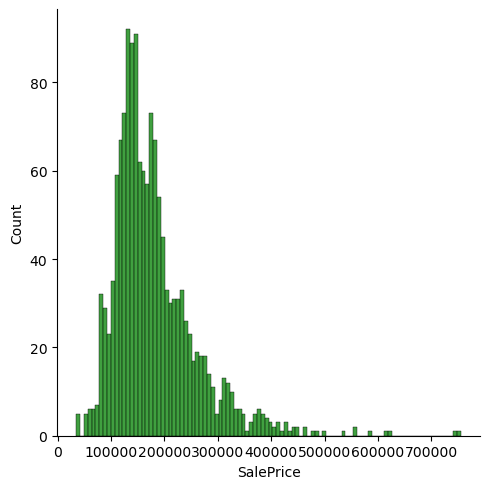

In [11]:
print(train_data['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.displot(train_data['SalePrice'], color='g', bins=100);

In [12]:
#Apply log transformation to target variable (exponential distribution)
train_data['Log_SalePrice'] = np.log(train_data['SalePrice'])
train_data = train_data.drop(columns=['SalePrice'])
print("Transformation successful. Here's a preview of the updated DataFrame:")
print(train_data.head())

Transformation successful. Here's a preview of the updated DataFrame:
    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        

In [13]:
# Display the first few rows of each to verify the changes
print(train_data.head())
print(test_data.head())

    MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ... 

In [14]:
# Remove rows with missing target
X = train_data.dropna(axis=0, subset=['Log_SalePrice'])

In [15]:
X.shape

(1460, 80)

In [16]:
# separate target from predictors
y = X.Log_SalePrice              
X.drop(['Log_SalePrice'], axis=1, inplace=True)

In [17]:
y

Id
1       12.247694
2       12.109011
3       12.317167
4       11.849398
5       12.429216
          ...    
1456    12.072541
1457    12.254863
1458    12.493130
1459    11.864462
1460    11.901583
Name: Log_SalePrice, Length: 1460, dtype: float64

In [18]:
#Function for unique values
def unique_values_count(df):
    unique_values = {col: df[col].nunique() for col in df.columns}
    return unique_values

unique_values_X = unique_values_count(X)

print("Number of unique values in each column of xtrain:\n", unique_values_X)

Number of unique values in each column of xtrain:
 {'MSSubClass': 15, 'MSZoning': 5, 'LotFrontage': 110, 'LotArea': 1073, 'Street': 2, 'Alley': 2, 'LotShape': 4, 'LandContour': 4, 'Utilities': 2, 'LotConfig': 5, 'LandSlope': 3, 'Neighborhood': 25, 'Condition1': 9, 'Condition2': 8, 'BldgType': 5, 'HouseStyle': 8, 'OverallQual': 10, 'OverallCond': 9, 'YearBuilt': 112, 'YearRemodAdd': 61, 'RoofStyle': 6, 'RoofMatl': 8, 'Exterior1st': 15, 'Exterior2nd': 16, 'MasVnrType': 3, 'MasVnrArea': 327, 'ExterQual': 4, 'ExterCond': 5, 'Foundation': 6, 'BsmtQual': 4, 'BsmtCond': 4, 'BsmtExposure': 4, 'BsmtFinType1': 6, 'BsmtFinSF1': 637, 'BsmtFinType2': 6, 'BsmtFinSF2': 144, 'BsmtUnfSF': 780, 'TotalBsmtSF': 721, 'Heating': 6, 'HeatingQC': 5, 'CentralAir': 2, 'Electrical': 5, '1stFlrSF': 753, '2ndFlrSF': 417, 'LowQualFinSF': 24, 'GrLivArea': 861, 'BsmtFullBath': 4, 'BsmtHalfBath': 3, 'FullBath': 4, 'HalfBath': 3, 'BedroomAbvGr': 8, 'KitchenAbvGr': 4, 'KitchenQual': 4, 'TotRmsAbvGrd': 12, 'Functional': 

In [19]:
# Define a threshold for low cardinality
low_cardinality_threshold = 15

In [20]:
# Identify columns with low cardinality regardless of their type
low_cardinality_cols = [col for col in X.columns if X[col].nunique() < low_cardinality_threshold]

# Identify object type columns
object_type_cols = [col for col in X.columns if X[col].dtype == 'object']

In [21]:
# Combine both to identify all categorical columns
categorical_cols = list(set(low_cardinality_cols + object_type_cols))

print("Identified Categorical Columns:", categorical_cols)

Identified Categorical Columns: ['Fireplaces', 'Exterior1st', 'BsmtQual', 'KitchenAbvGr', 'BsmtCond', 'CentralAir', 'LandContour', 'Neighborhood', 'GarageCars', 'HeatingQC', 'HalfBath', 'GarageType', 'BedroomAbvGr', 'FireplaceQu', 'HouseStyle', 'KitchenQual', 'MiscFeature', 'SaleType', 'GarageQual', 'YrSold', 'LotConfig', 'OverallQual', 'Street', 'GarageCond', 'Foundation', 'BsmtFinType2', 'BsmtFinType1', 'BsmtFullBath', 'ExterQual', 'FullBath', 'Condition2', 'TotRmsAbvGrd', 'Utilities', 'Exterior2nd', 'ExterCond', 'Heating', 'GarageFinish', 'LotShape', 'Fence', 'MasVnrType', 'Condition1', 'BsmtHalfBath', 'PoolQC', 'BldgType', 'PoolArea', 'RoofMatl', 'Electrical', 'MoSold', 'OverallCond', 'Functional', 'LandSlope', 'Alley', 'MSZoning', 'PavedDrive', 'BsmtExposure', 'RoofStyle', 'SaleCondition']


In [22]:
# Select numeric columns that are not in categorical columns
numeric_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64'] and cname not in categorical_cols] 
print("Identified Numeric Columns:", numeric_cols)

Identified Numeric Columns: ['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


In [23]:
len(numeric_cols)

22

In [24]:
len(categorical_cols)

57

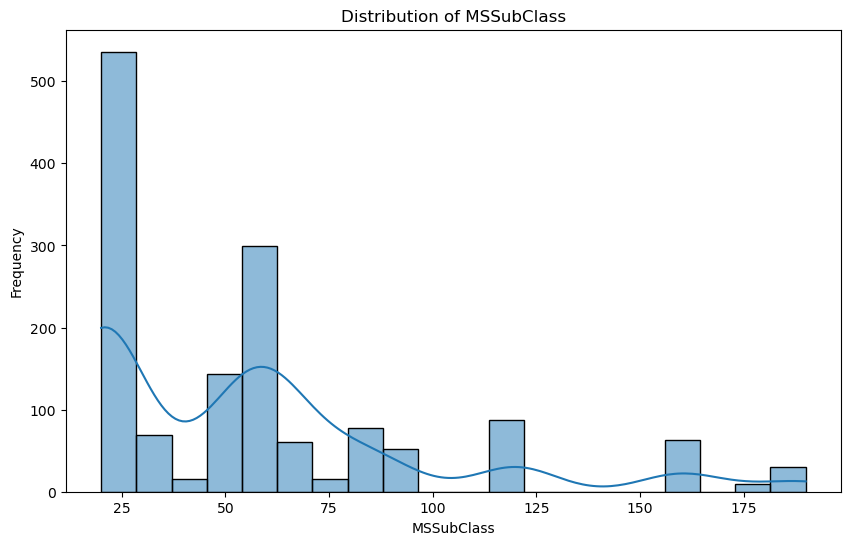

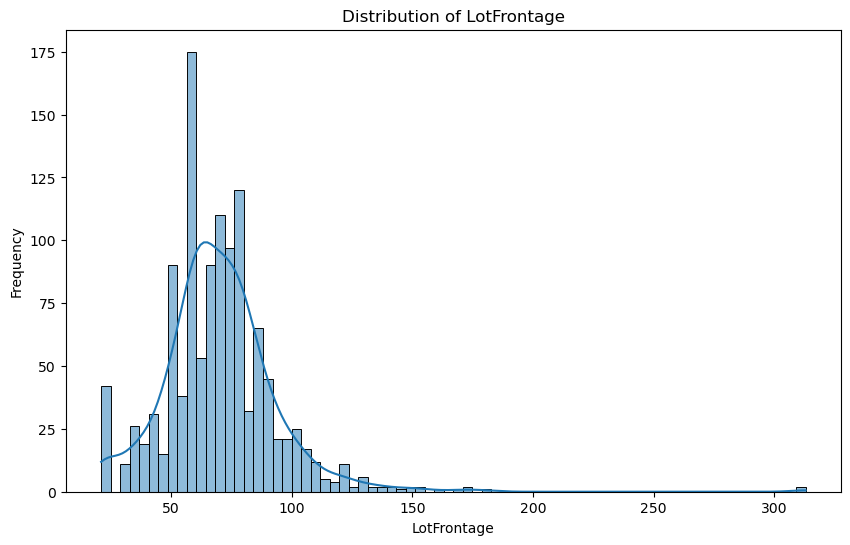

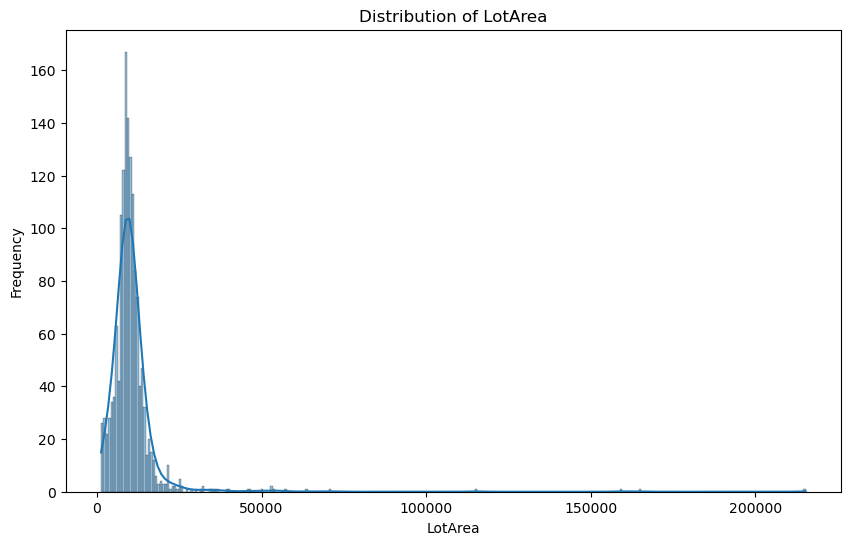

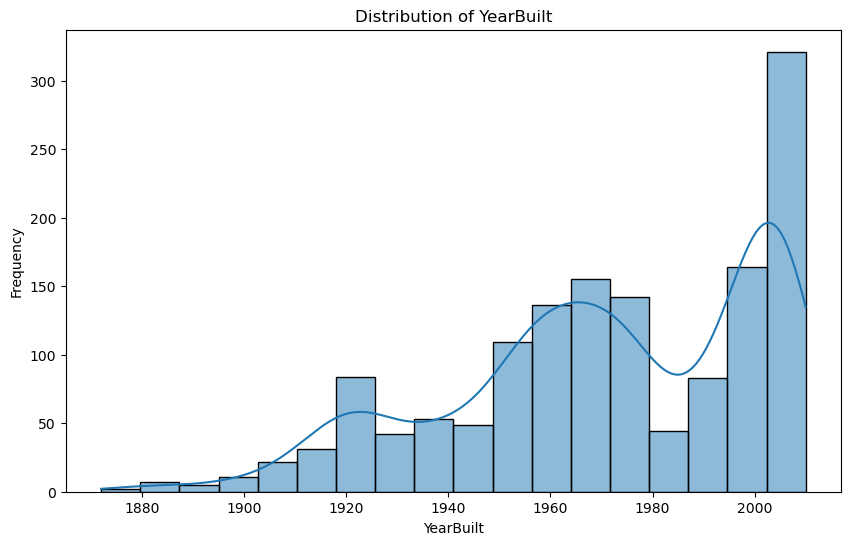

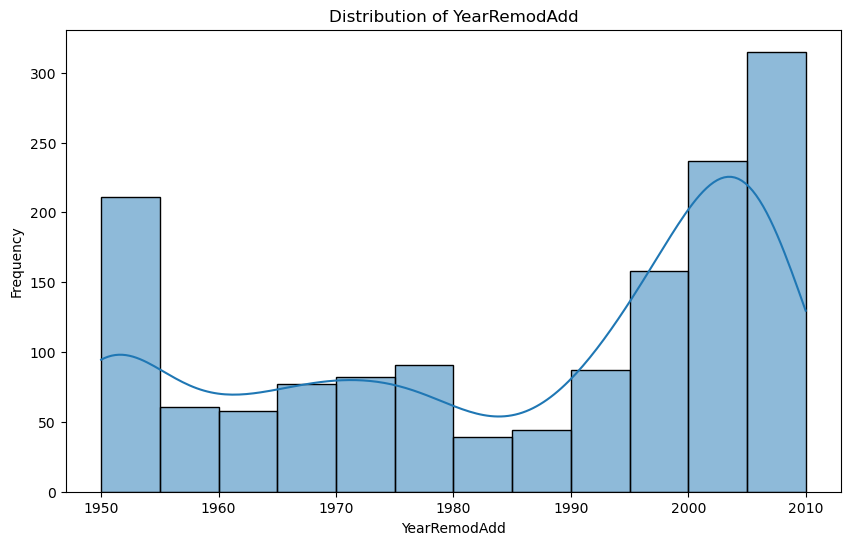

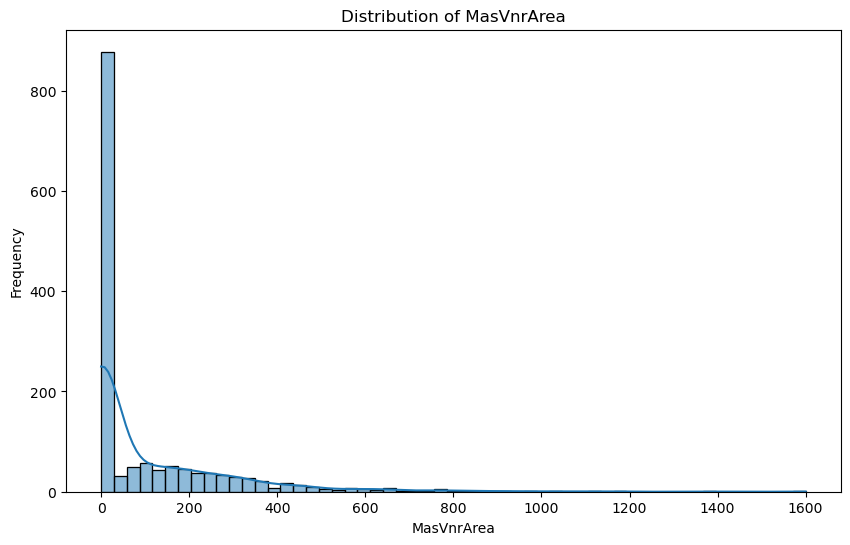

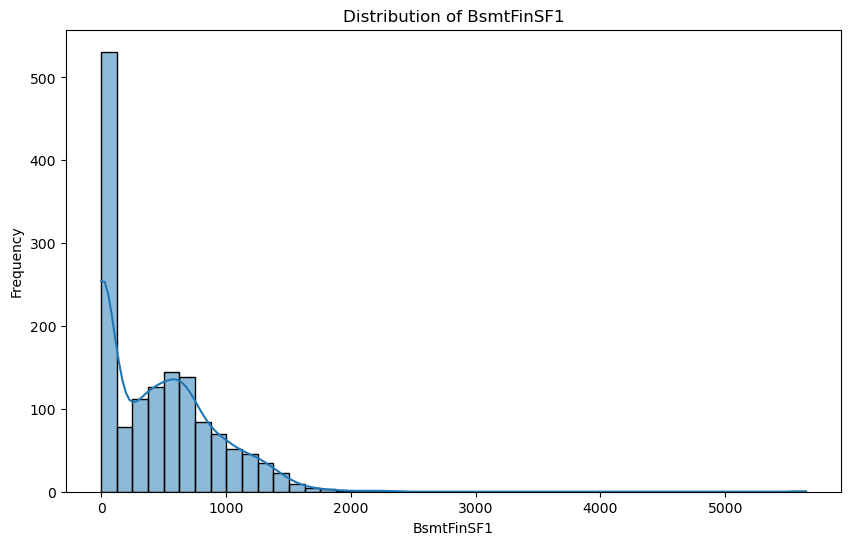

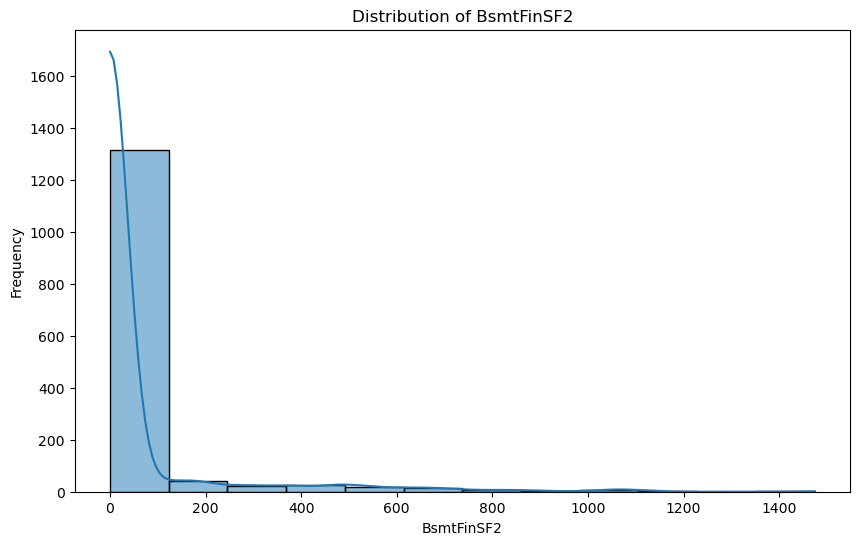

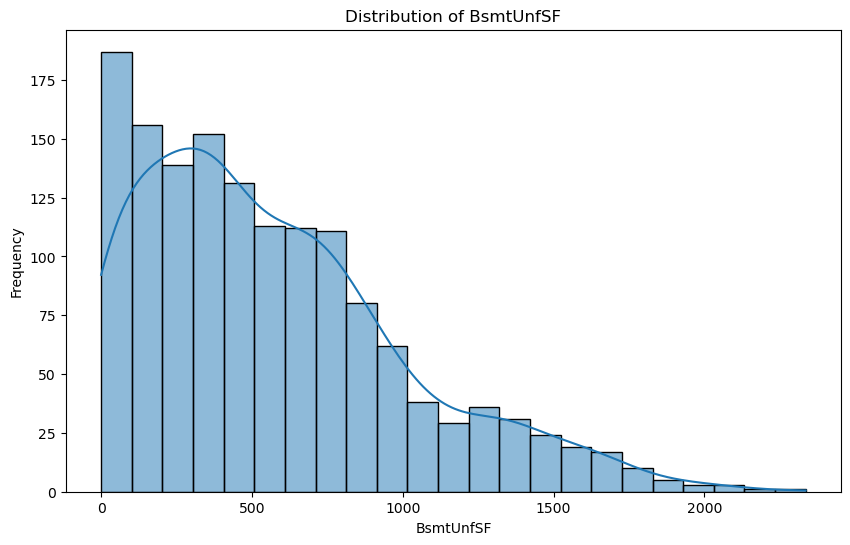

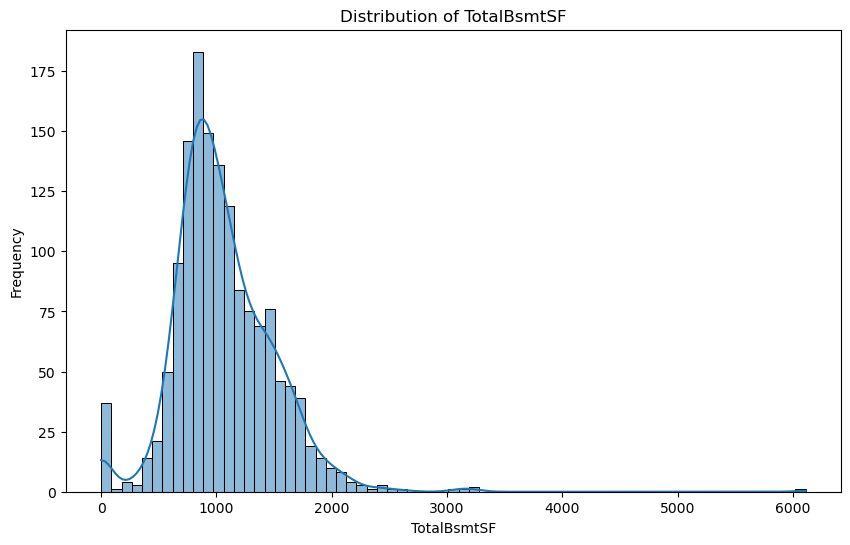

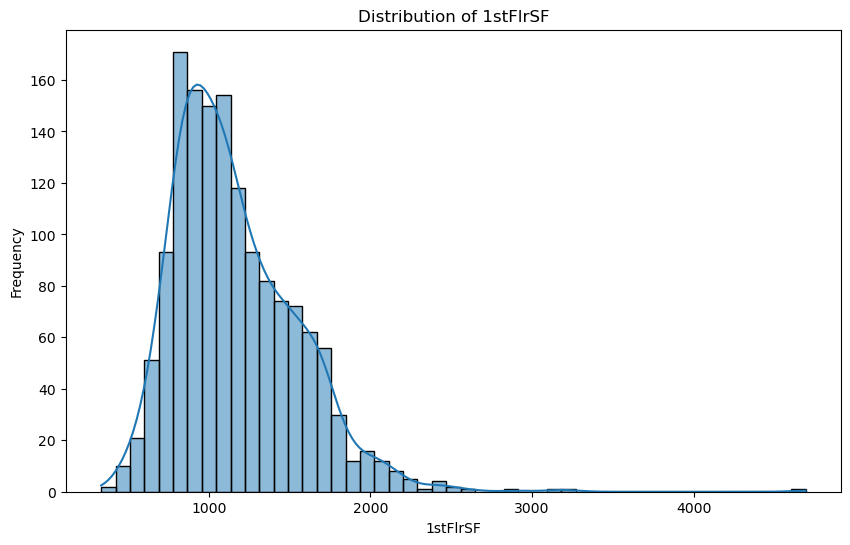

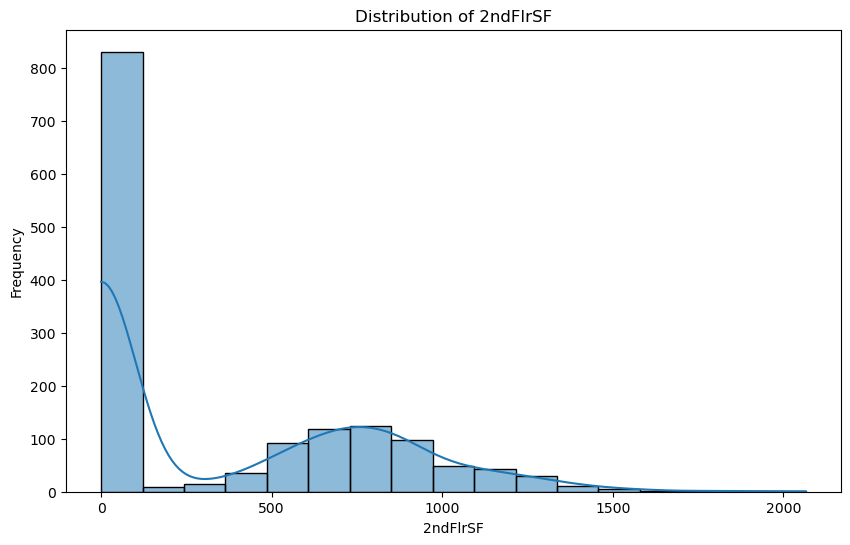

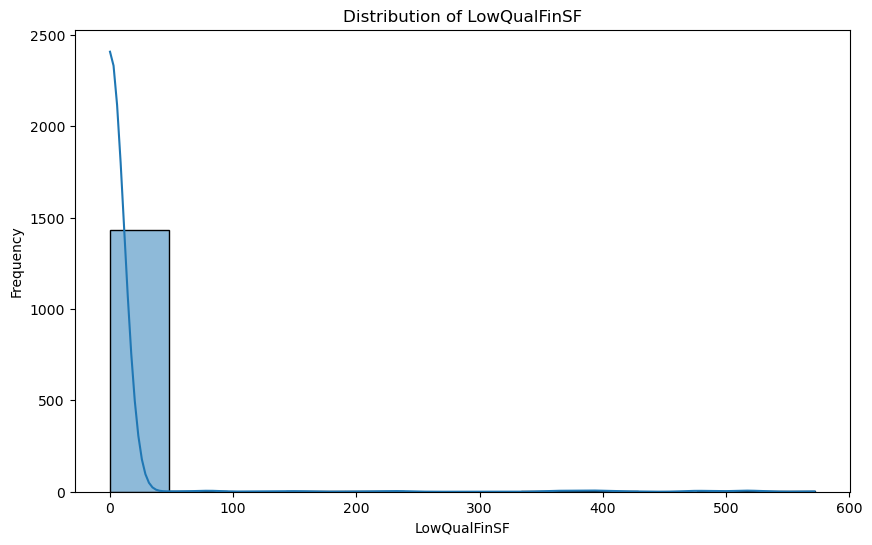

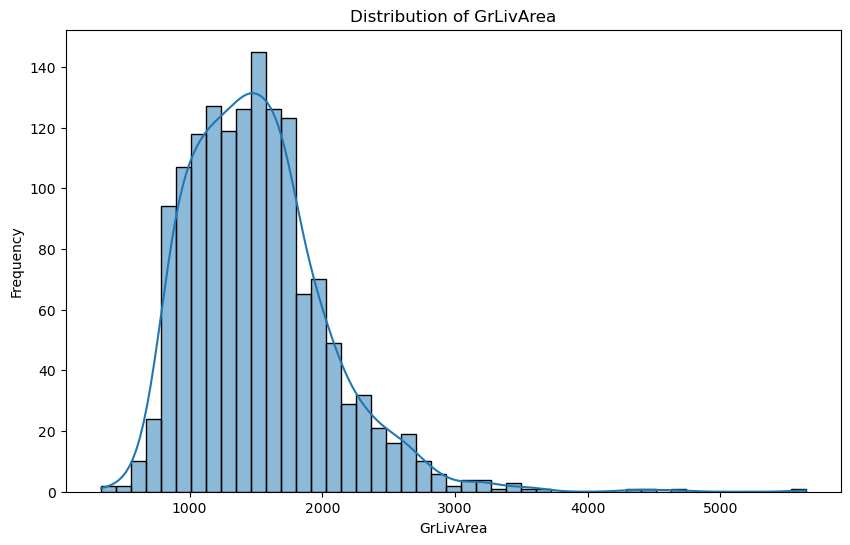

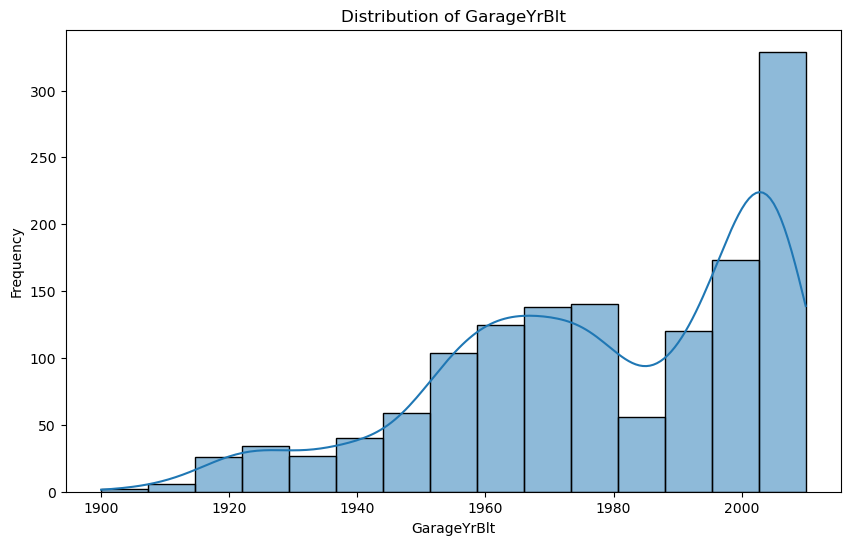

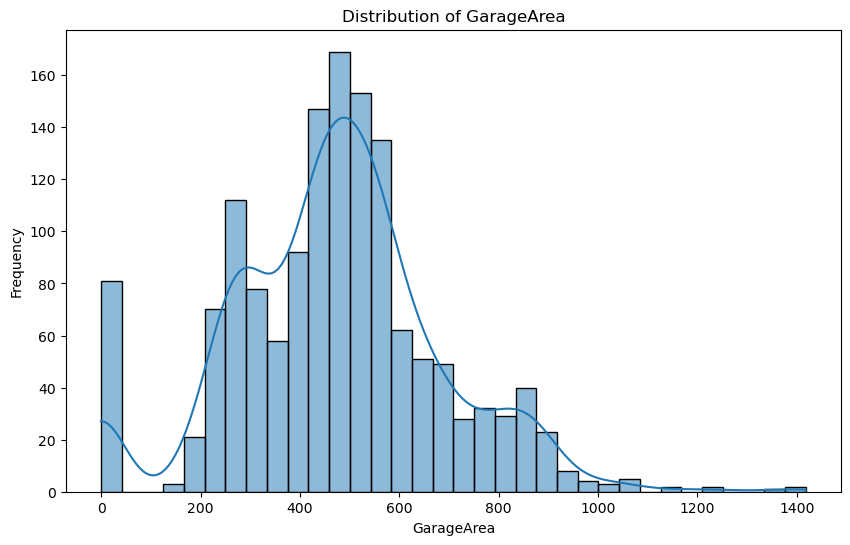

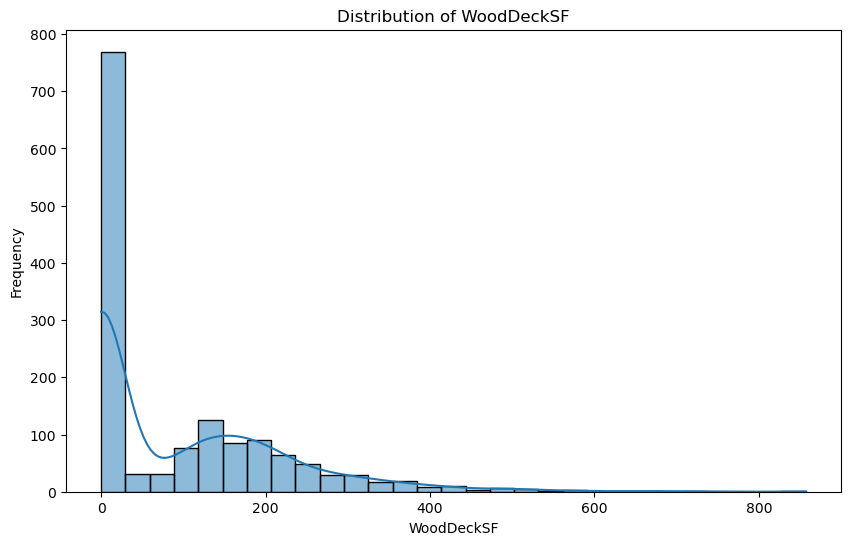

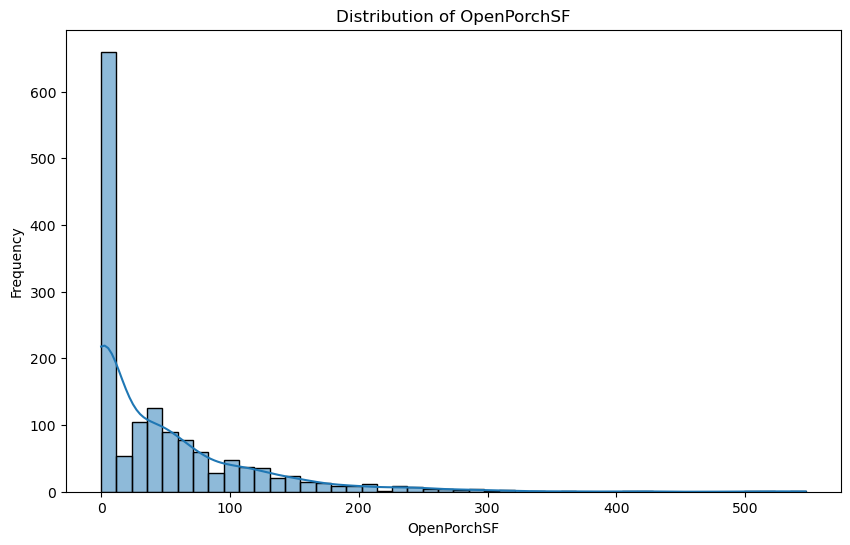

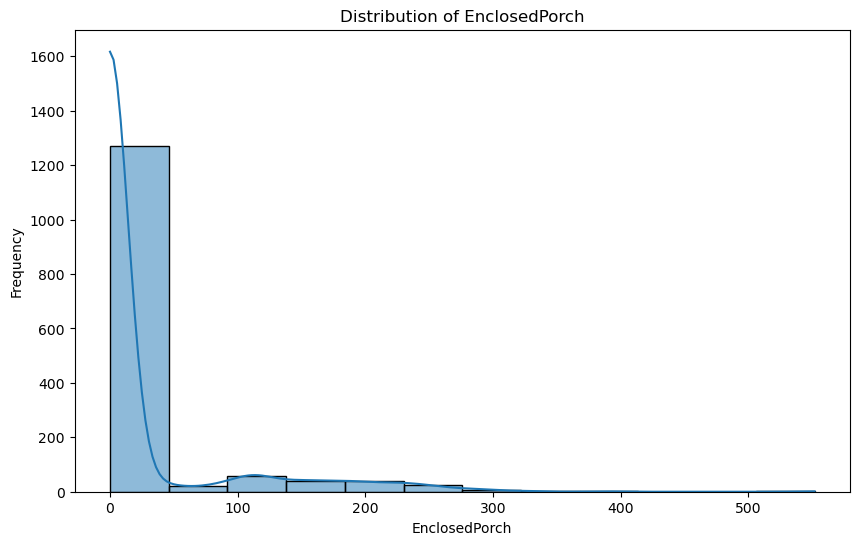

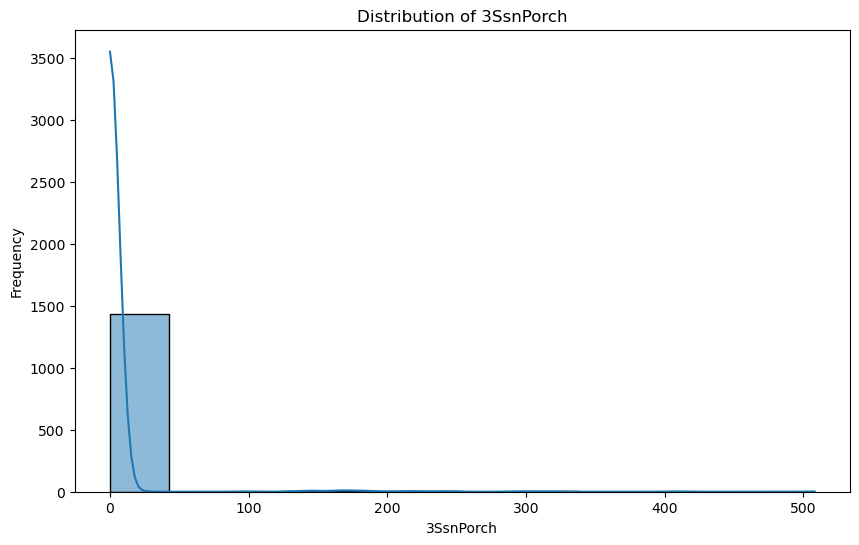

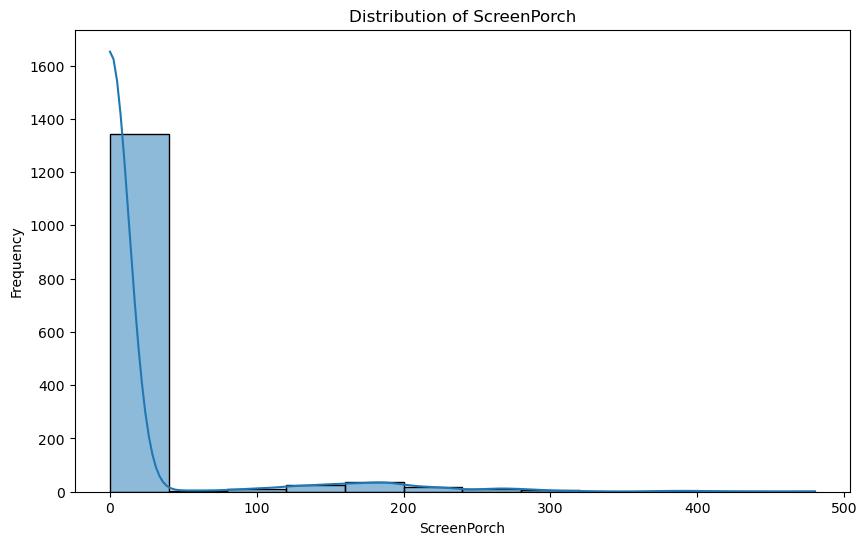

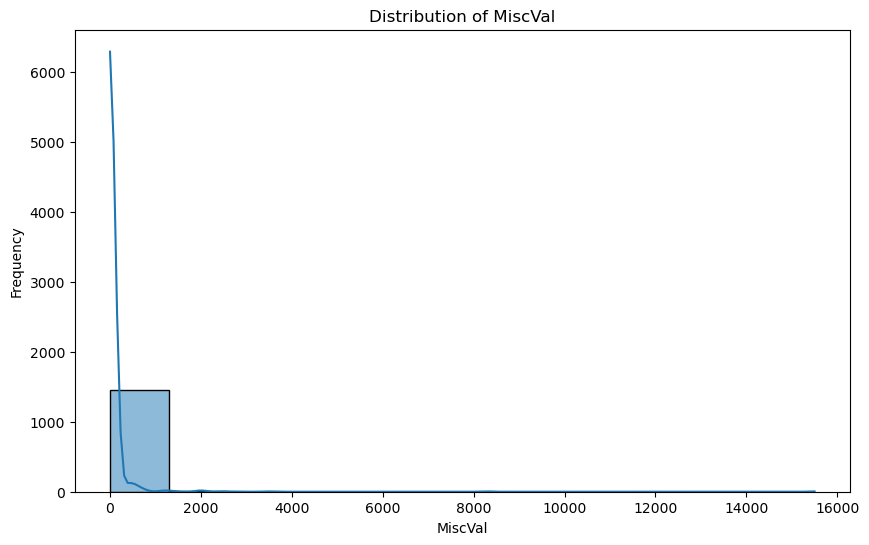

In [25]:
# Plot the distribution of each numerical column
for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


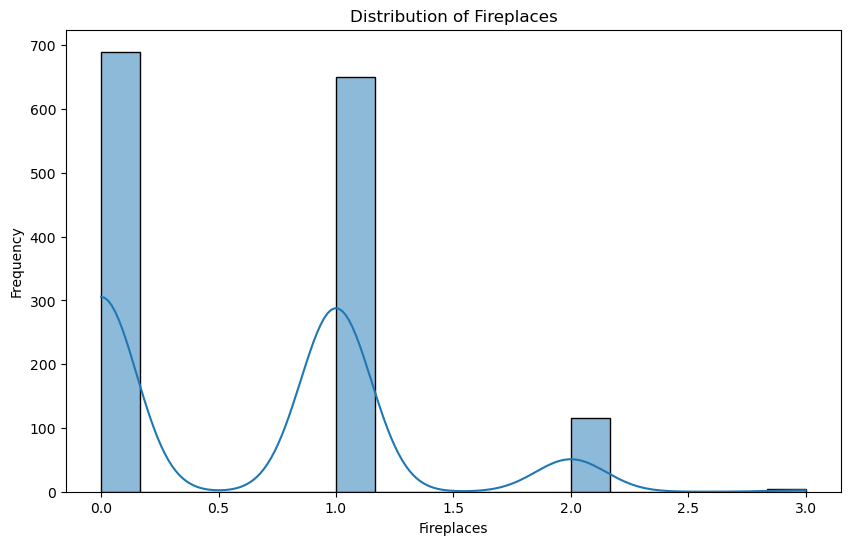

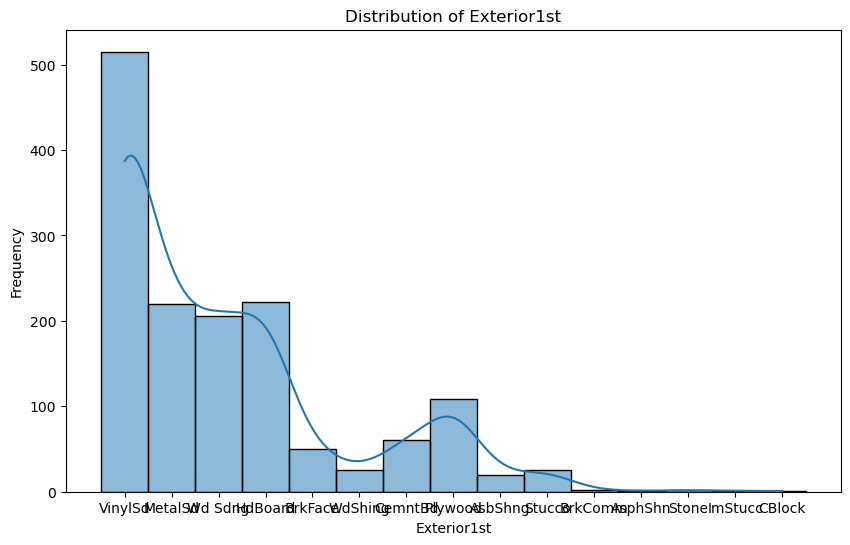

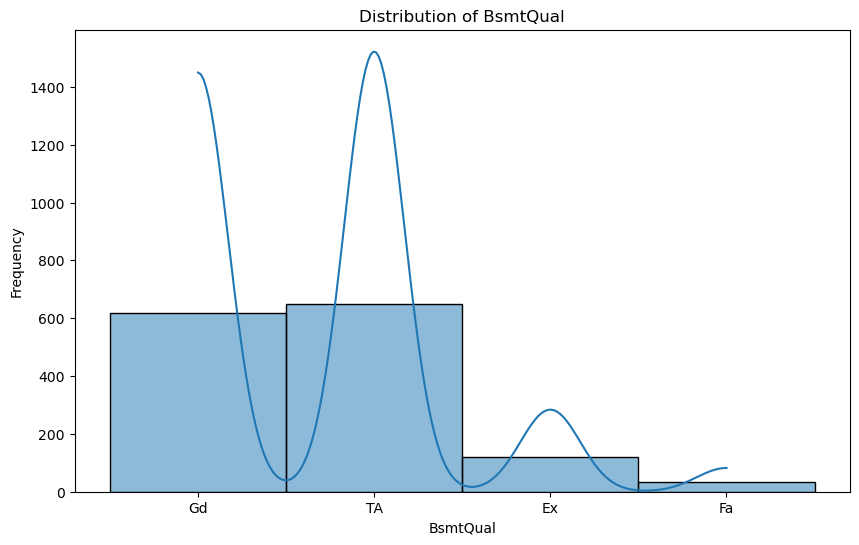

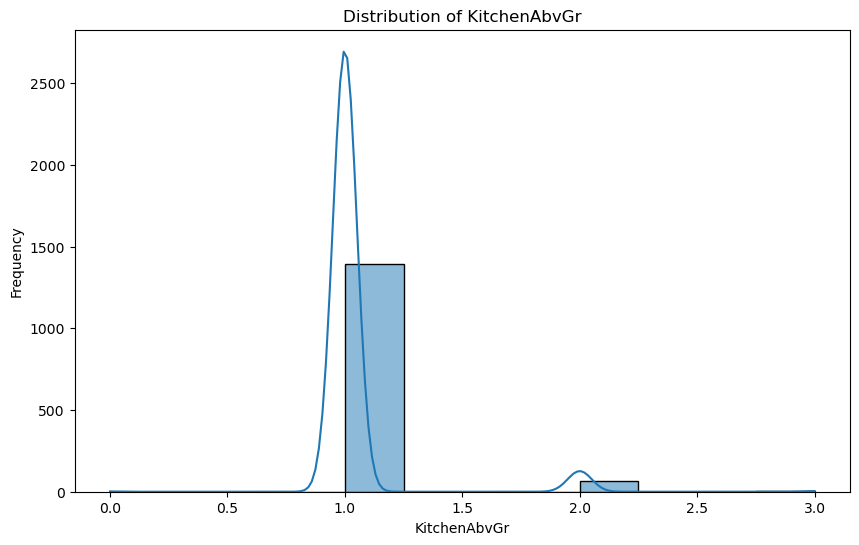

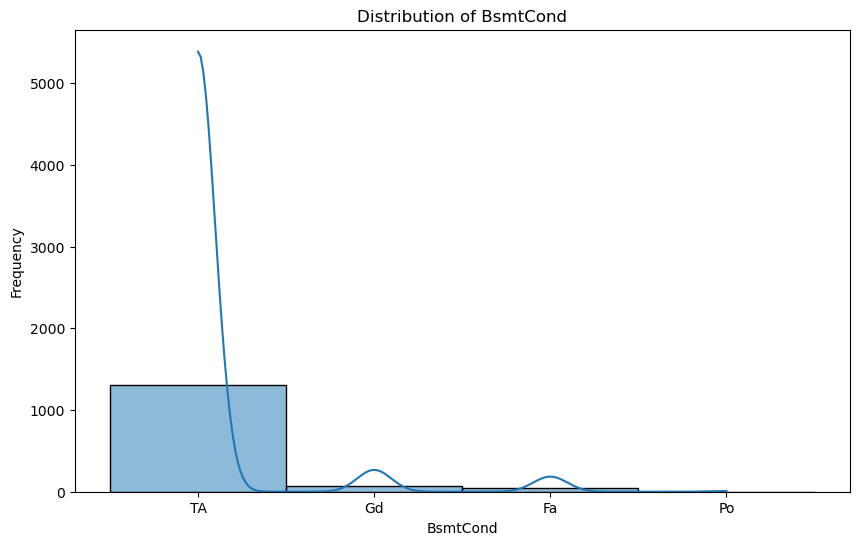

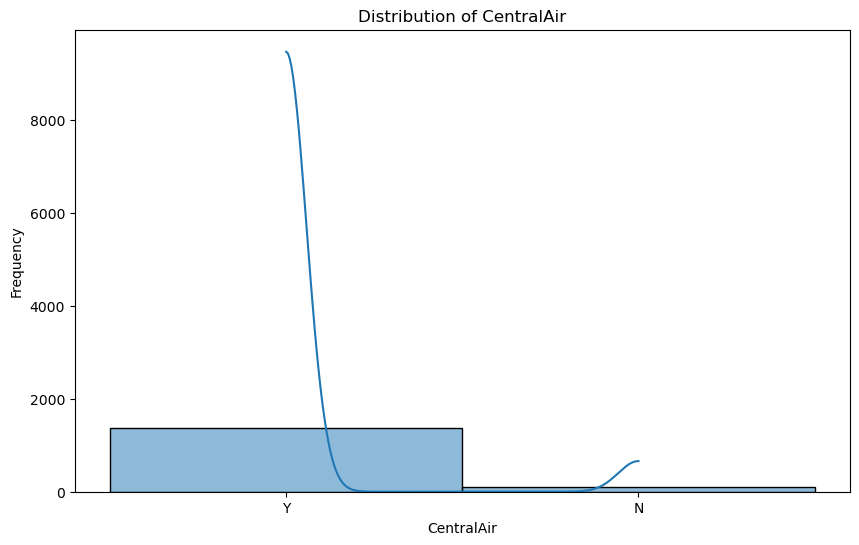

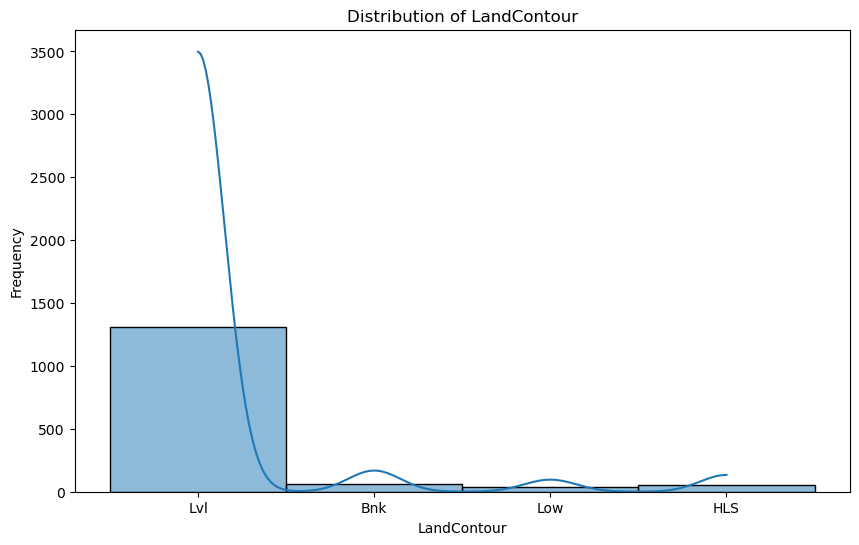

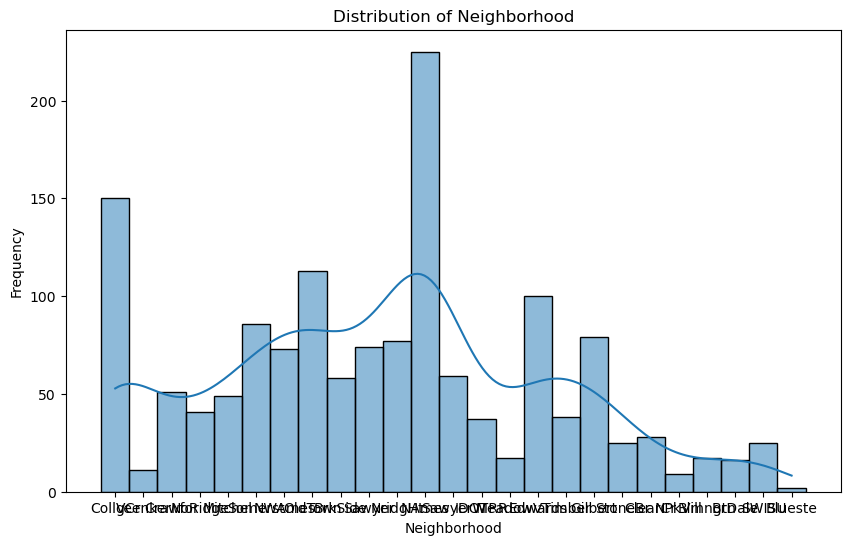

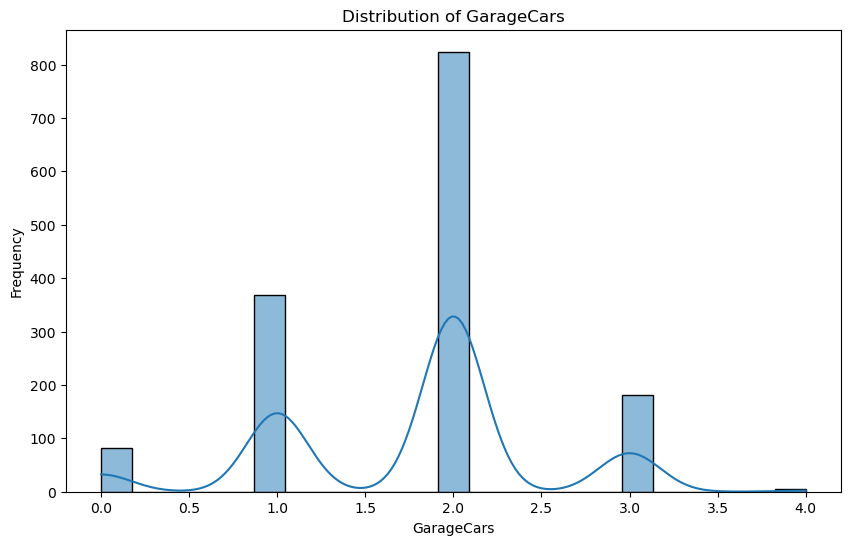

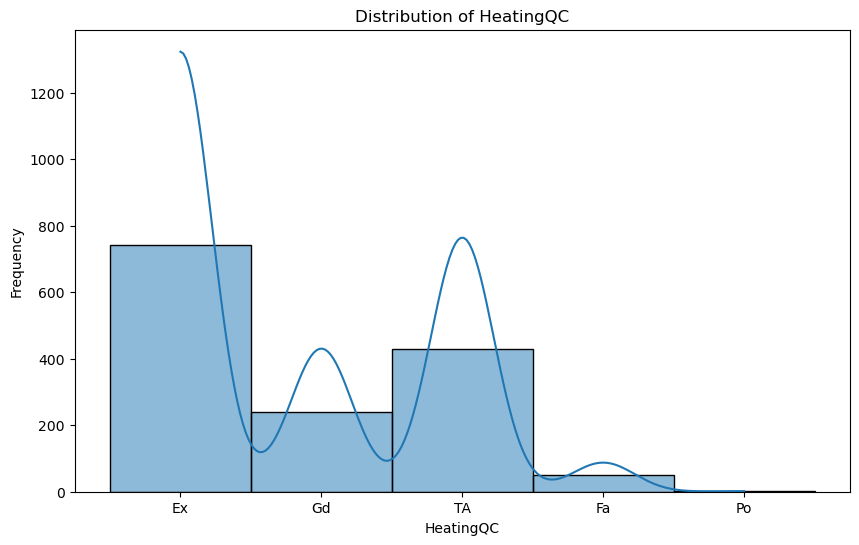

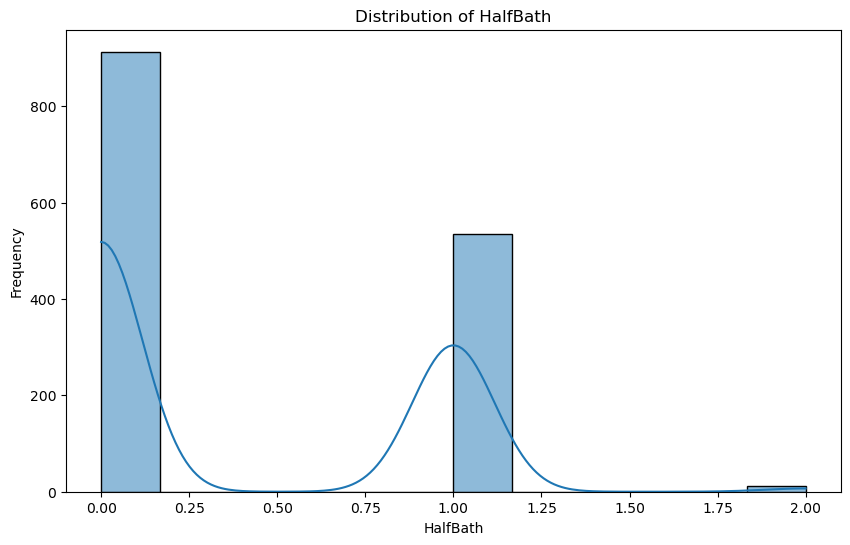

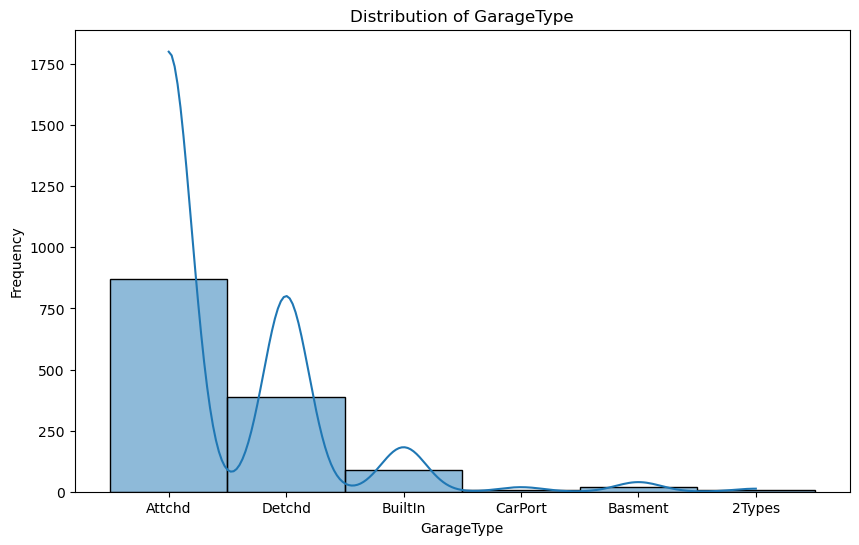

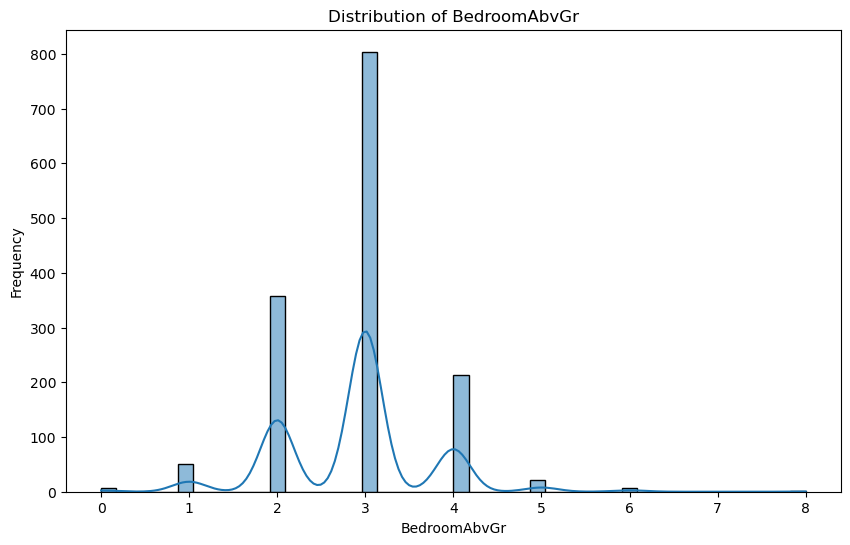

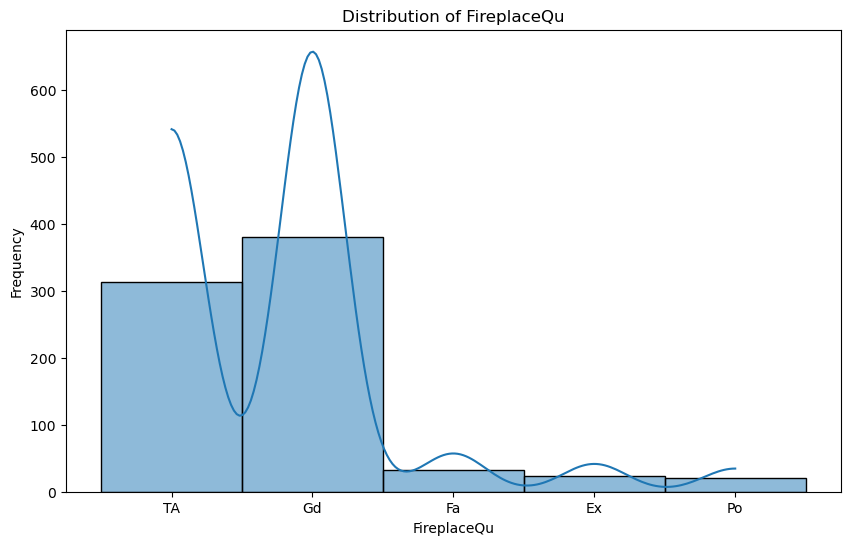

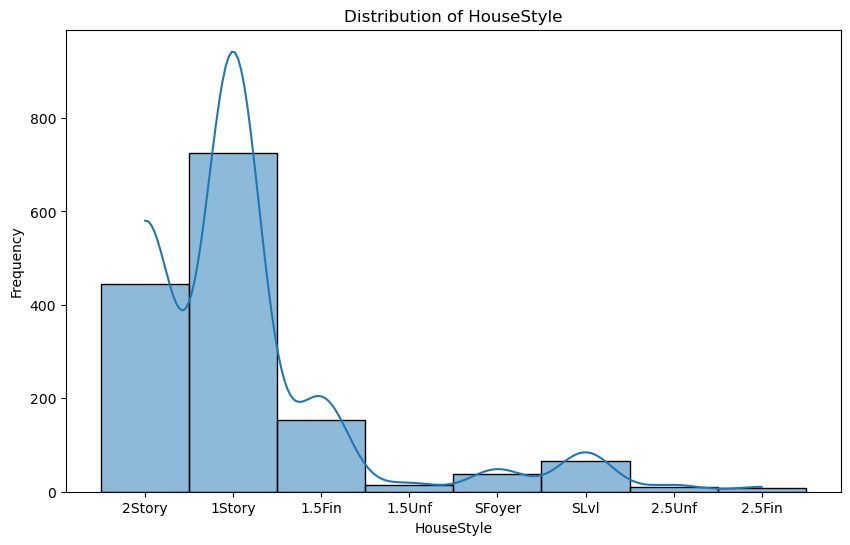

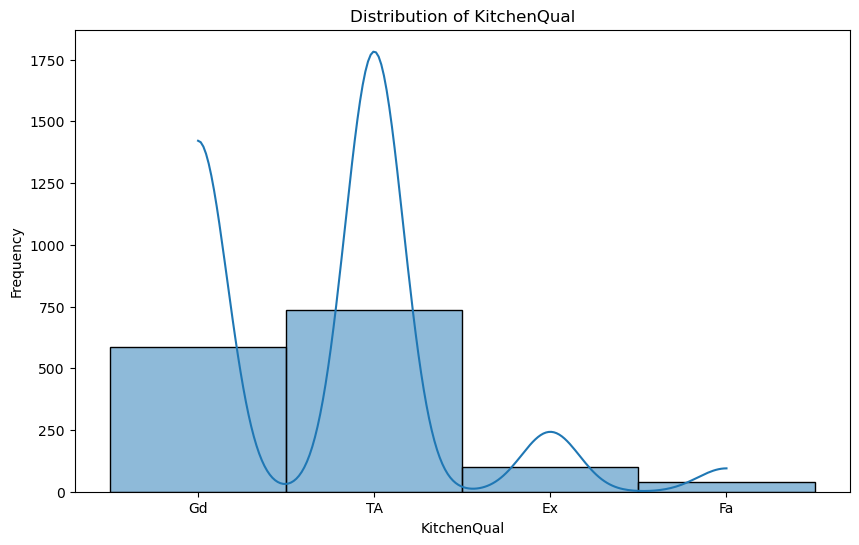

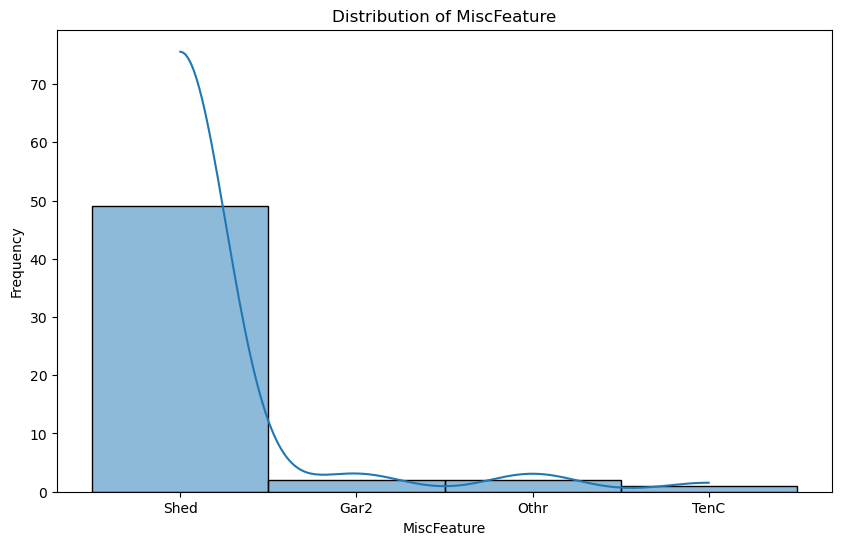

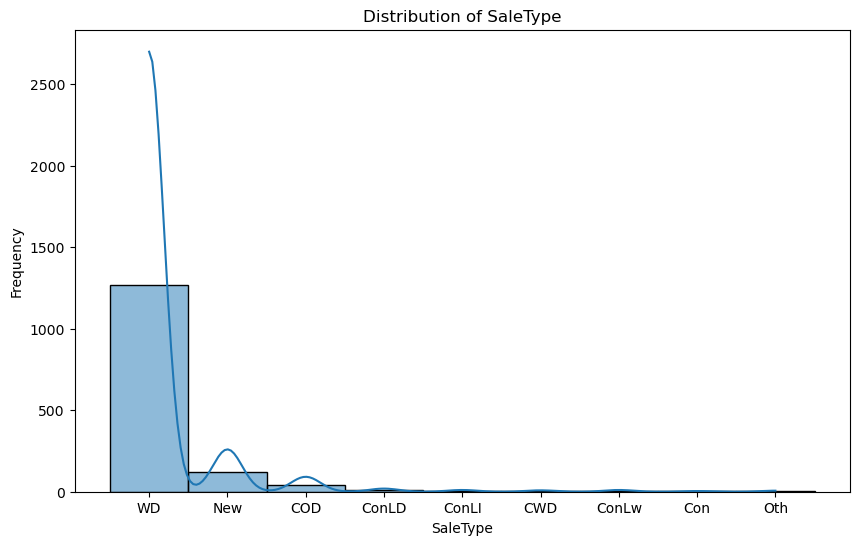

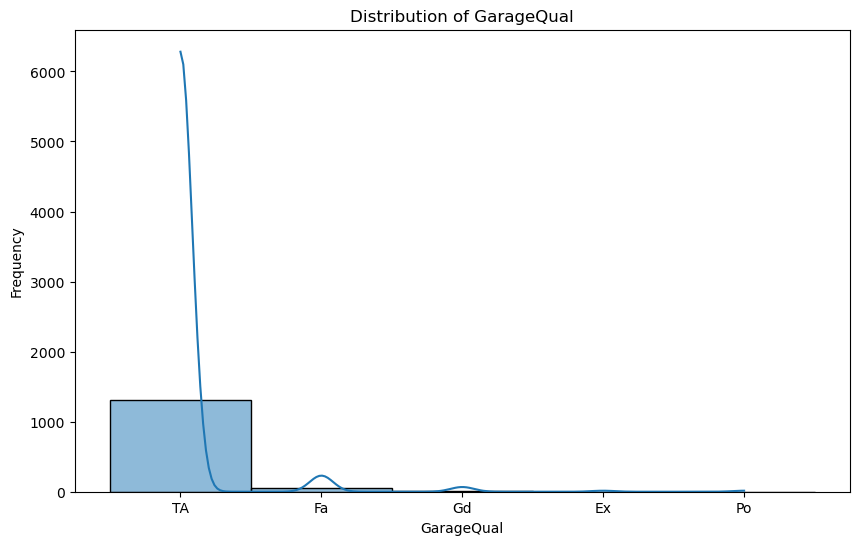

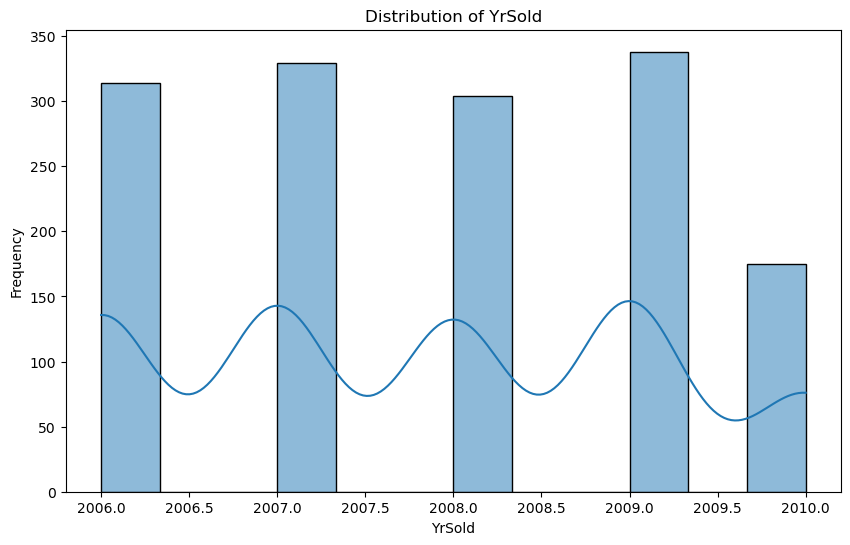

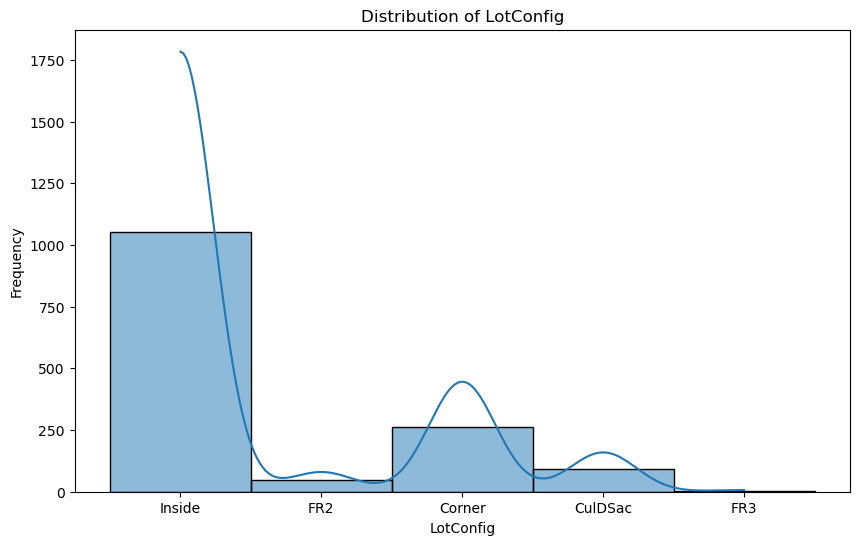

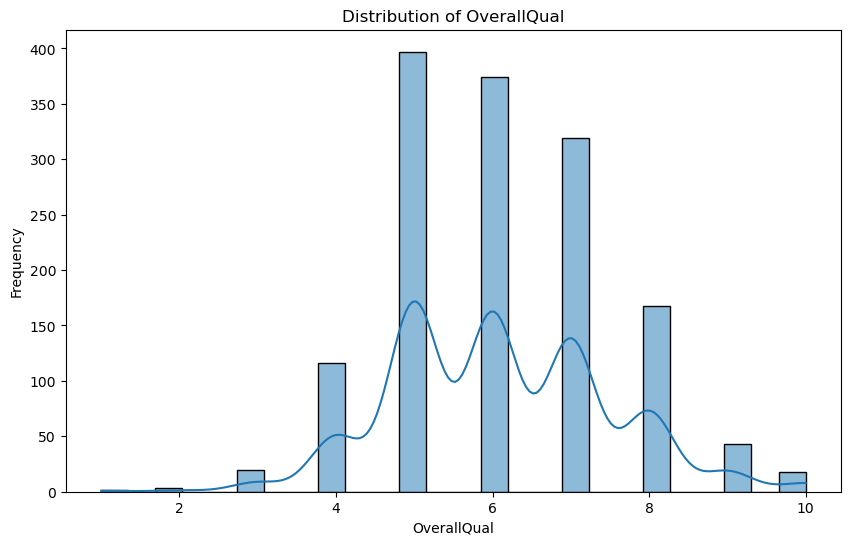

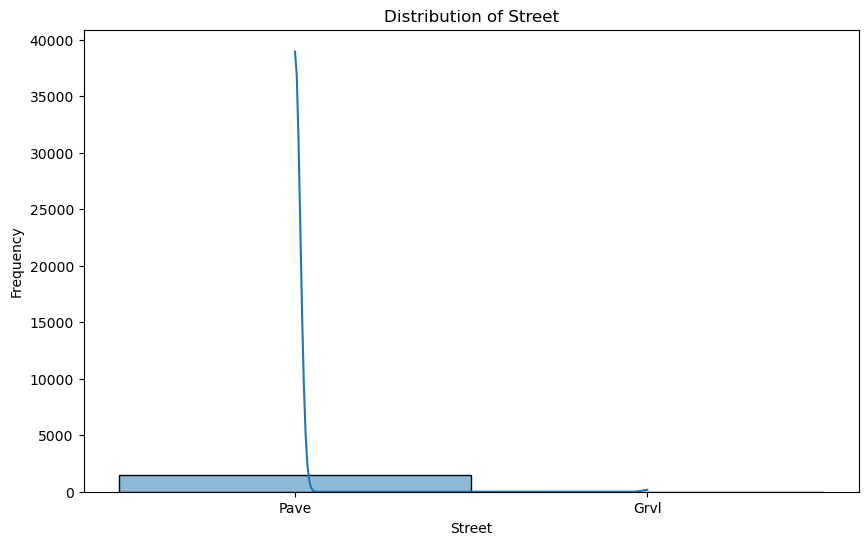

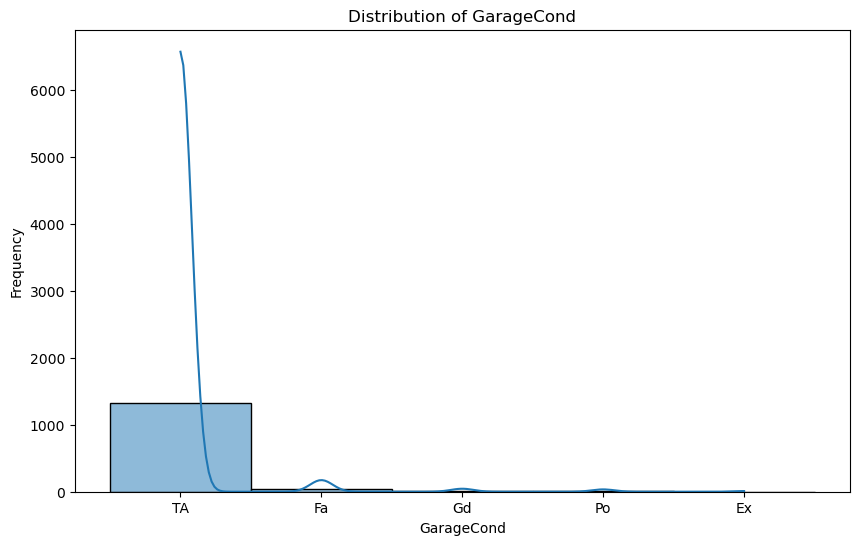

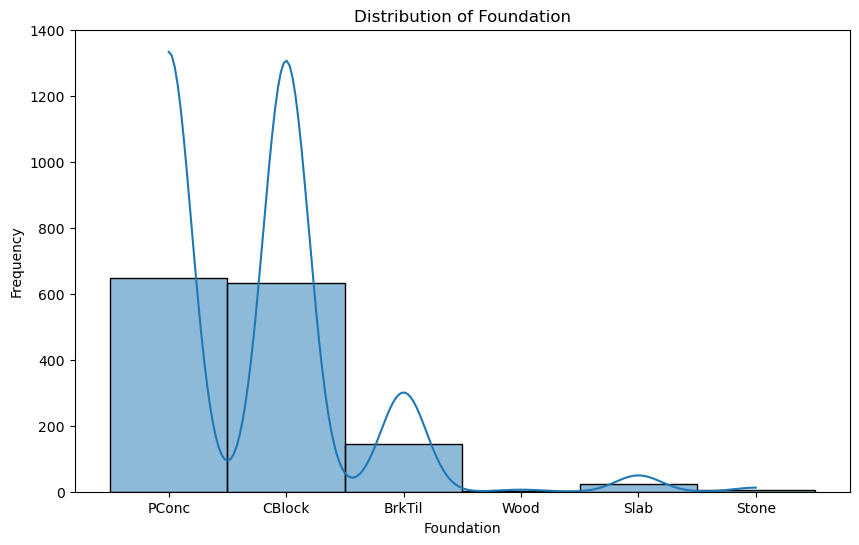

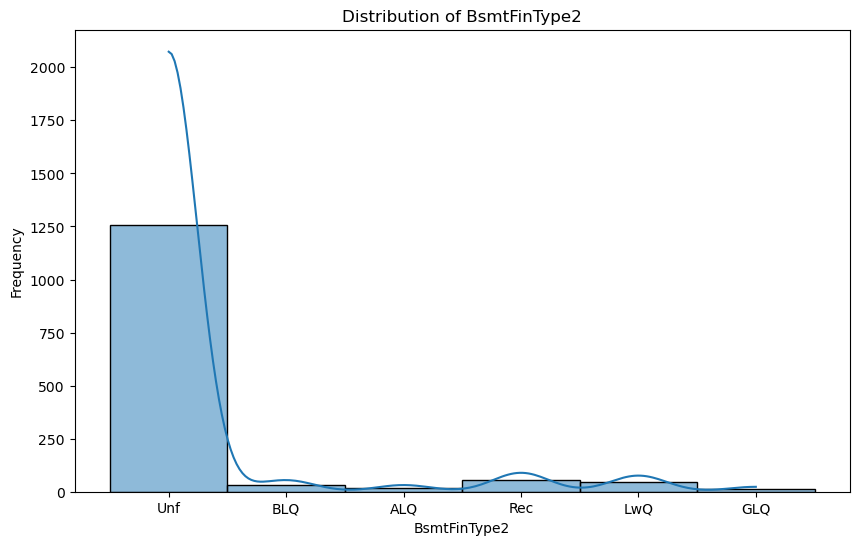

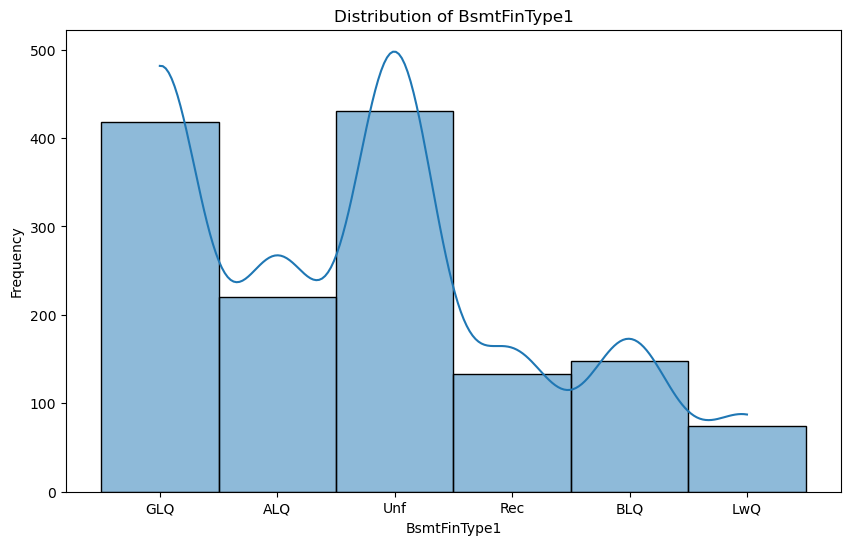

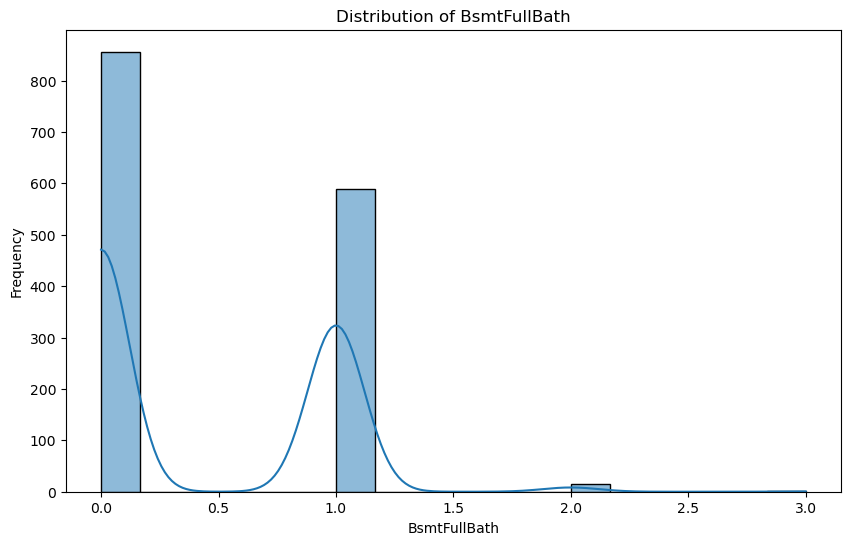

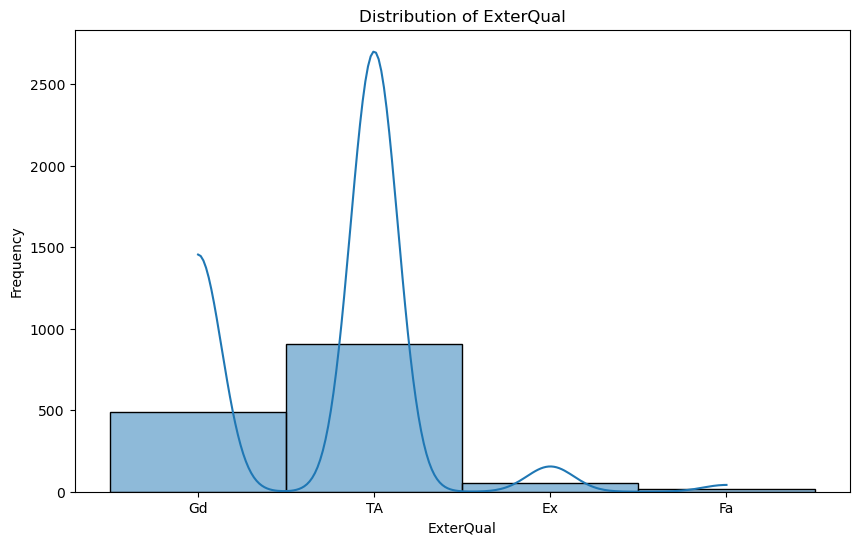

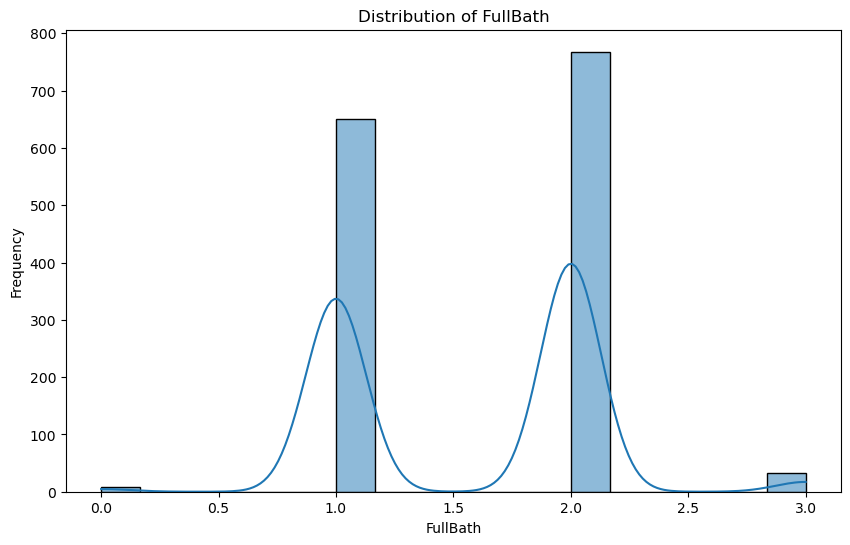

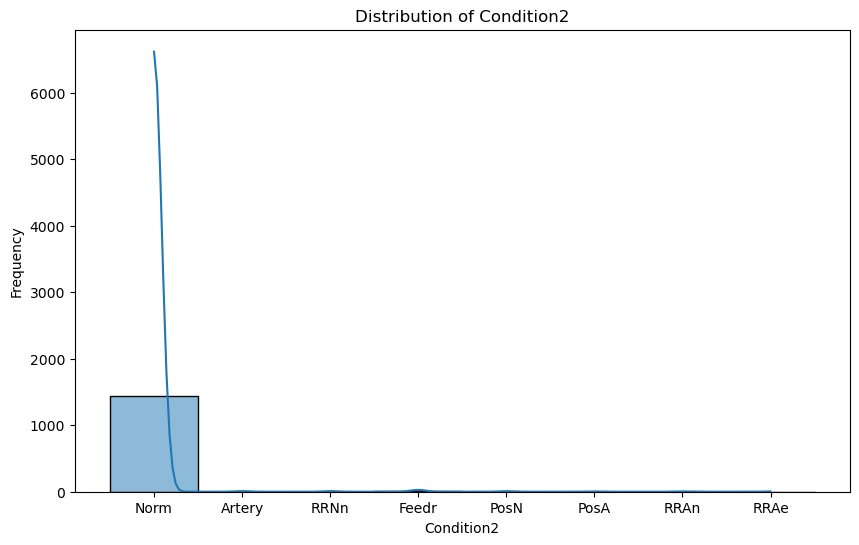

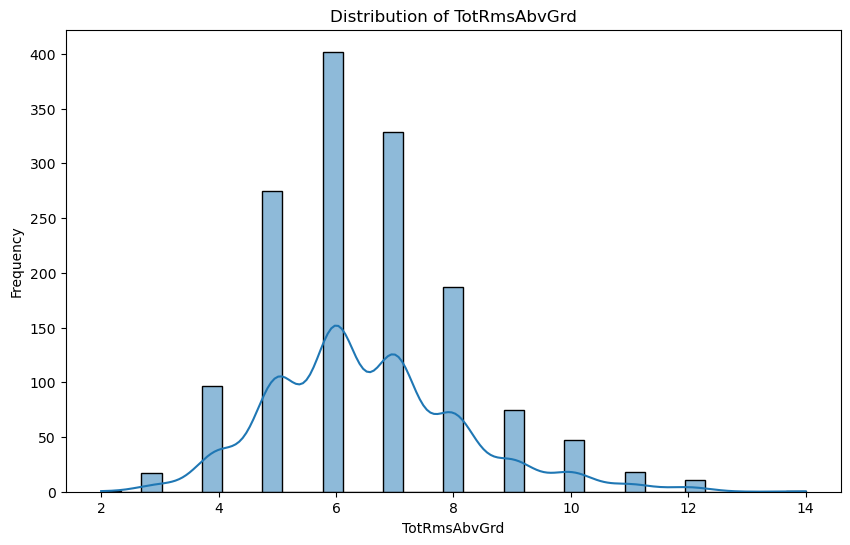

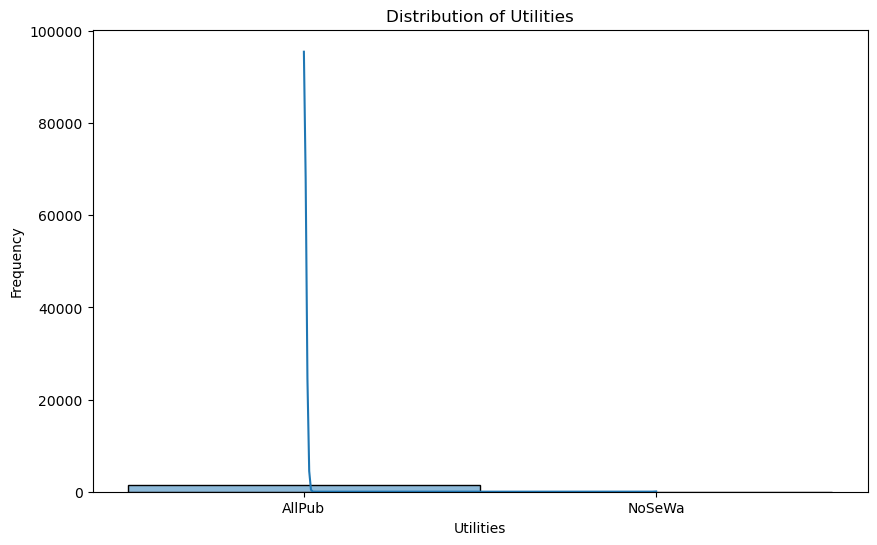

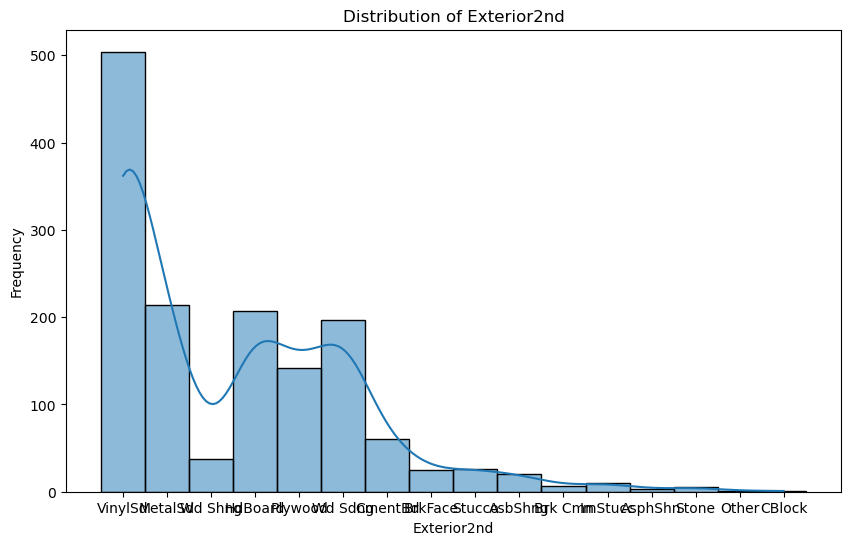

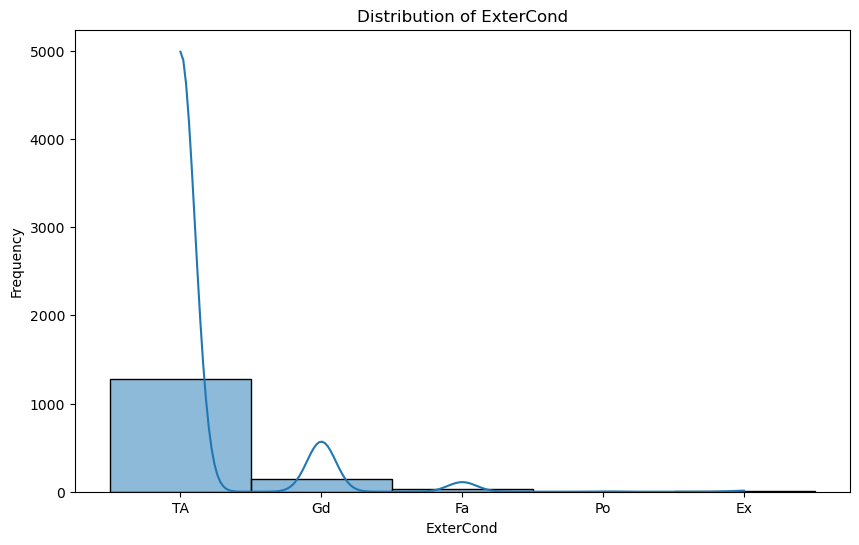

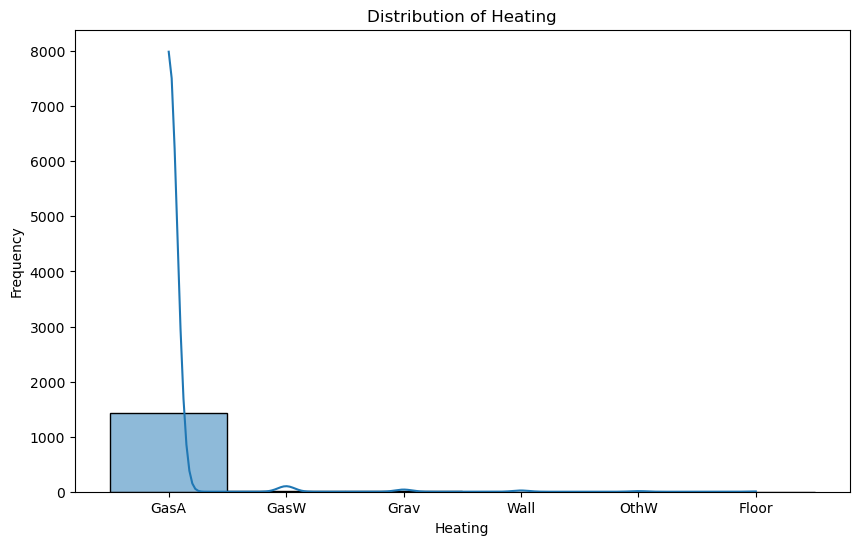

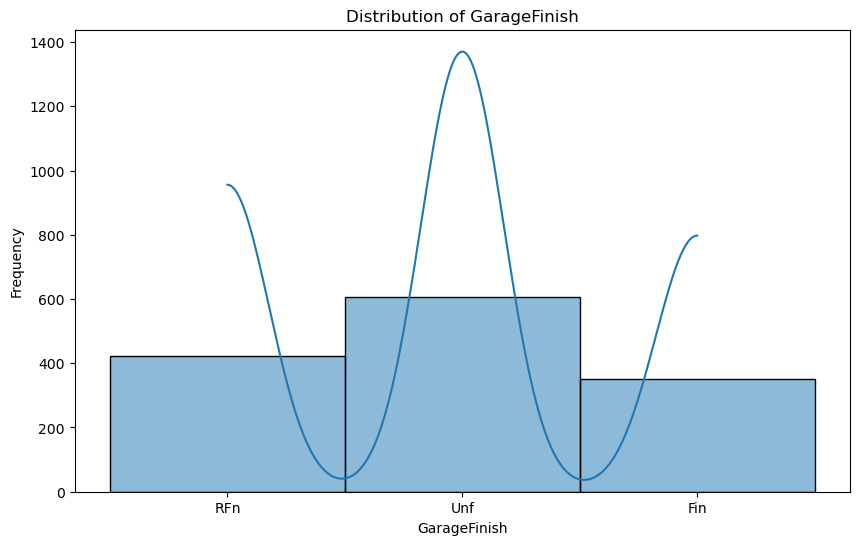

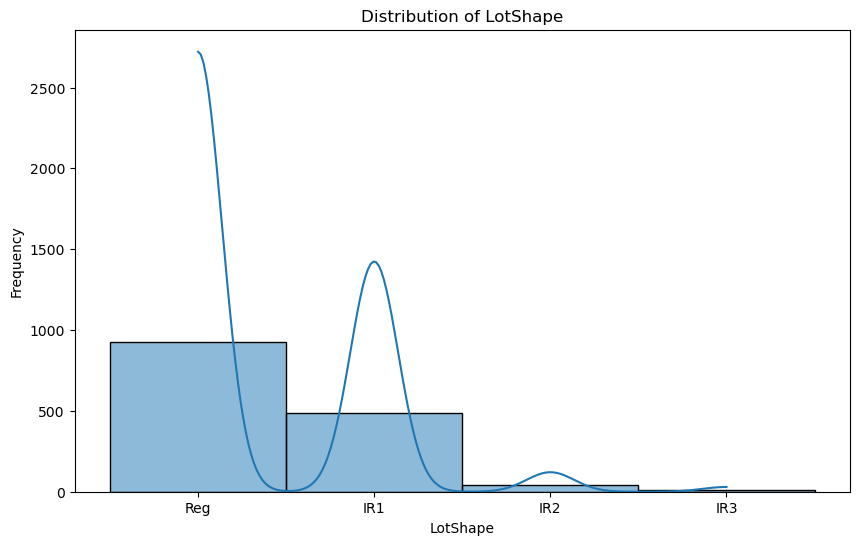

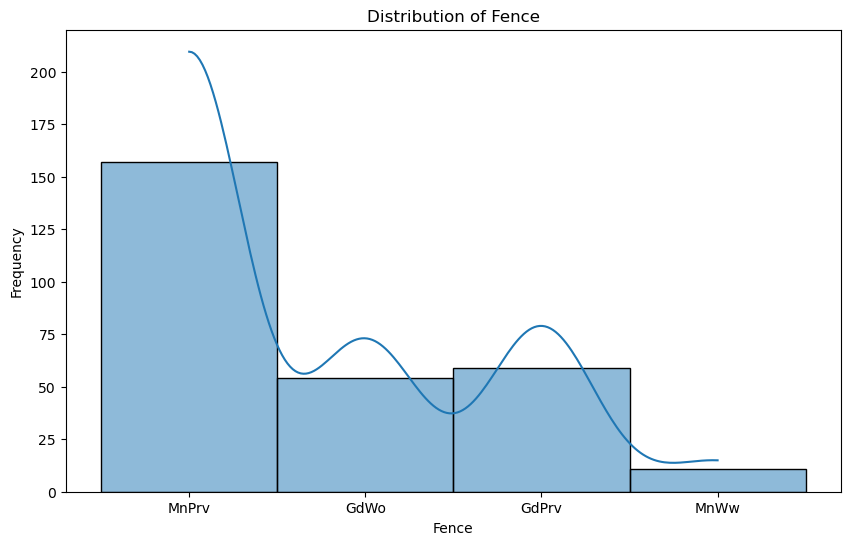

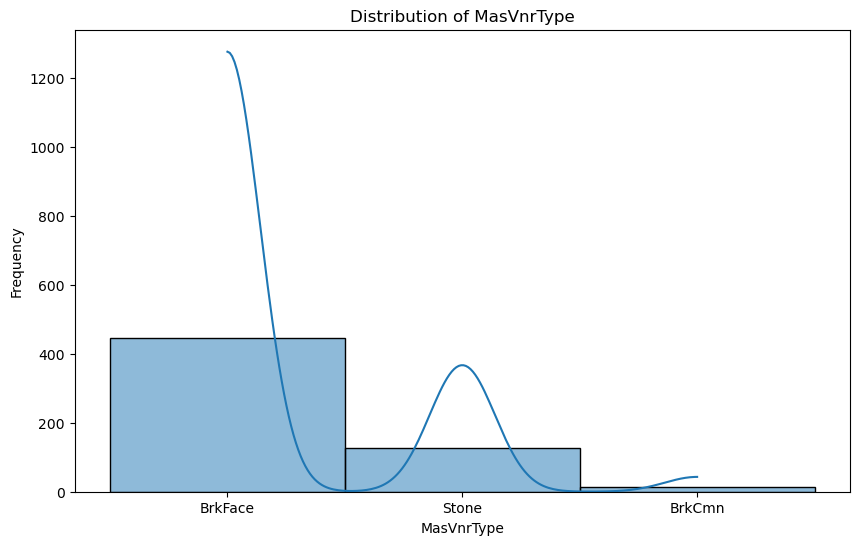

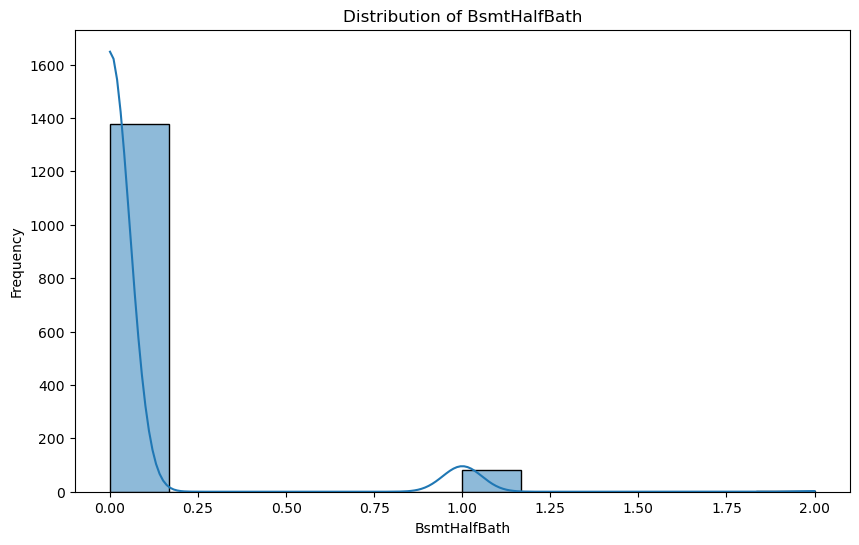

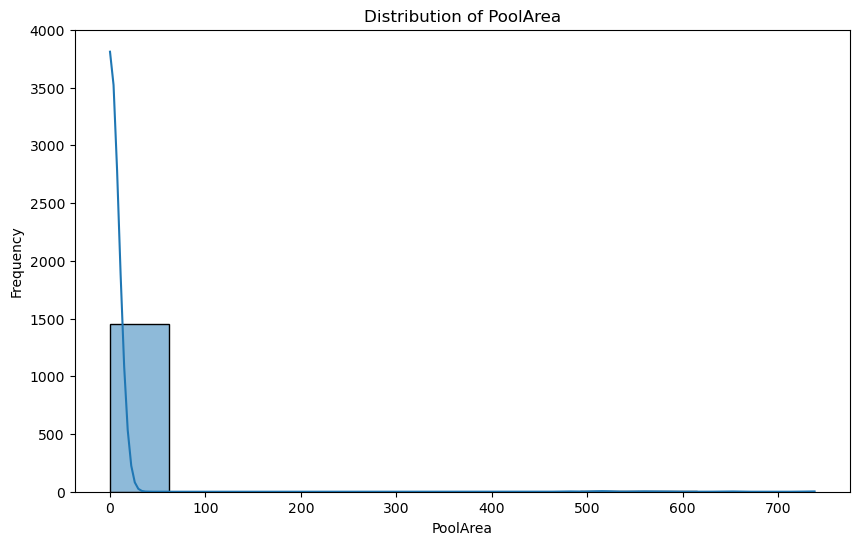

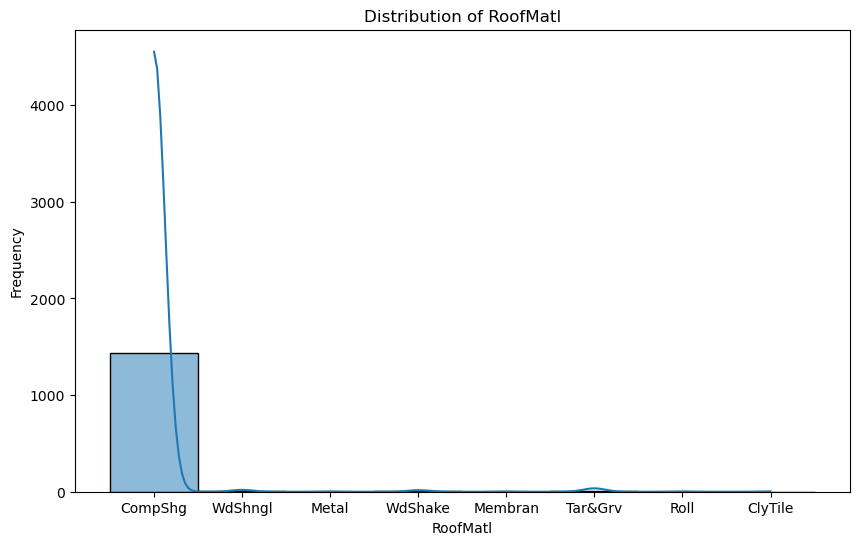

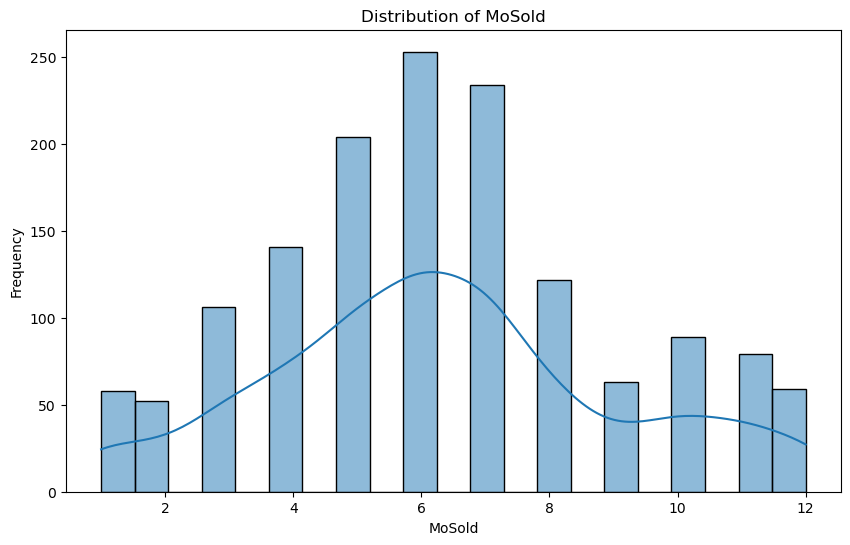

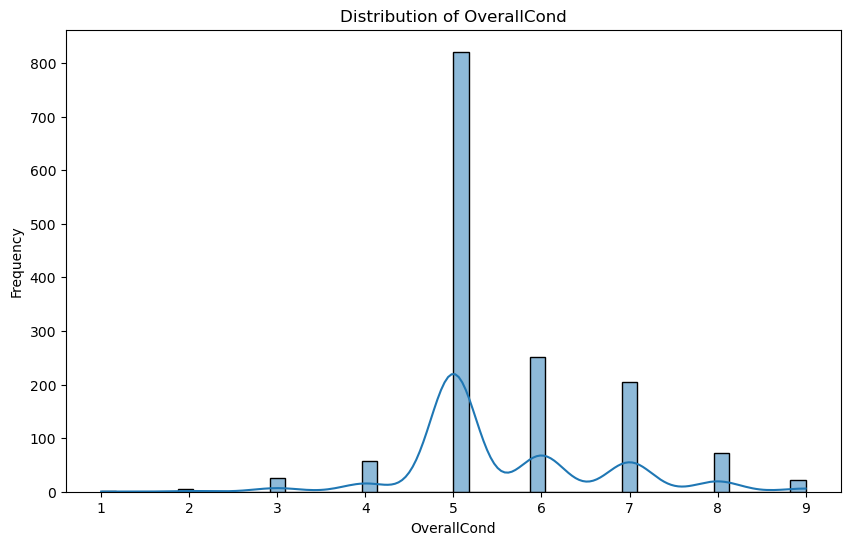

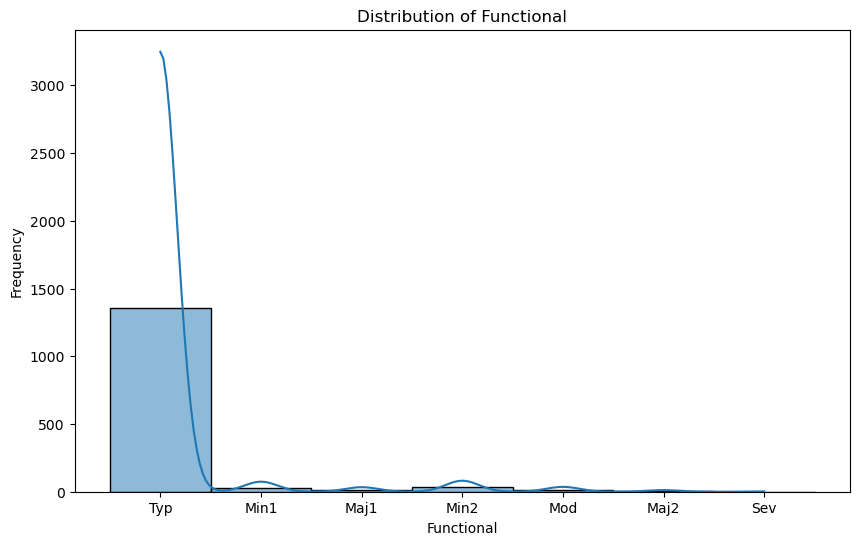

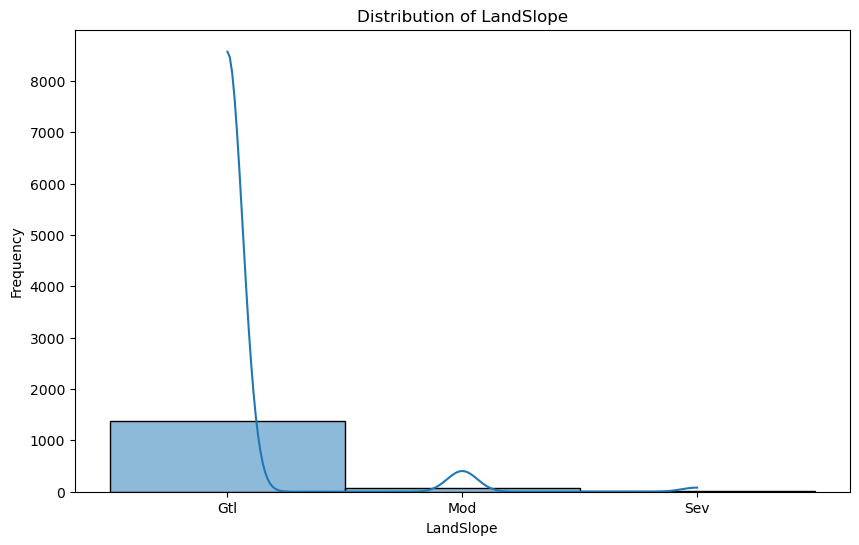

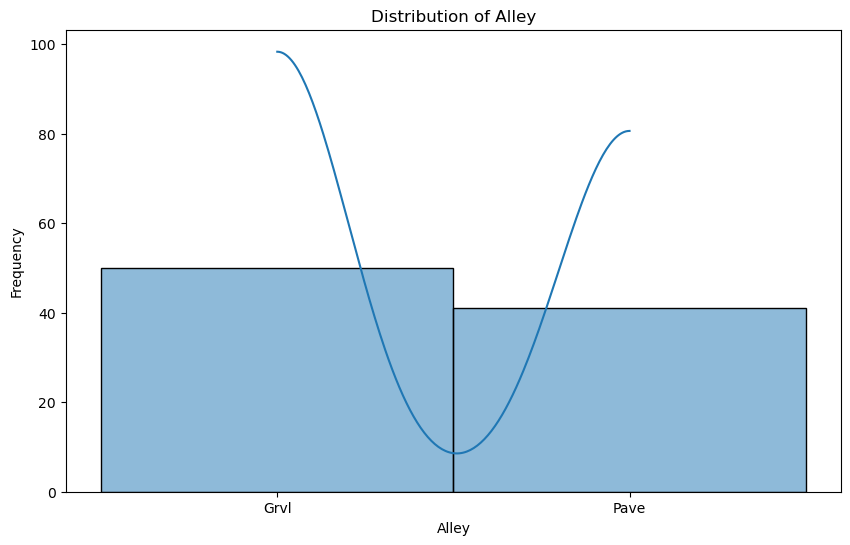

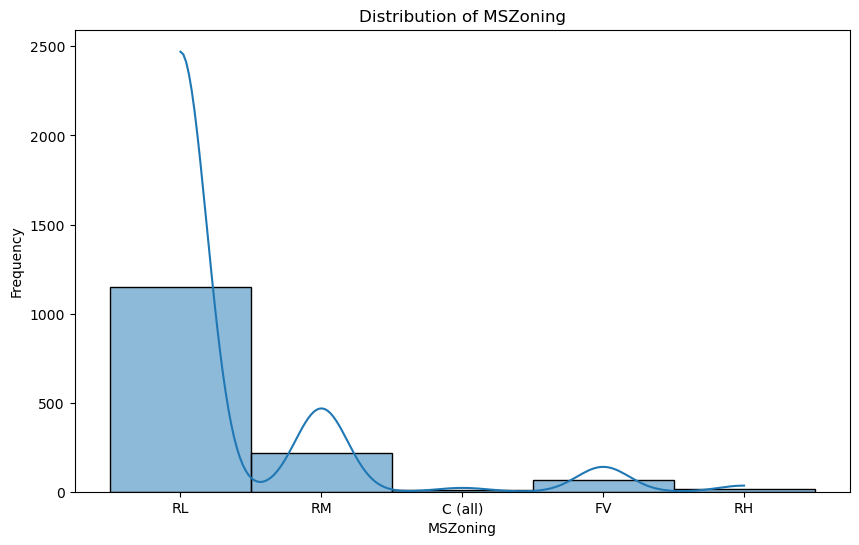

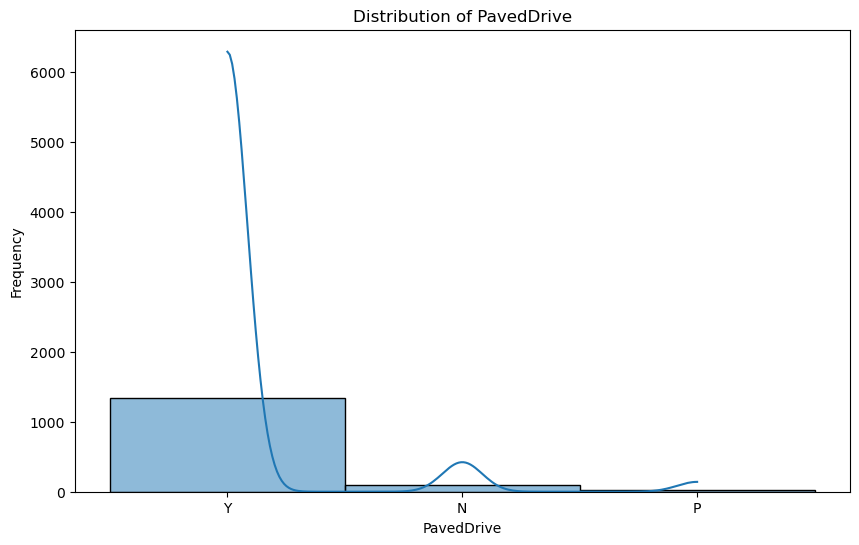

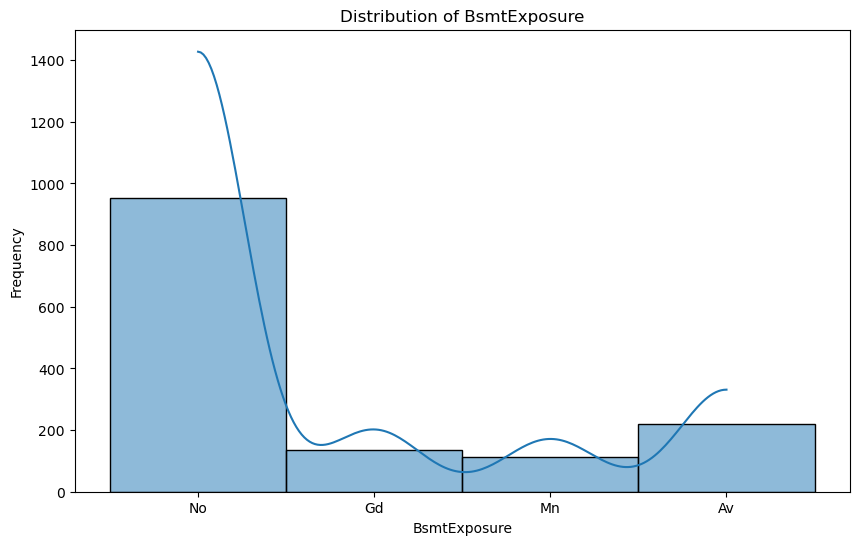

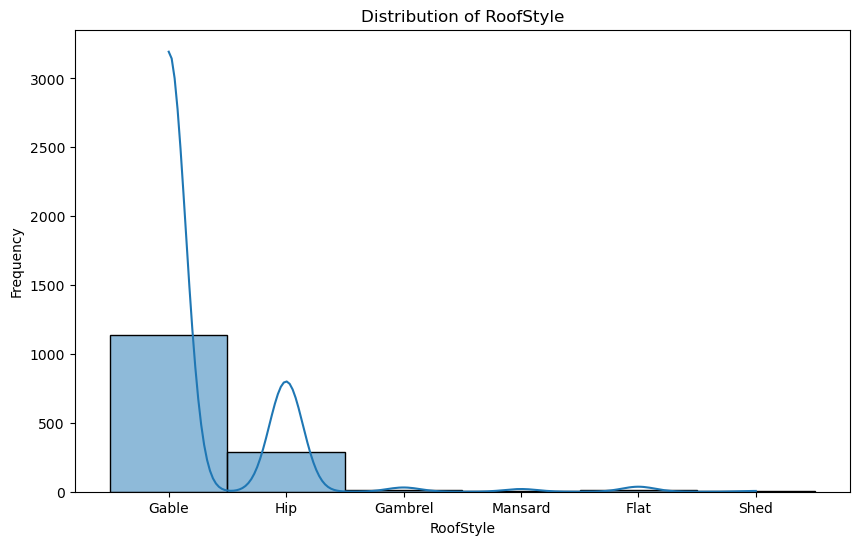

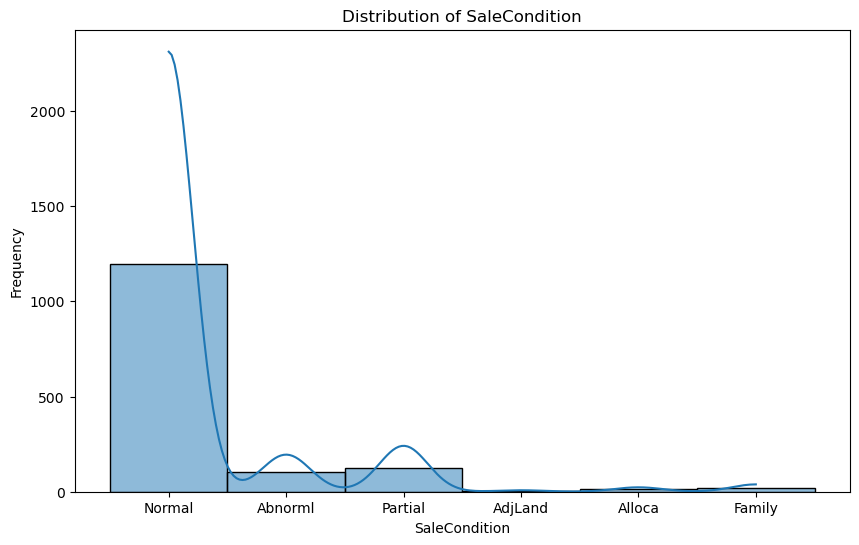

In [26]:
# Plot the distribution of each categorical column (optional)
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(X[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [27]:
# Keep selected columns only
sel_cols = categorical_cols + numeric_cols

X_train = X[sel_cols].copy()

# for test data 
X_test = test_data[sel_cols].copy()

In [28]:
X_train, X_test = X_train.align(X_test, join='left', axis=1)

In [29]:
print(X_train.shape)
print(X_test.shape)

(1460, 79)
(1459, 79)


In [30]:
X_train.isnull().sum().sum()

7829

In [31]:
X_test.isnull().sum().sum()

7878

In [32]:
from sklearn.impute import SimpleImputer

In [33]:
# Separate handling for training and testing datasets

# Training Data Imputation
num_imputer = SimpleImputer(strategy='median')

In [34]:
X_train[numeric_cols] = num_imputer.fit_transform(X_train[numeric_cols])

In [35]:
#cat

In [36]:
cat_imputer = SimpleImputer(strategy='most_frequent')

In [37]:
X_train[categorical_cols] = cat_imputer.fit_transform(X_train[categorical_cols])

In [38]:
# Testing Data Imputation
test_numeric_cols = [col for col in numeric_cols if col in X_test.columns]
test_categorical_cols = [col for col in categorical_cols if col in X_test.columns]

In [39]:
X_test[test_numeric_cols] = num_imputer.transform(X_test[test_numeric_cols])
X_test[test_categorical_cols] = cat_imputer.transform(X_test[test_categorical_cols])

In [40]:
X_train.isnull().sum().sum()

0

In [41]:
X_test.isnull().sum().sum()

0

In [42]:
# Scale Numerical Columns
scaler = StandardScaler()

In [43]:
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [44]:
X_test.isnull().sum().sum()

0

In [45]:
# Define a function to check and remove duplicate columns
def remove_duplicate_columns(df):
    # Identify duplicate columns
    duplicate_columns = df.columns[df.columns.duplicated()]
    
    # Print the number of duplicate columns
    num_duplicate_columns = len(duplicate_columns)
    print(f"Number of duplicate columns: {num_duplicate_columns}")
    
    # Remove duplicate columns
    df_cleaned = df.loc[:, ~df.columns.duplicated()]
    
    return df_cleaned

In [46]:
# Check and remove duplicates for X_train
print("Checking and removing duplicates for X_train:")
X_train_cleaned = remove_duplicate_columns(X_train)
print("Shape of X_train after removing duplicate columns:", X_train_cleaned.shape)

Checking and removing duplicates for X_train:
Number of duplicate columns: 0
Shape of X_train after removing duplicate columns: (1460, 79)


In [47]:
# Verify that there are no more duplicate columns
duplicate_columns_X_train_cleaned = X_train_cleaned.columns[X_train_cleaned.columns.duplicated()]
num_duplicate_columns_X_train_cleaned = len(duplicate_columns_X_train_cleaned)
print(f"Number of duplicate columns in X_train after cleaning: {num_duplicate_columns_X_train_cleaned}")

Number of duplicate columns in X_train after cleaning: 0


In [48]:
X_train.isnull().sum().sum()

0

In [49]:
# Check and remove duplicates for X_test
print("Checking and removing duplicates for X_test:")
X_test_cleaned = remove_duplicate_columns(X_test)
print("Shape of X_test after removing duplicate columns:", X_test_cleaned.shape)

Checking and removing duplicates for X_test:
Number of duplicate columns: 0
Shape of X_test after removing duplicate columns: (1459, 79)


In [50]:
X_test_cleaned.isnull().sum().sum()

0

In [51]:
# Verify that there are no more duplicate columns
duplicate_columns_X_test_cleaned = X_test_cleaned.columns[X_test_cleaned.columns.duplicated()]
num_duplicate_columns_X_test_cleaned = len(duplicate_columns_X_test_cleaned)
print(f"Number of duplicate columns in X_test after cleaning: {num_duplicate_columns_X_test_cleaned}")

Number of duplicate columns in X_test after cleaning: 0


In [52]:
# Align Columns
# Add any missing columns to test data with default value 0
for col in X_train_cleaned.columns:
    if col not in X_test_cleaned.columns:
        X_test[col] = 0

# Ensure the order of columns is the same
X_test_cleaned = X_test_cleaned[X_train_cleaned.columns]

In [53]:
# Verify the transformations
print("Processed training data shape:", X_train_cleaned.shape)
print("Processed testing data shape:", X_test_cleaned.shape)
print("Missing values in the processed training dataset:", X_train_cleaned.isnull().sum().sum())
print("Missing values in the processed testing dataset:", X_test_cleaned.isnull().sum().sum())

Processed training data shape: (1460, 79)
Processed testing data shape: (1459, 79)
Missing values in the processed training dataset: 0
Missing values in the processed testing dataset: 0


In [54]:
# Automated Outlier Removal using Z-score Method for Numerical Columns
def remove_outliers_zscore(df, threshold=3):
    numeric_df = df[numeric_cols]
    z_scores = np.abs(zscore(numeric_df))
    filtered_entries = (z_scores < threshold).all(axis=1)
    return df[filtered_entries]


In [55]:
X_cleaned = remove_outliers_zscore(X_train_cleaned)

In [56]:
X_testo = remove_outliers_zscore(X_test_cleaned)

In [57]:
# Ensure y is consistent with the cleaned X 
y = y.loc[X_cleaned.index]

In [58]:
X_cleaned.shape

(1149, 79)

In [59]:
X_testo.shape

(1161, 79)

In [60]:
y.shape

(1149,)

In [61]:
X_cleaned

Fireplaces Exterior1st BsmtQual KitchenAbvGr BsmtCond CentralAir  \
Id                                                                      
1             0     VinylSd       Gd            1       TA          Y   
2             1     MetalSd       Gd            1       TA          Y   
3             1     VinylSd       Gd            1       TA          Y   
5             1     VinylSd       Gd            1       TA          Y   
7             1     VinylSd       Ex            1       TA          Y   
...         ...         ...      ...          ...      ...        ...   
1453          0     VinylSd       Gd            1       TA          Y   
1454          0     VinylSd       Gd            1       TA          Y   
1455          0     VinylSd       Gd            1       TA          Y   
1456          1     VinylSd       Gd            1       TA          Y   
1457          2     Plywood       Gd            1       TA          Y   

     LandContour Neighborhood GarageCars HeatingQC  ... LowQualFinSF  \
Id                                                  ...                
1            Lvl      CollgCr          2        Ex  ...    -0.120242   
2            Lvl      Veenker          2        Ex  ...    -0.120242   
3            Lvl      CollgCr          2        Ex  ...    -0.120242   
5            Lvl      NoRidge          3        Ex  ...    -0.120242   
7            Lvl      Somerst          2        Ex  ...    -0.120242   
...          ...          ...        ...       ...  ...          ...   
1453         Lvl      Edwards          2        Gd  ...    -0.120242   
1454         Lvl      Mitchel          0        Ex  ...    -0.120242   
1455         Lvl      Somerst          2        Ex  ...    -0.120242   
1456         Lvl      Gilbert          2        Ex  ...    -0.120242   
1457         Lvl       NWAmes          2        TA  ...    -0.120242   

     GrLivArea GarageYrBlt GarageArea WoodDeckSF OpenPorchSF EnclosedPorch  \
Id                                                                           
1     0.370333    1.017598   0.351000  -0.752176    0.216503     -0.359325   
2    -0.482512   -0.107927  -0.060731   1.626195   -0.704483     -0.359325   
3     0.515013    0.934226   0.631726  -0.752176   -0.070361     -0.359325   
5     1.299326    0.892540   1.698485   0.780197    0.563760     -0.359325   
7     0.339875    1.059284   0.762732   1.283007    0.156111     -0.359325   
...        ...         ...        ...        ...         ...           ...   
1453 -0.844210    1.100970   0.243389  -0.752176   -0.281735     -0.359325   
1454 -0.714760    0.058817  -2.212963  -0.464856    0.141012     -0.359325   
1455 -0.560562    1.059284  -0.341457  -0.752176    1.001606     -0.359325   
1456  0.250402    0.850854  -0.060731  -0.752176   -0.100558     -0.359325   
1457  1.061367   -0.024555   0.126420   2.033231   -0.704483     -0.359325   

     3SsnPorch ScreenPorch   MiscVal  
Id                                    
1    -0.116339   -0.270208 -0.087688  
2    -0.116339   -0.270208 -0.087688  
3    -0.116339   -0.270208 -0.087688  
5    -0.116339   -0.270208 -0.087688  
7    -0.116339   -0.270208 -0.087688  
...        ...         ...       ...  
1453 -0.116339   -0.270208 -0.087688  
1454 -0.116339   -0.270208 -0.087688  
1455 -0.116339   -0.270208 -0.087688  
1456 -0.116339   -0.270208 -0.087688  
1457 -0.116339   -0.270208 -0.087688  

[1149 rows x 79 columns]

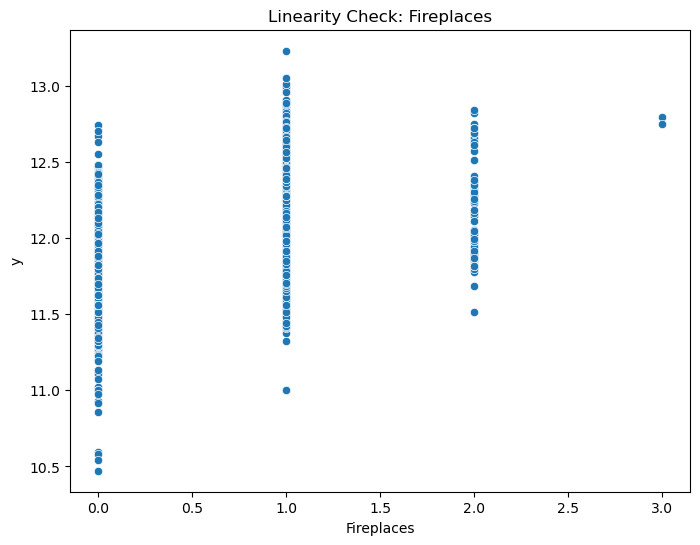

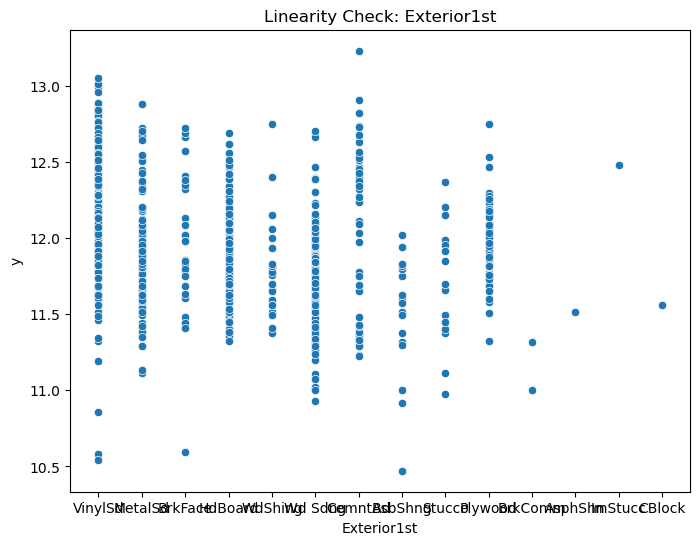

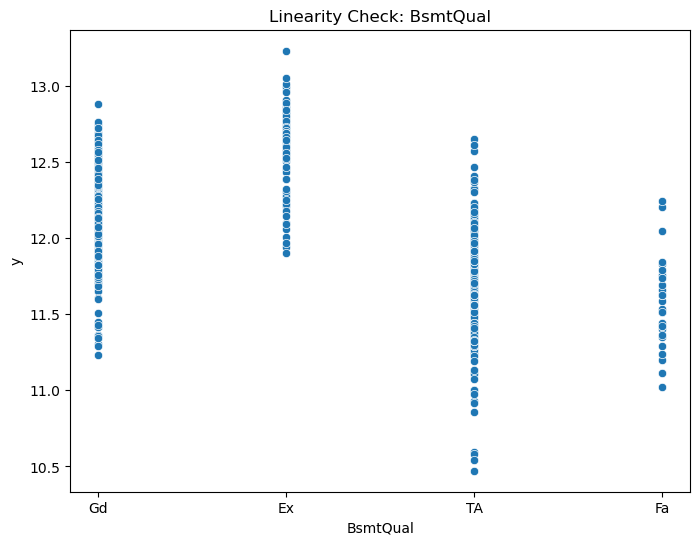

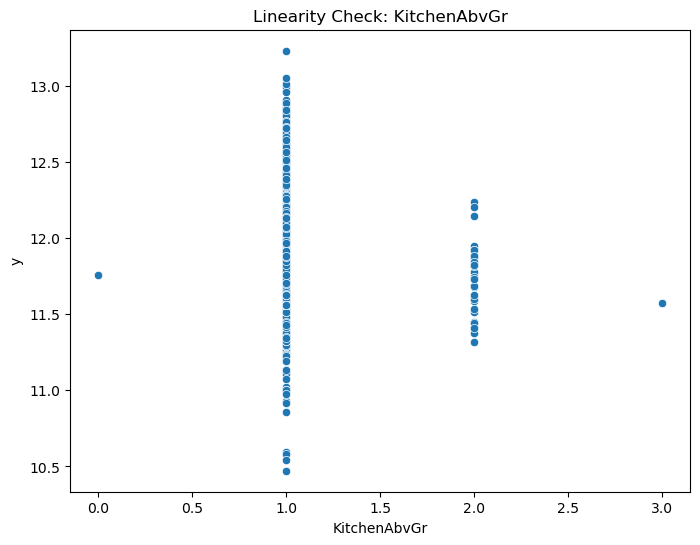

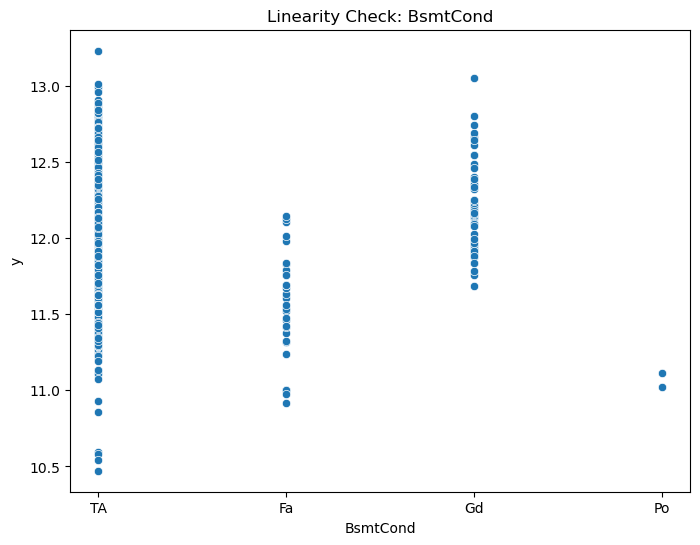

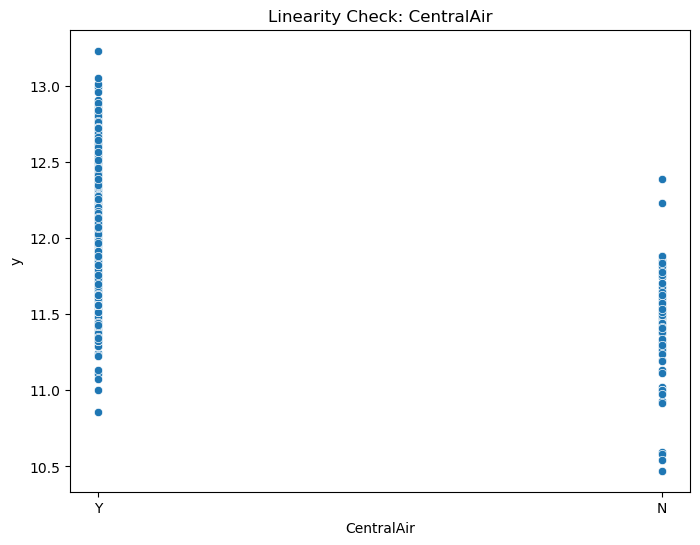

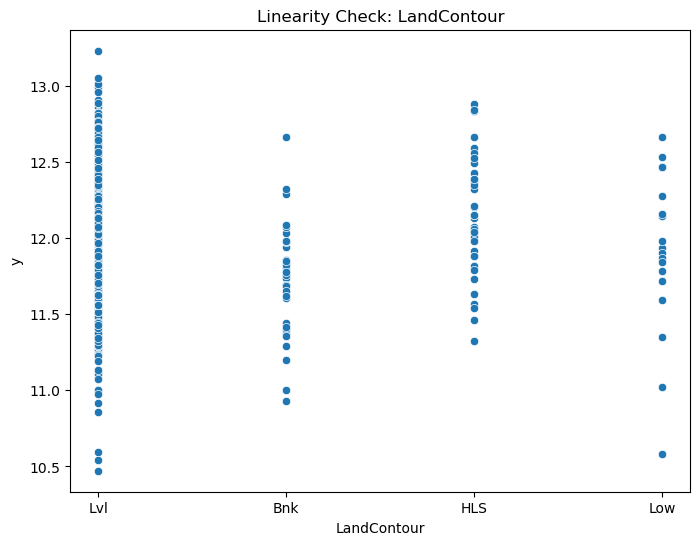

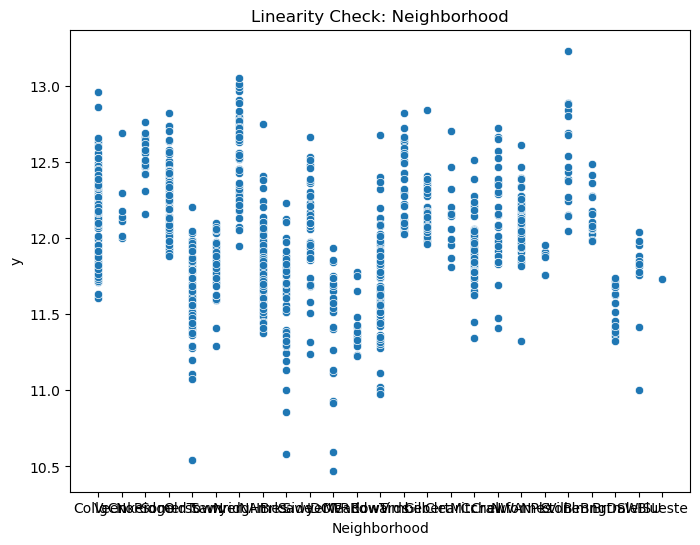

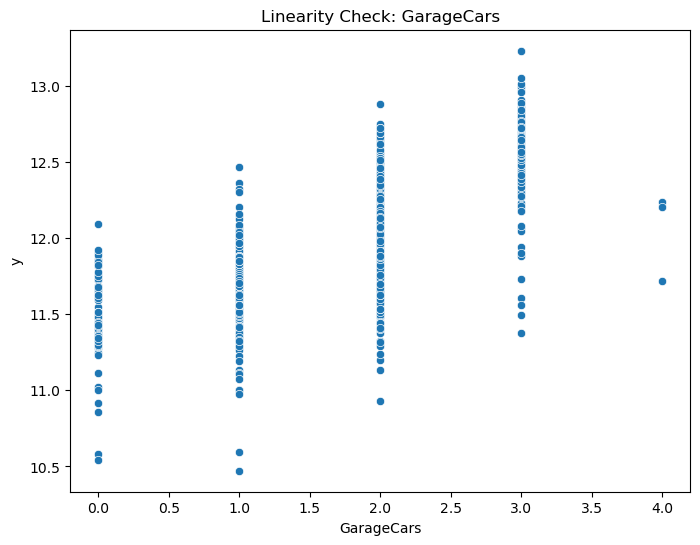

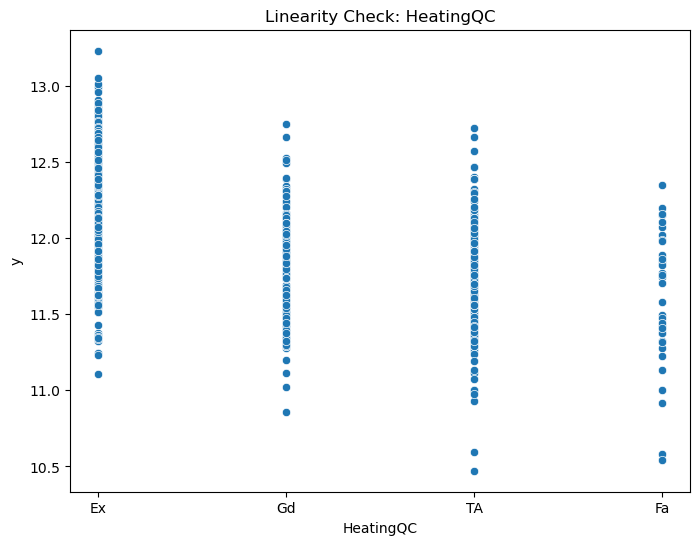

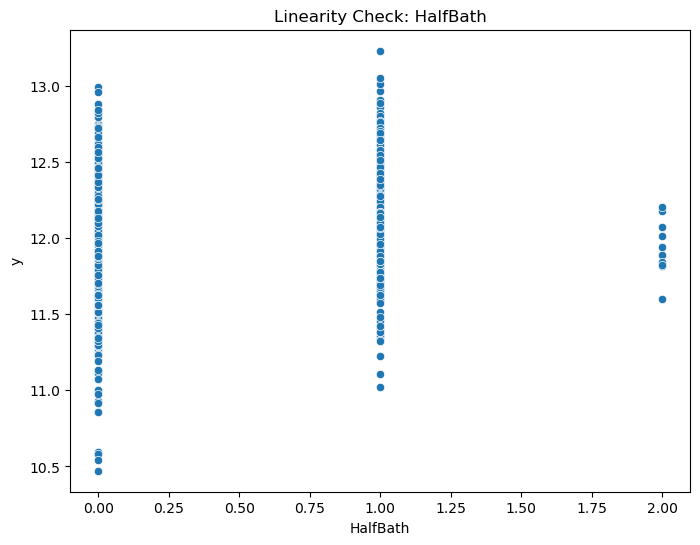

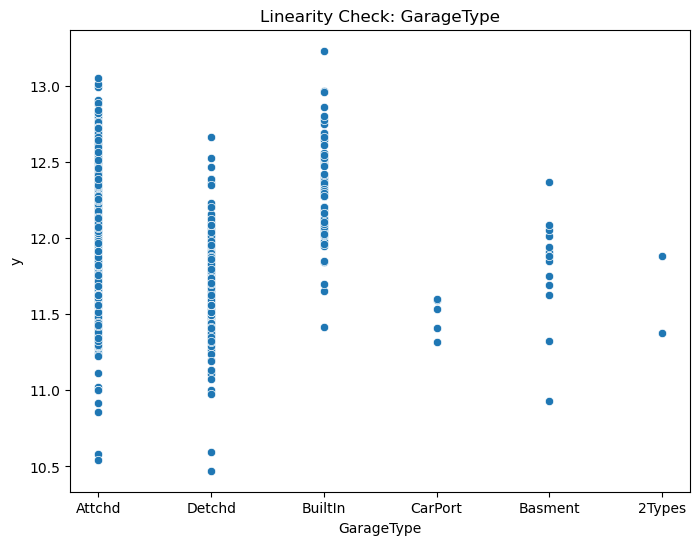

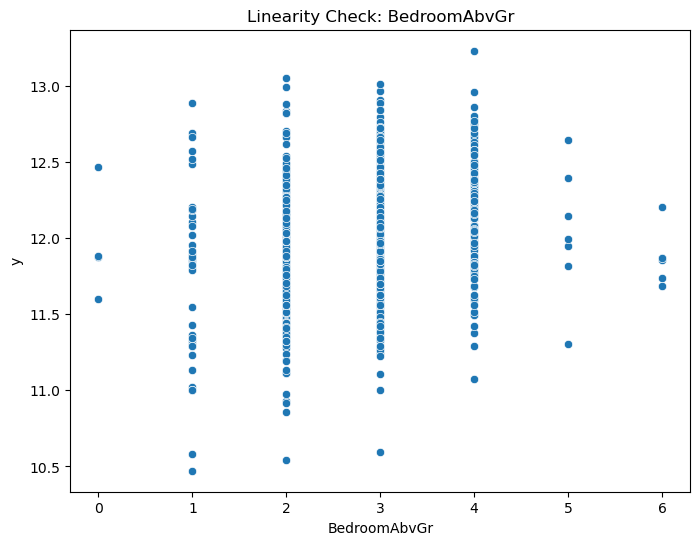

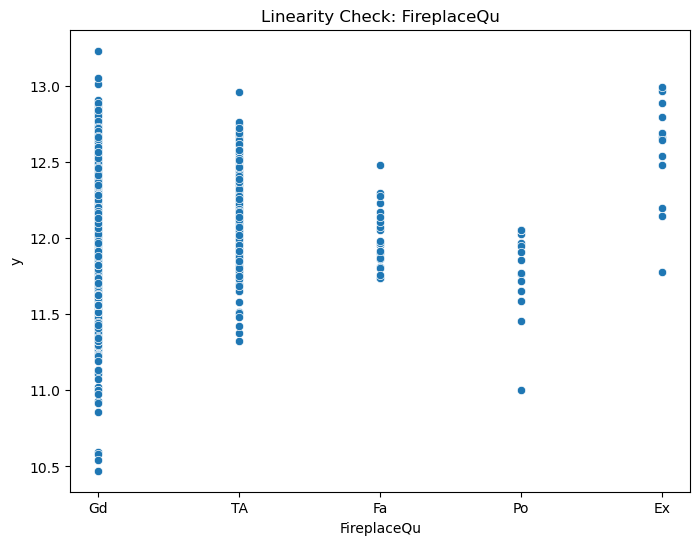

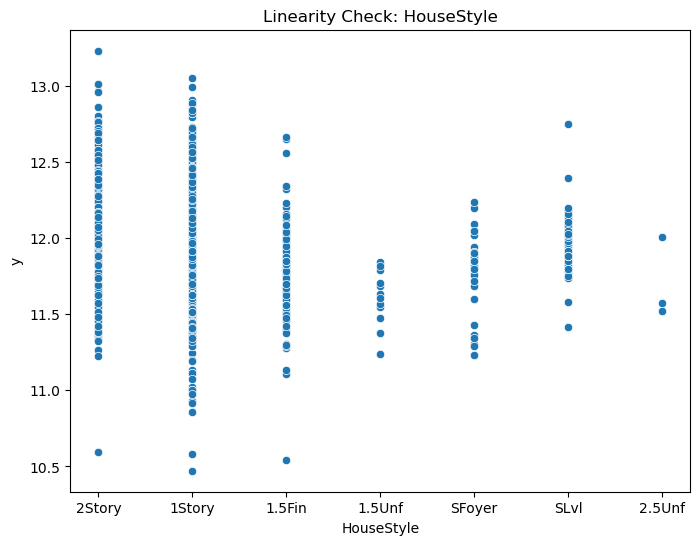

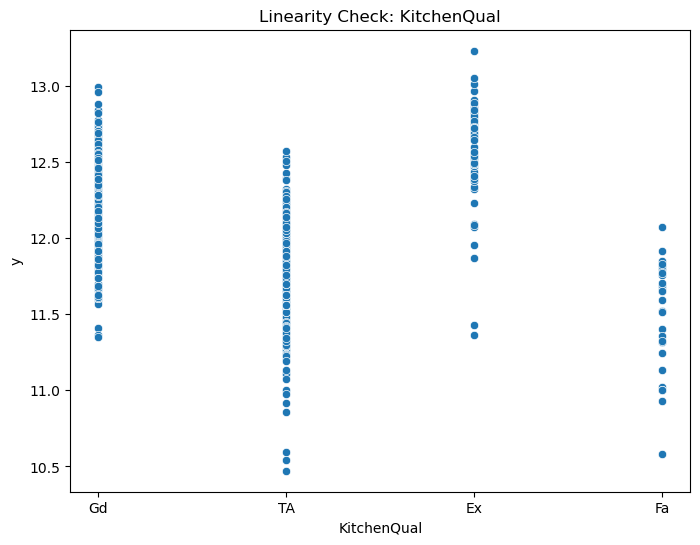

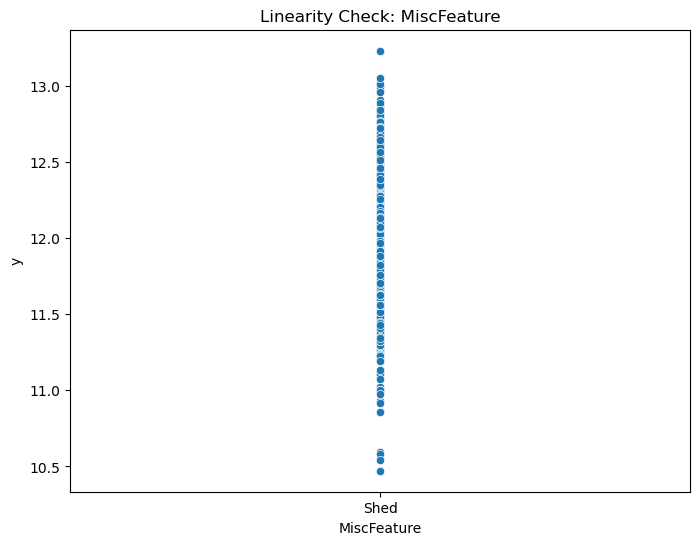

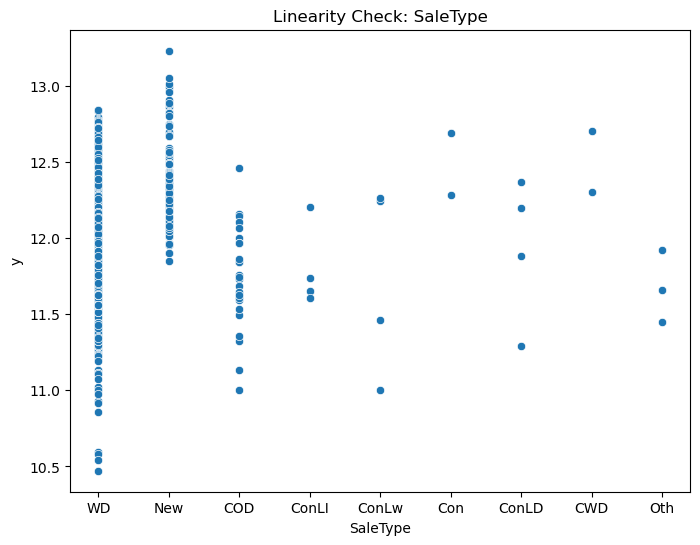

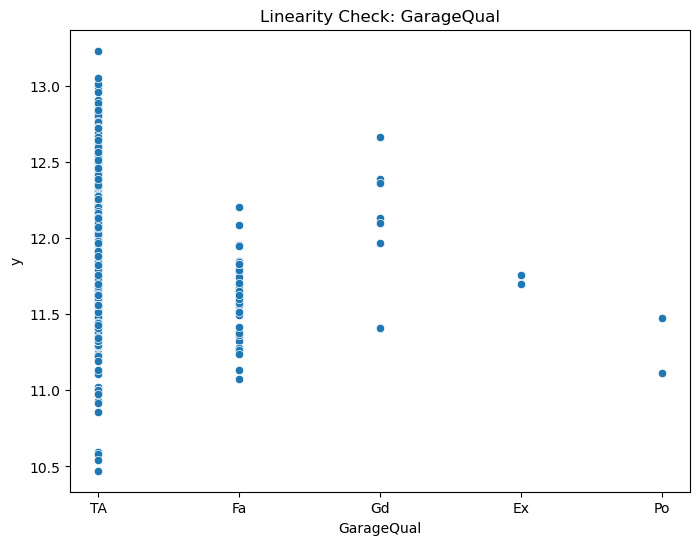

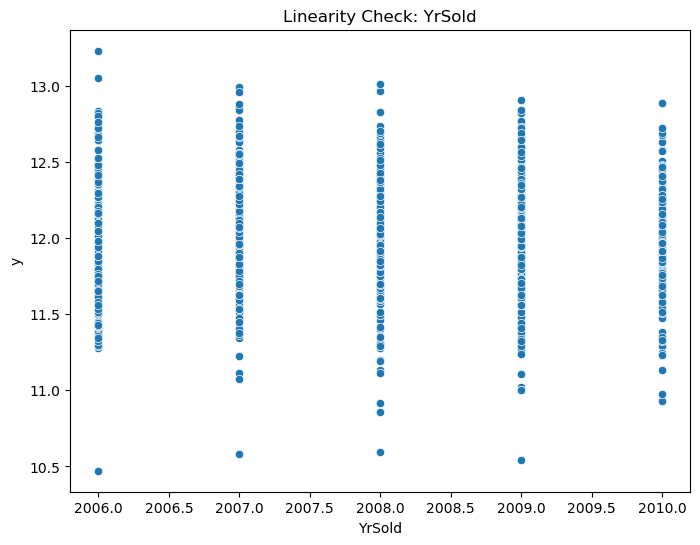

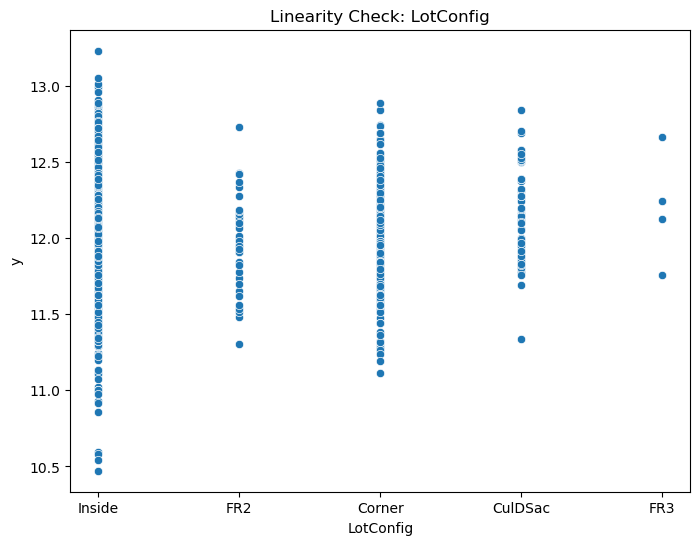

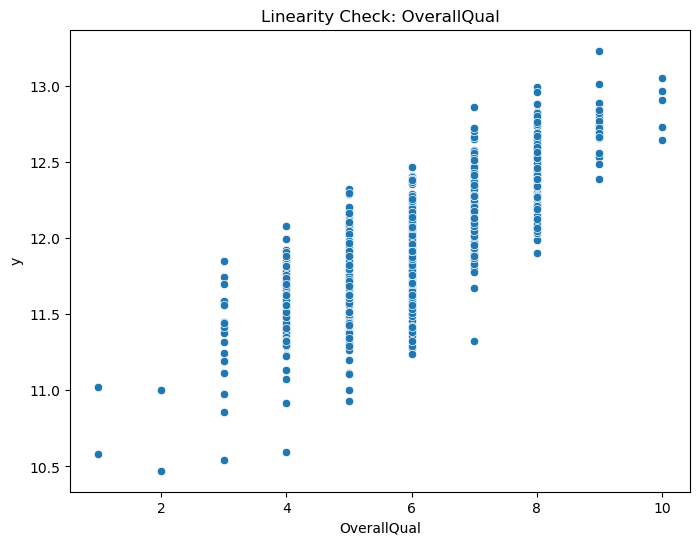

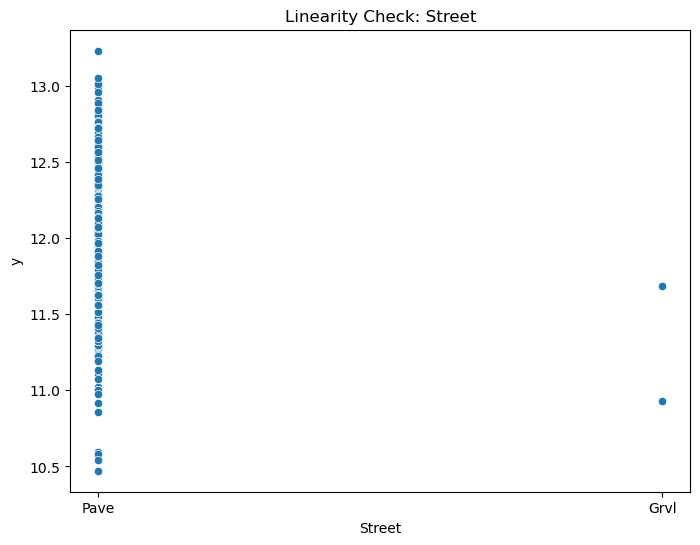

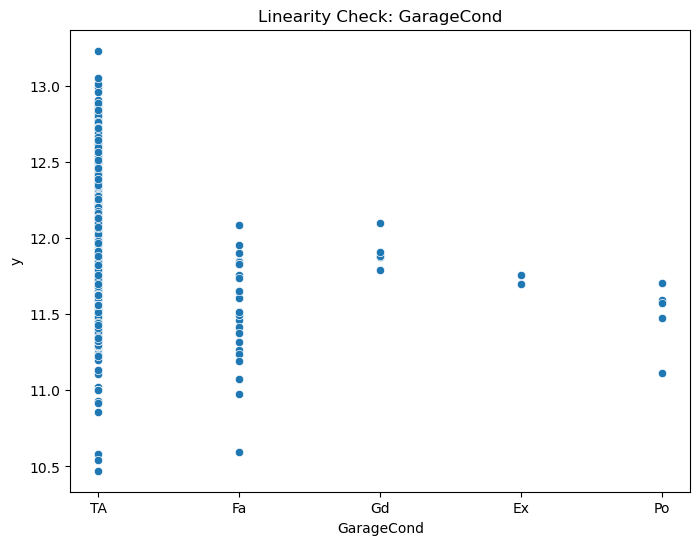

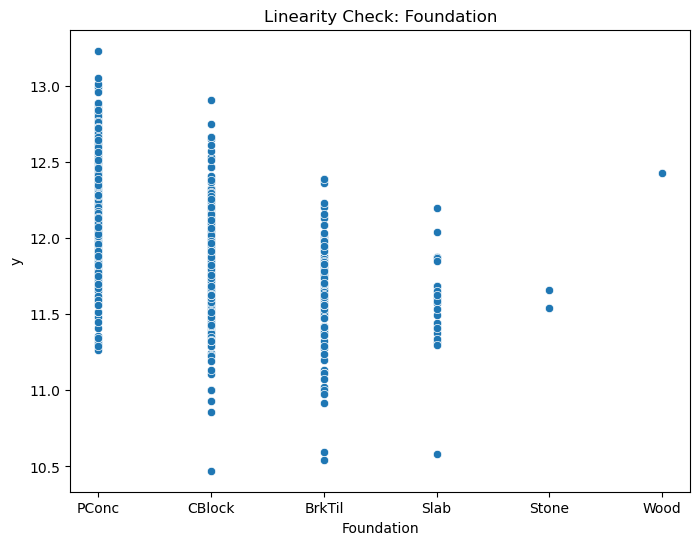

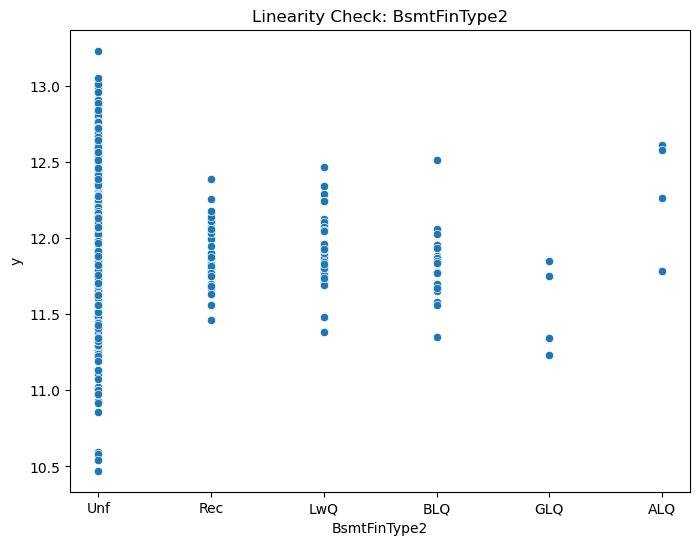

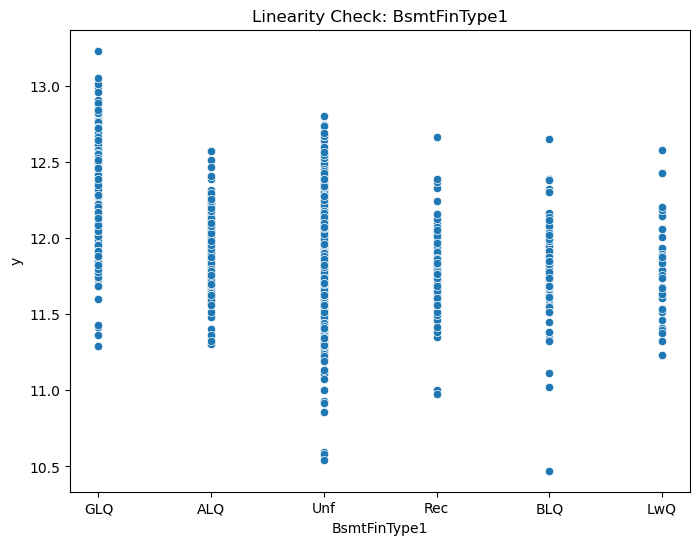

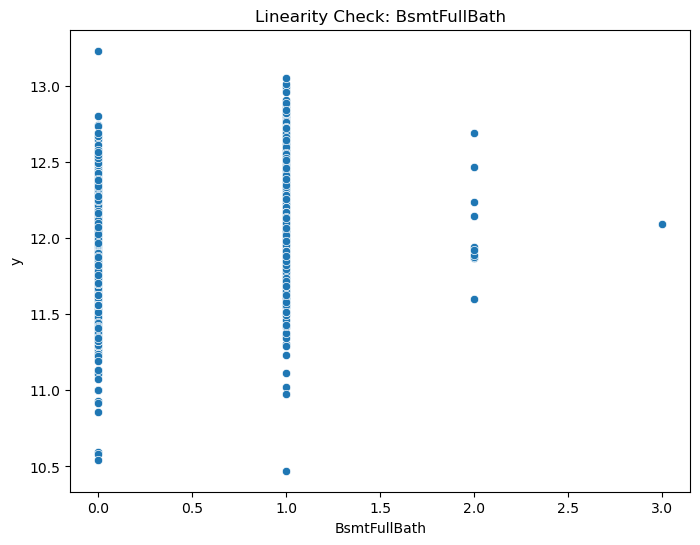

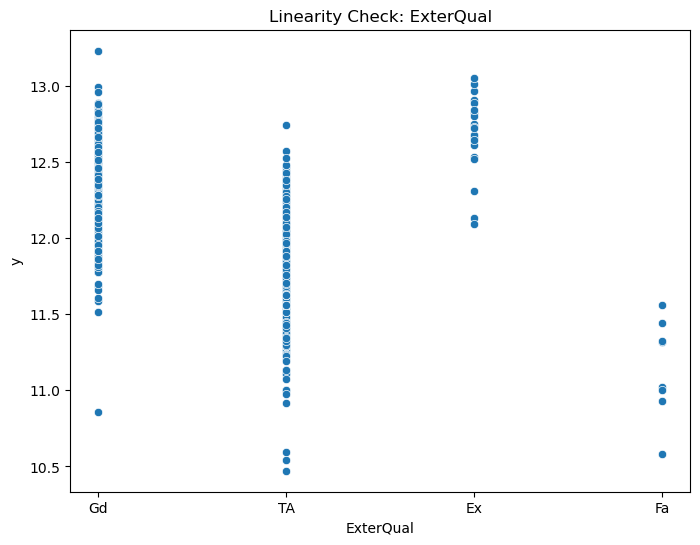

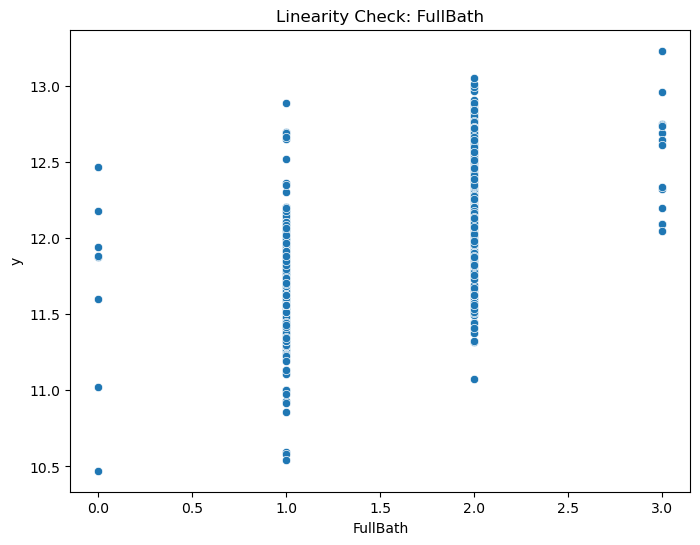

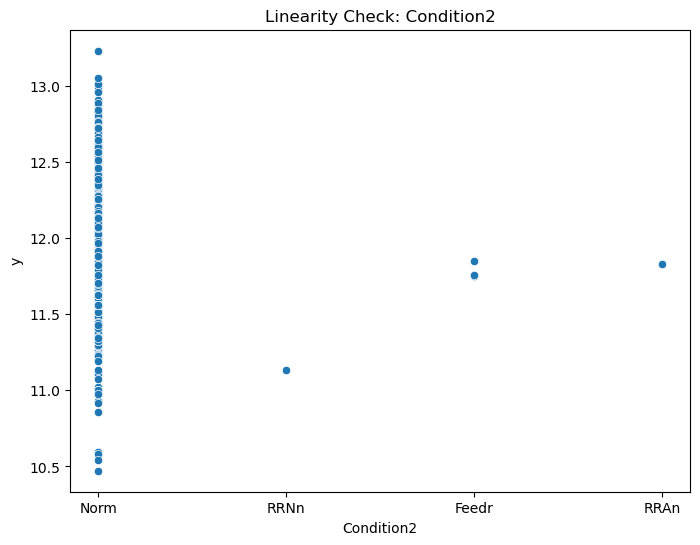

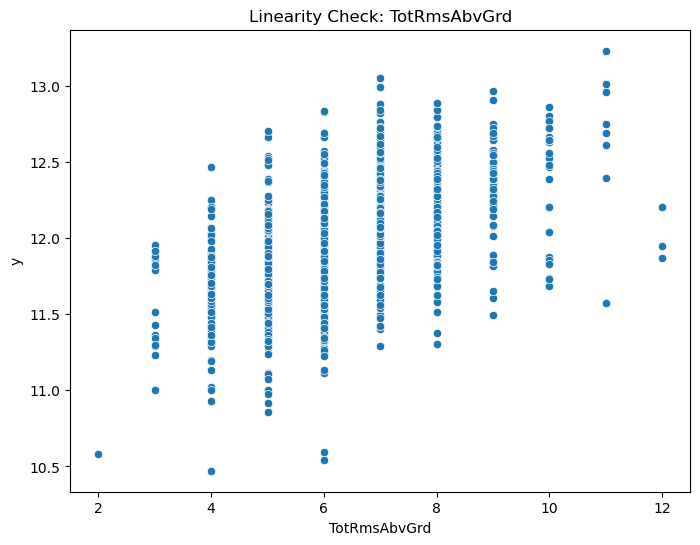

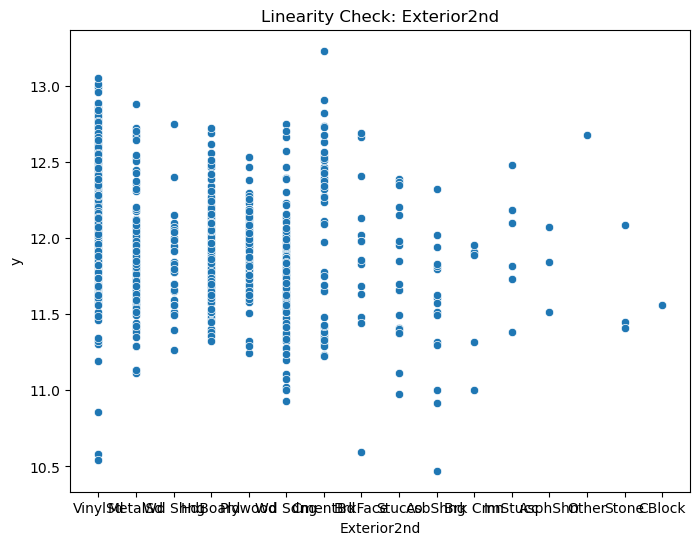

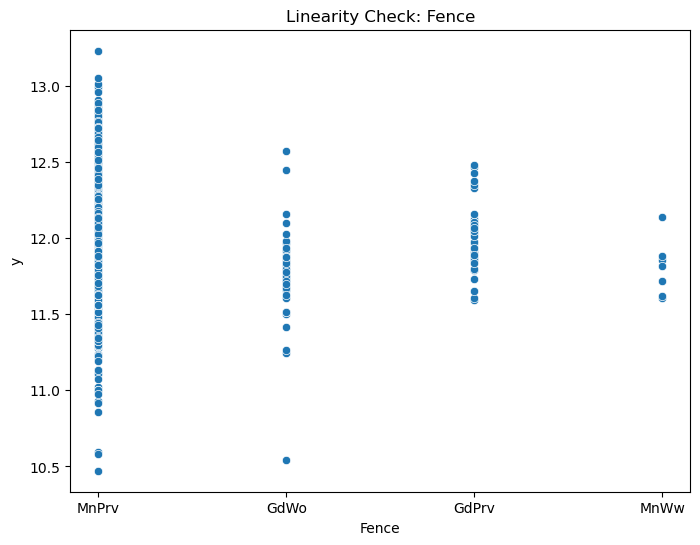

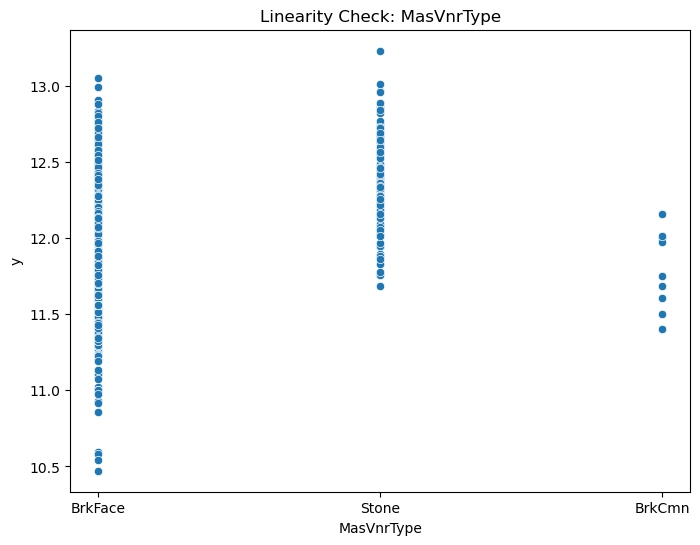

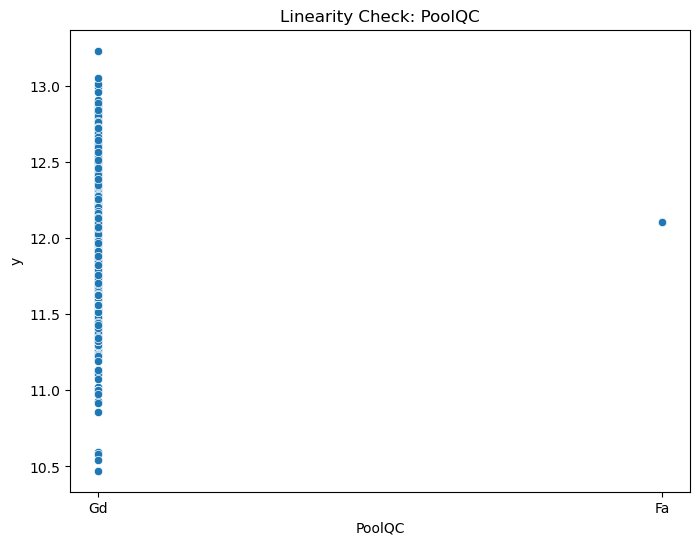

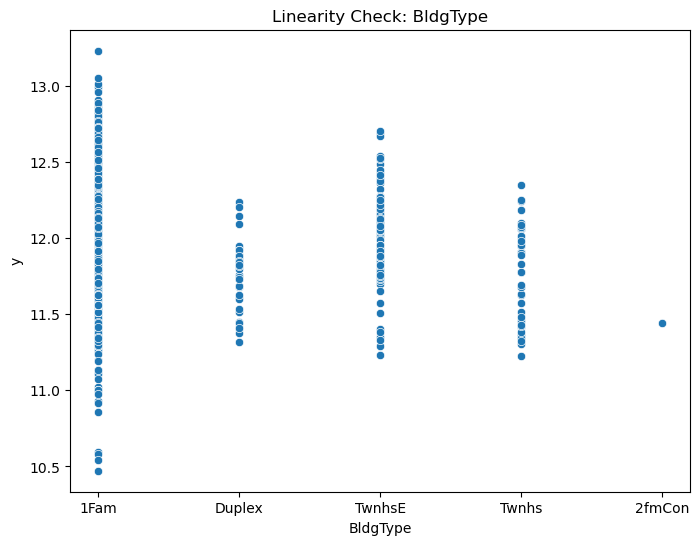

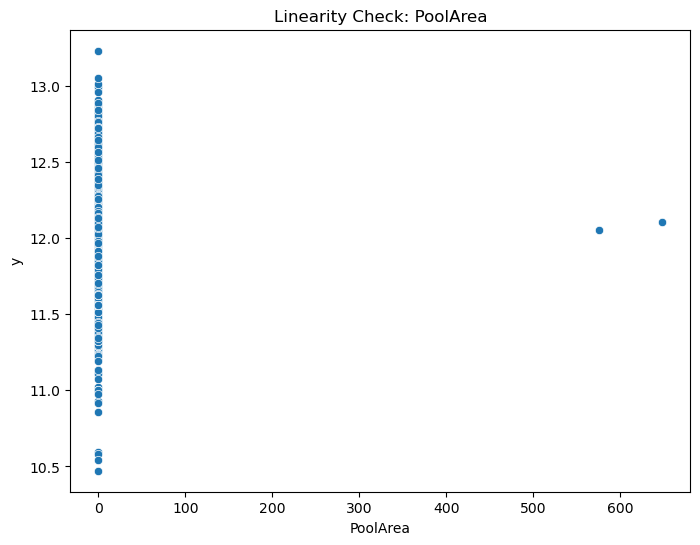

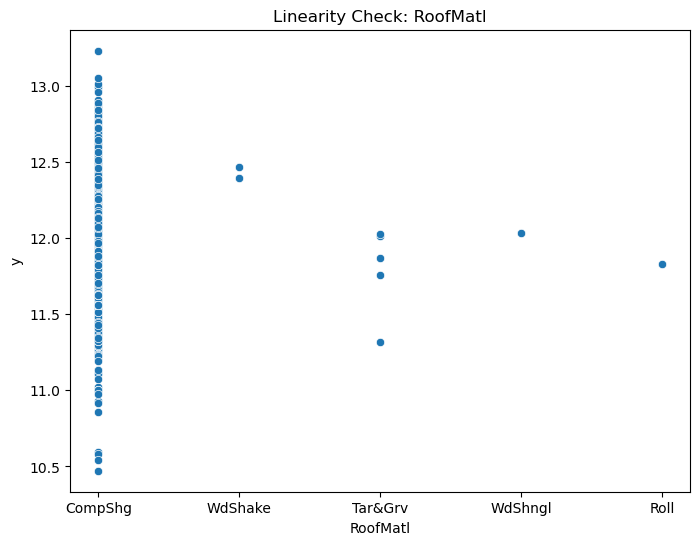

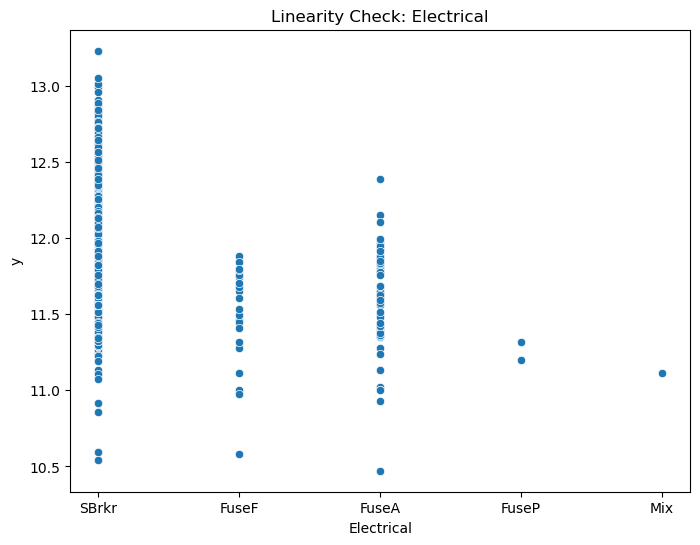

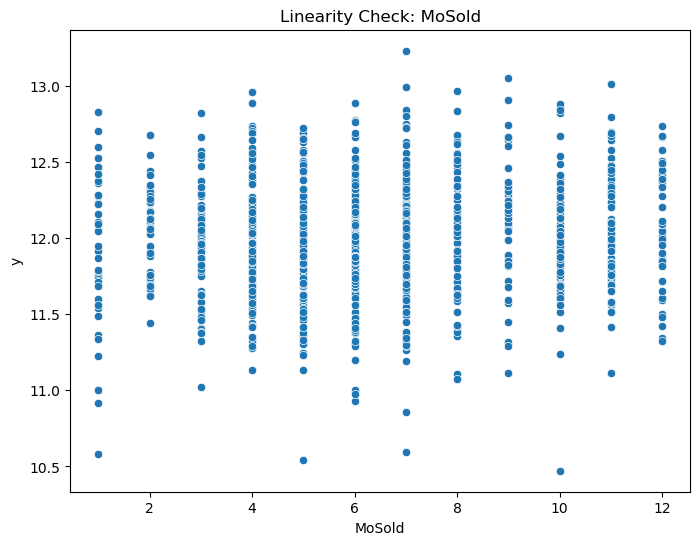

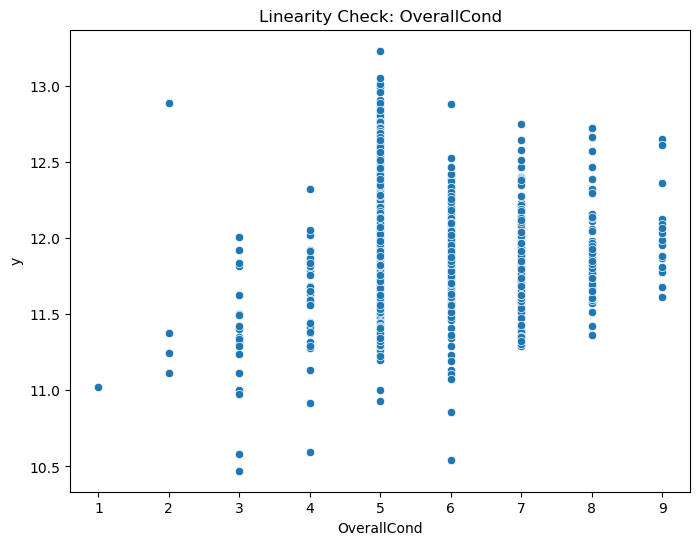

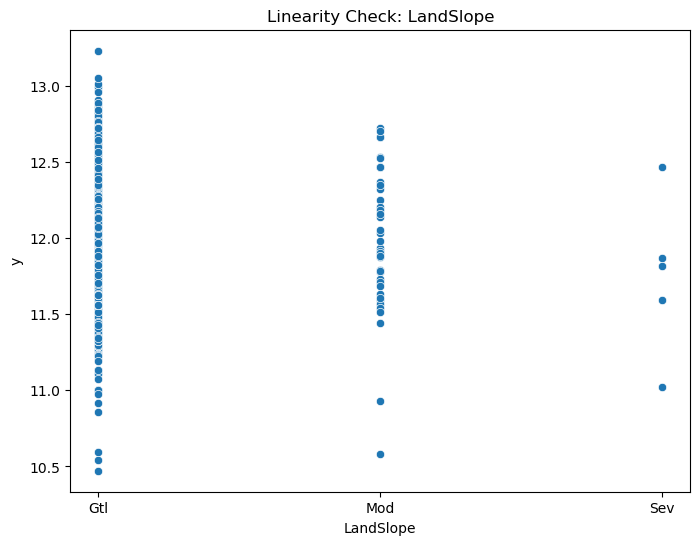

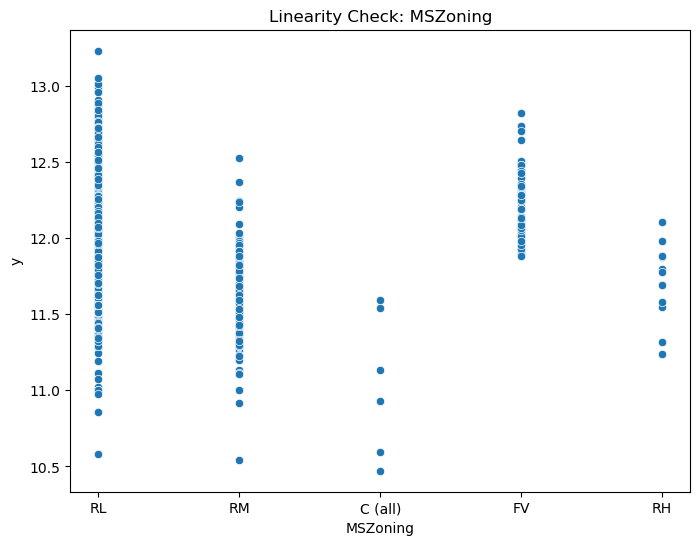

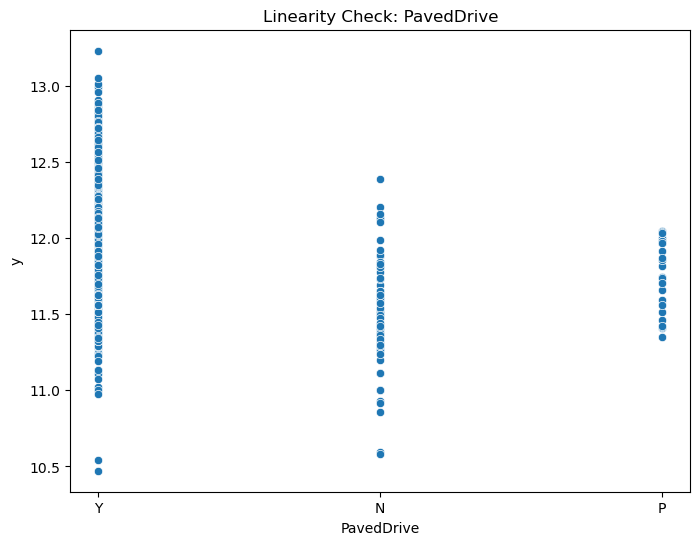

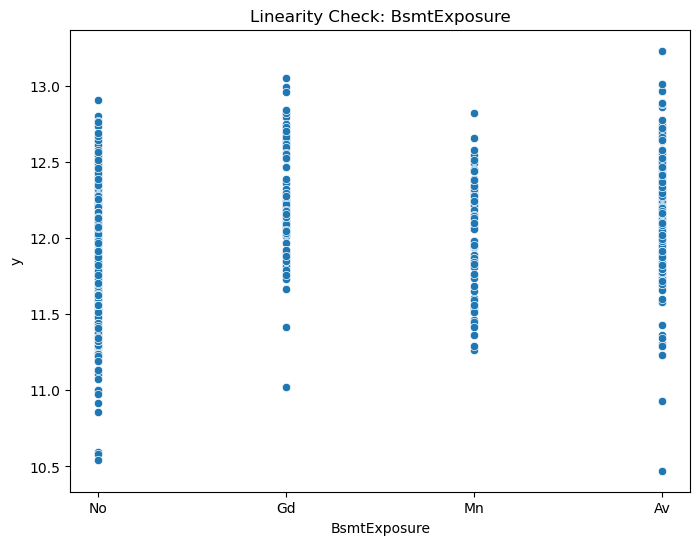

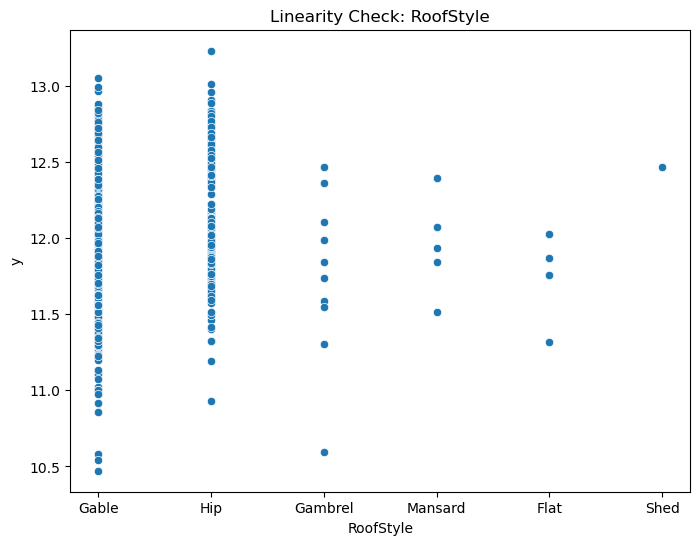

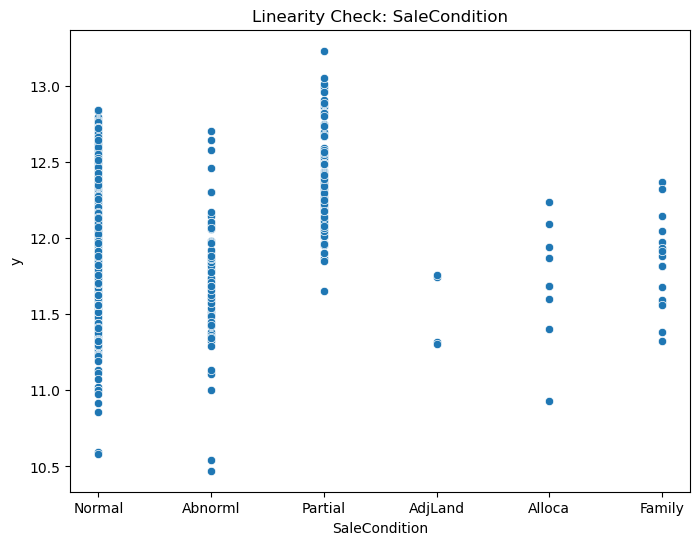

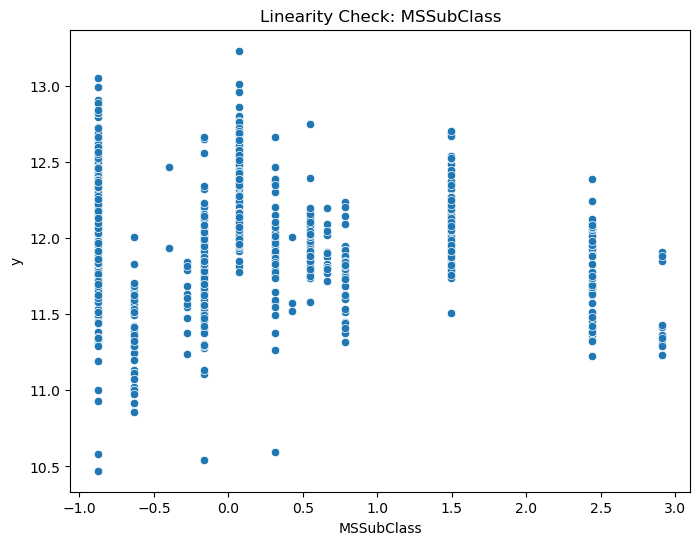

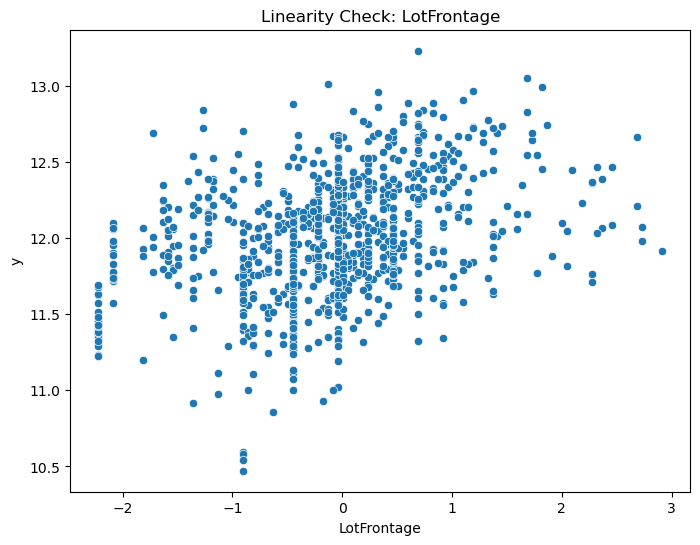

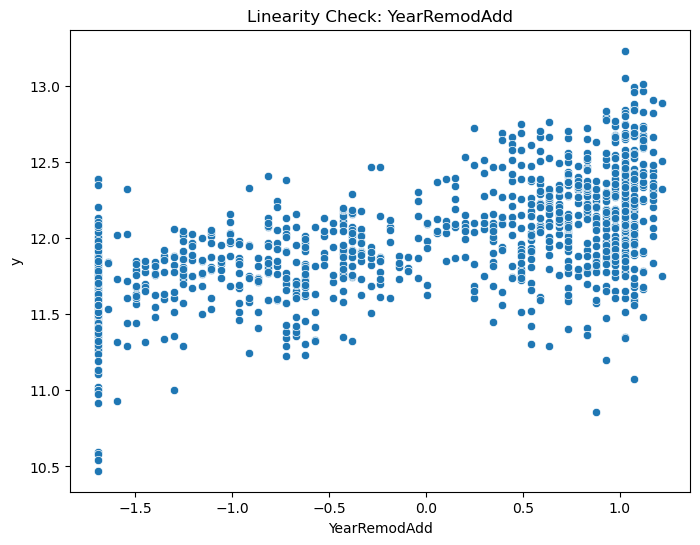

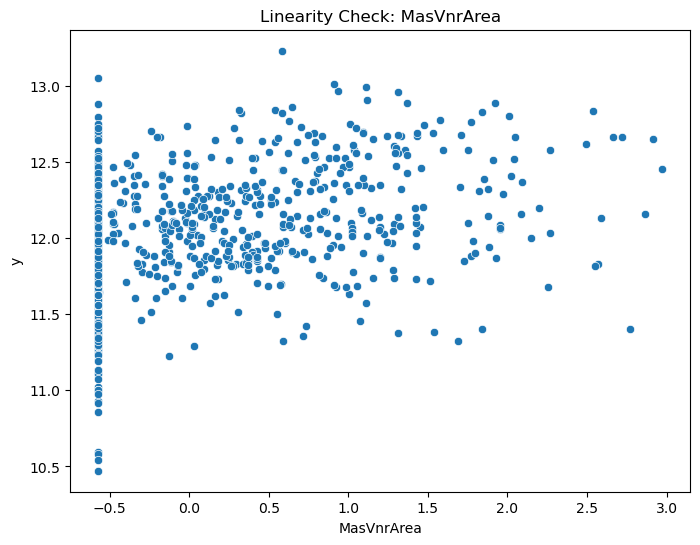

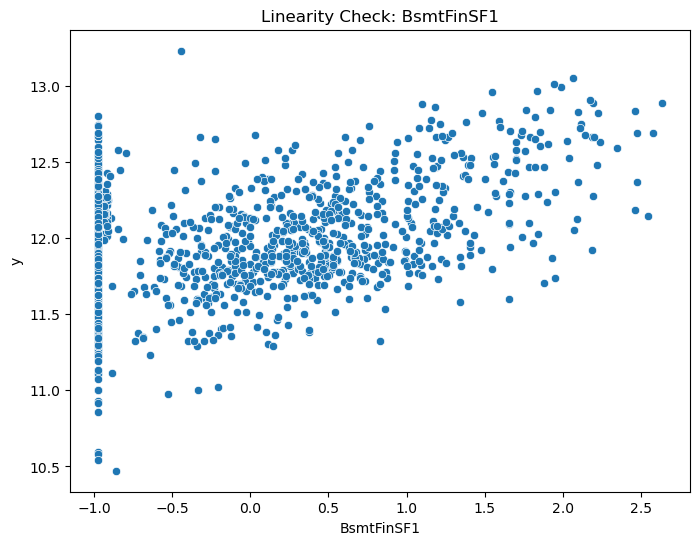

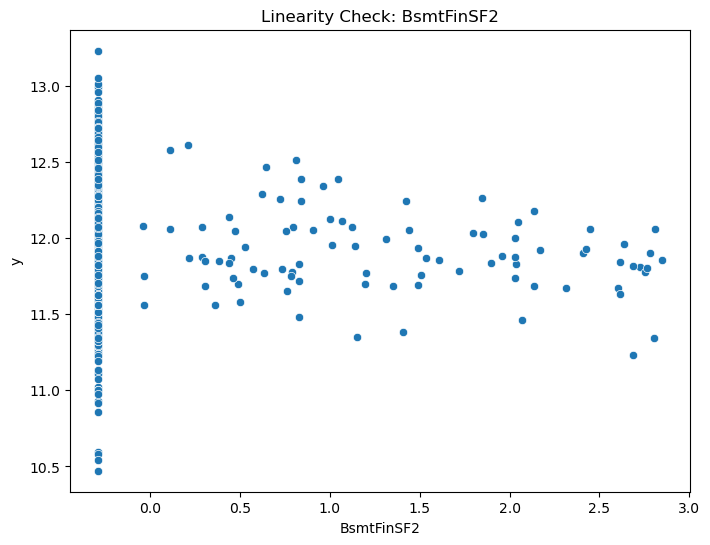

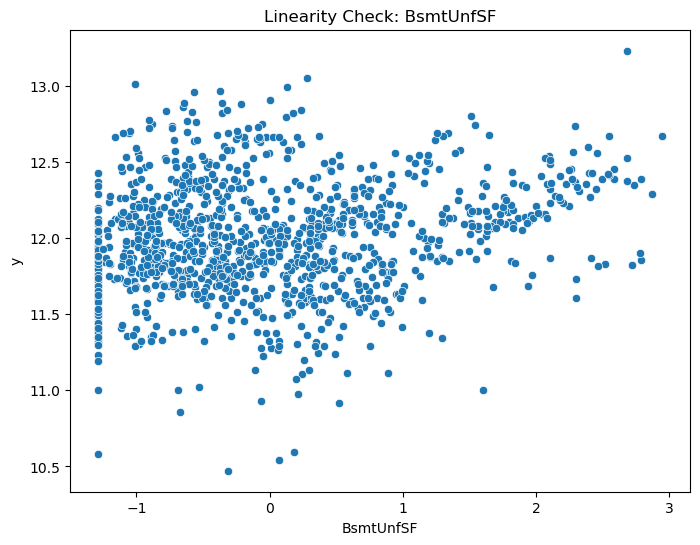

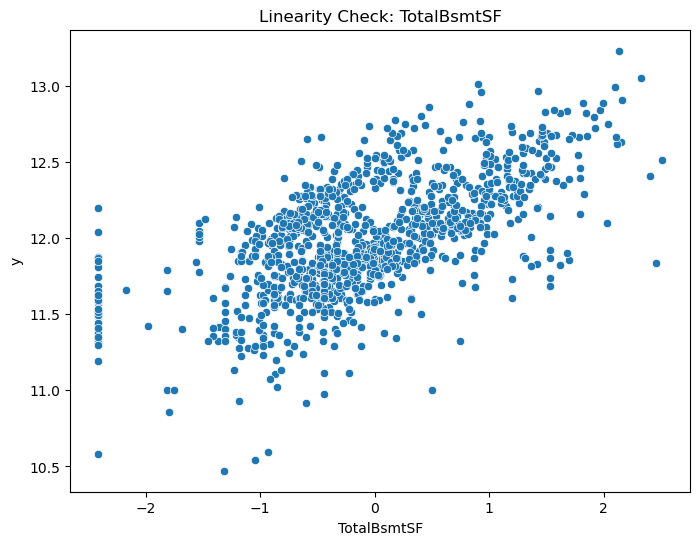

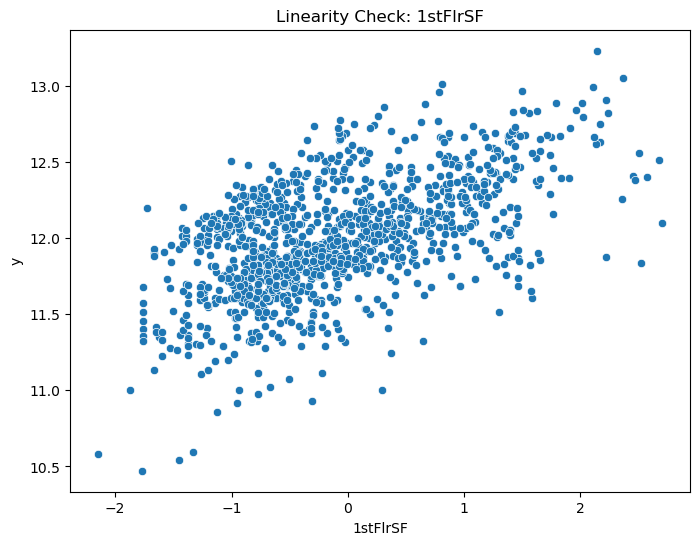

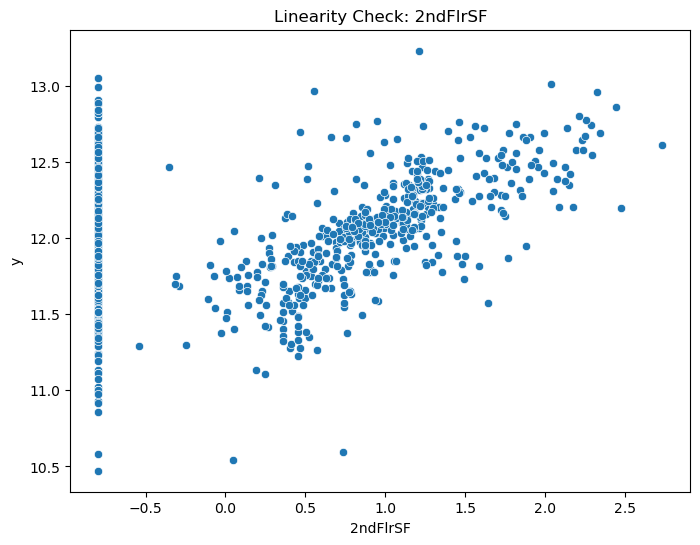

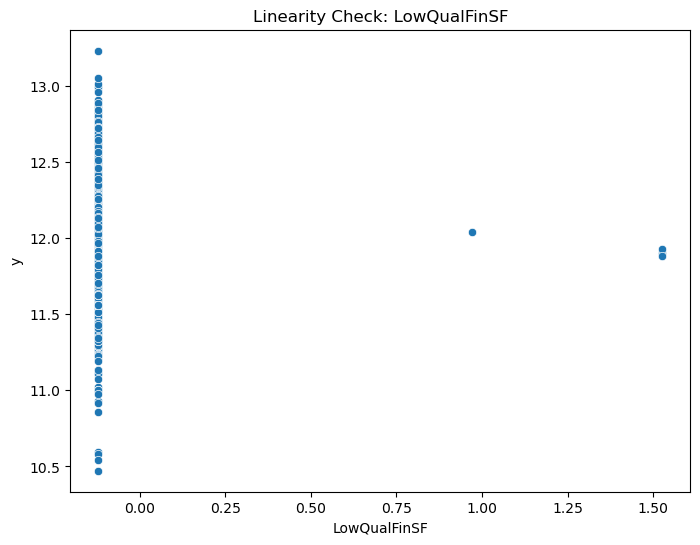

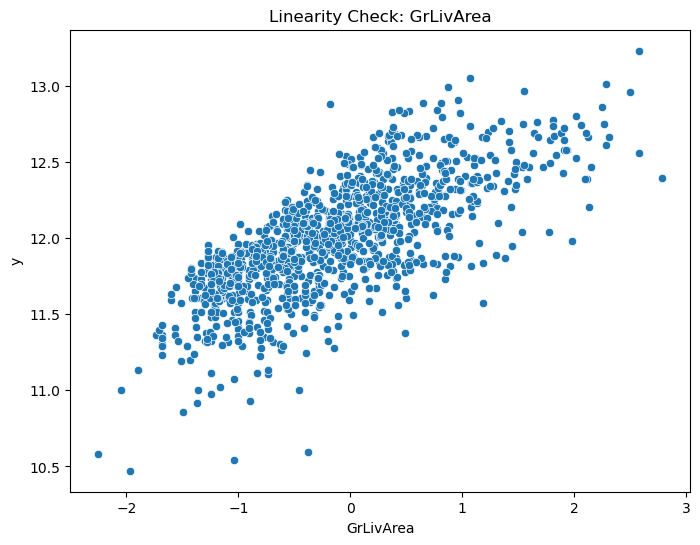

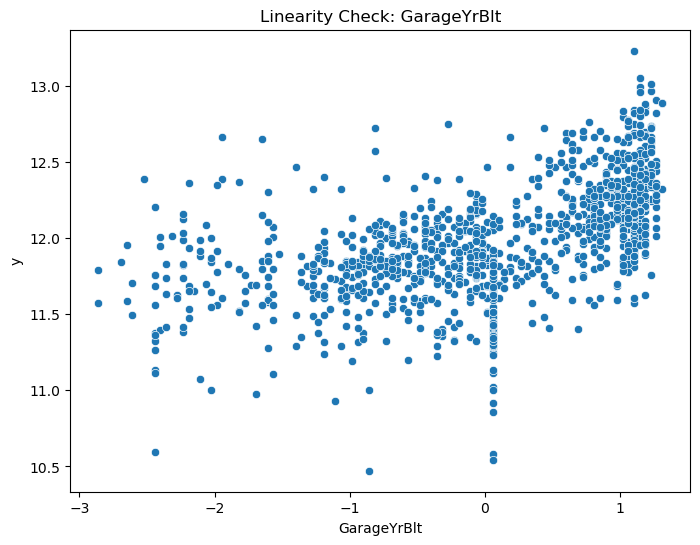

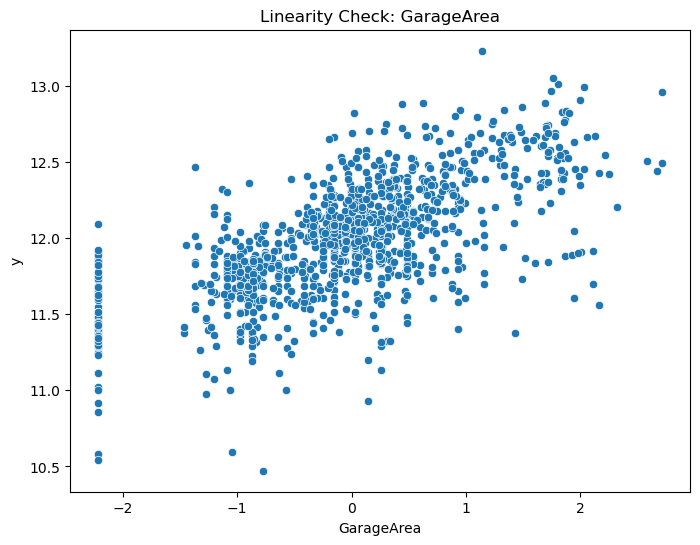

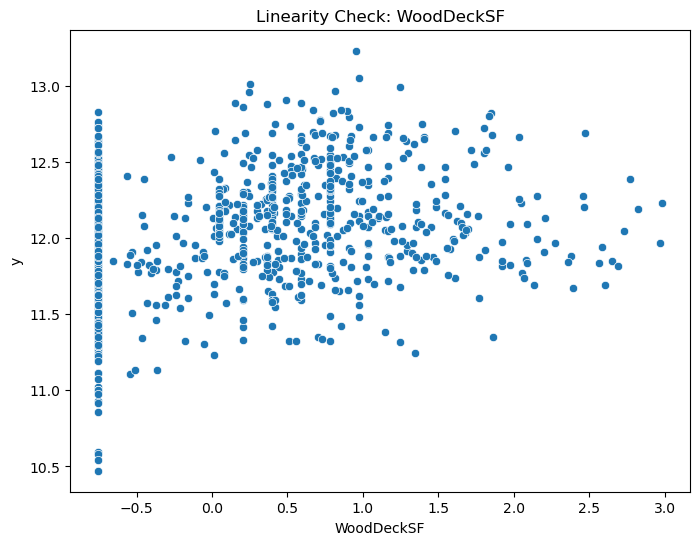

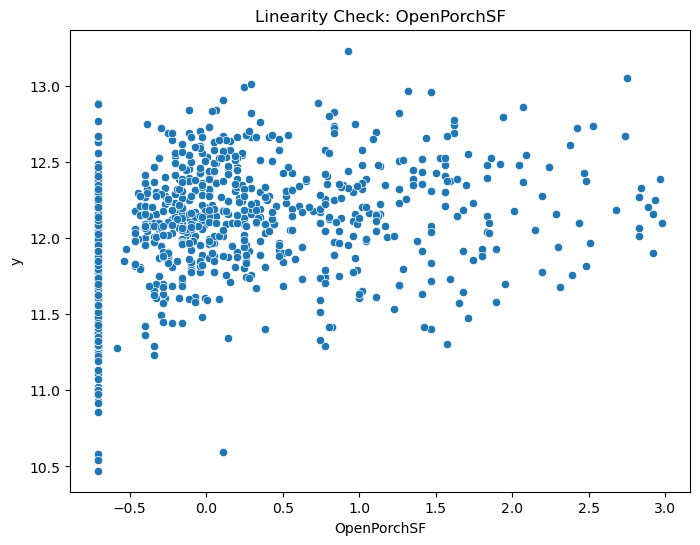

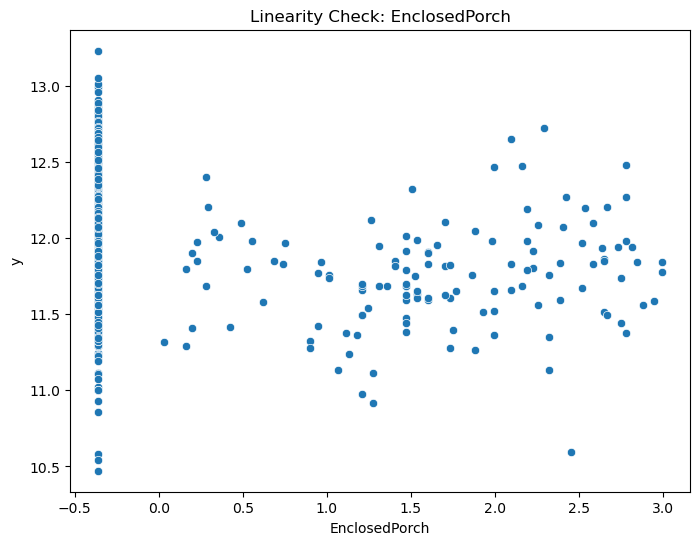

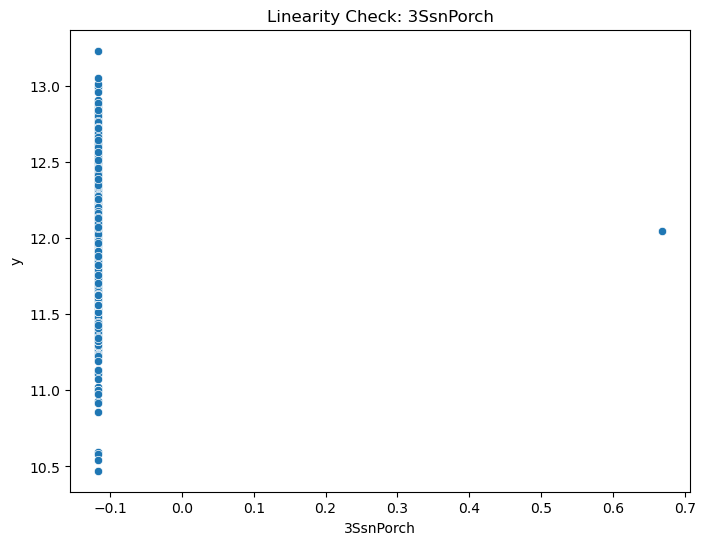

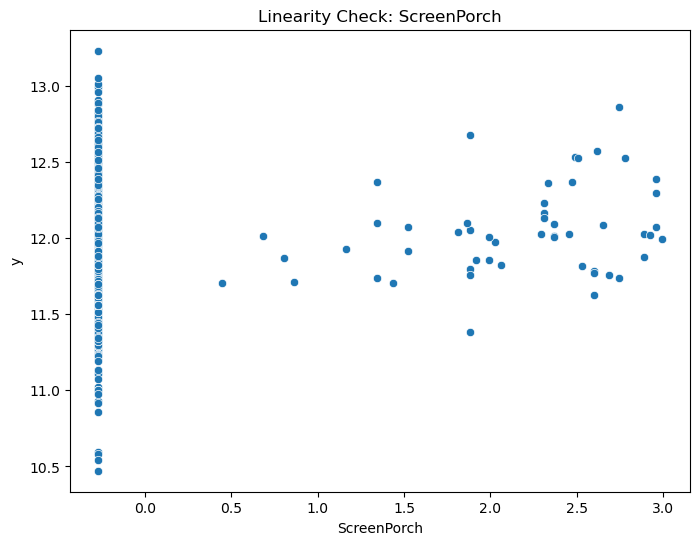

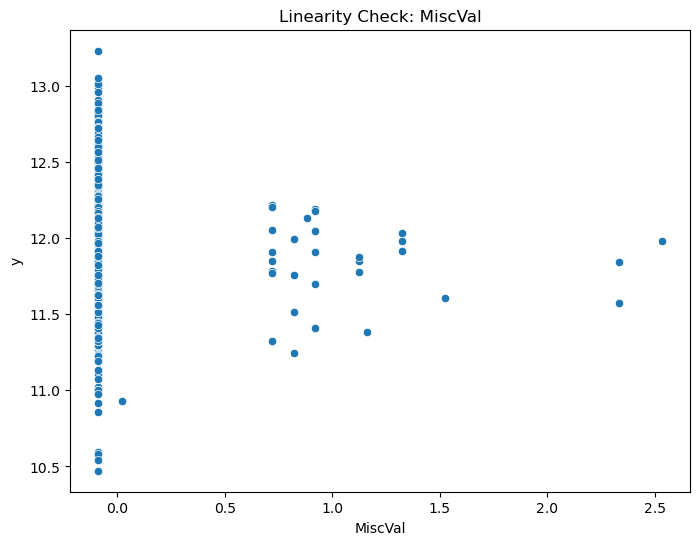

In [62]:
#Check for Linearity
for col in X_cleaned:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=X_cleaned[col], y=y)
    plt.title(f'Linearity Check: {col}')
    plt.xlabel(col)
    plt.ylabel('y')
    plt.show()

Original skewness of MSSubClass: 1.2734610131181312
Transformation applied: Yeo-Johnson transformation


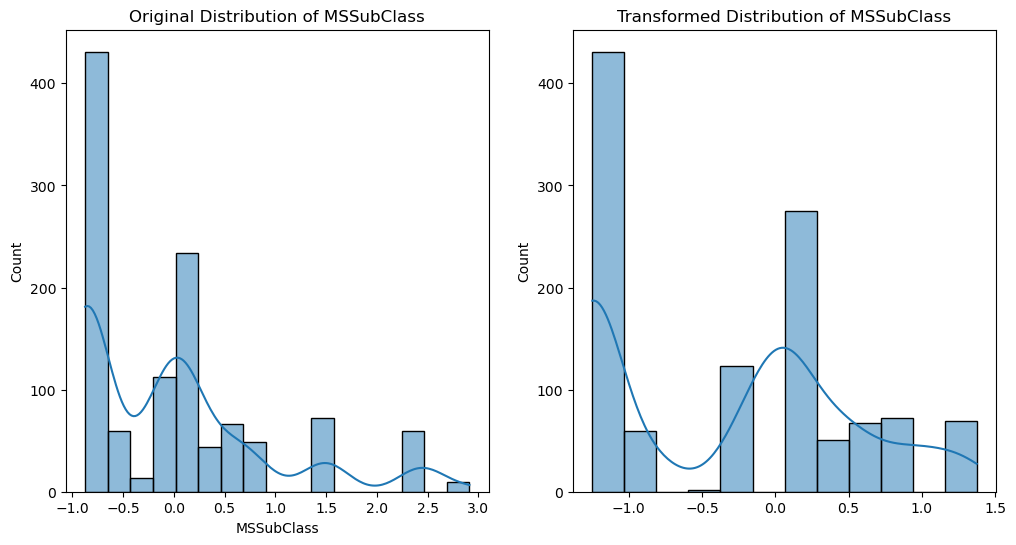

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of LotFrontage: 0.019226351679516557
Transformation applied: no transformation


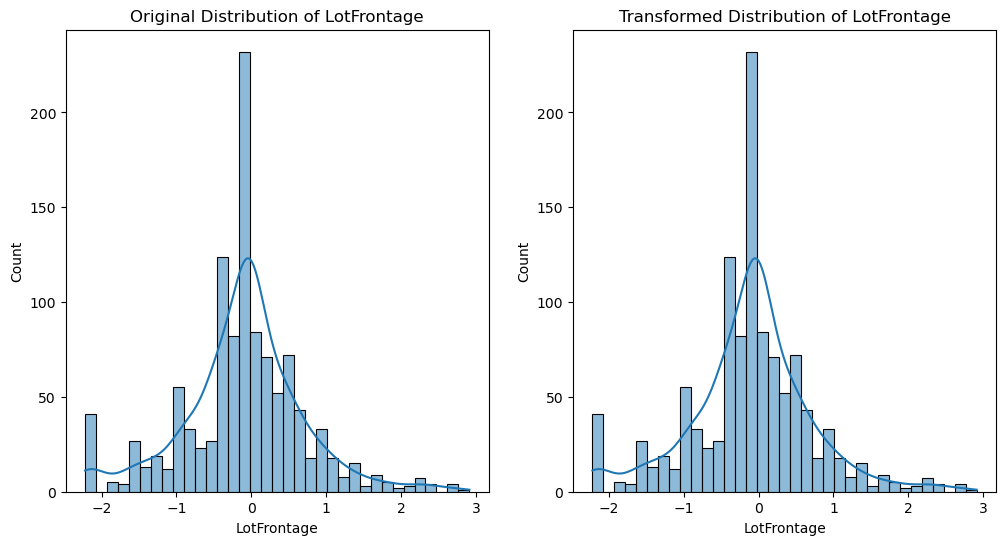

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of LotArea: 1.0962015376136844
Transformation applied: Yeo-Johnson transformation


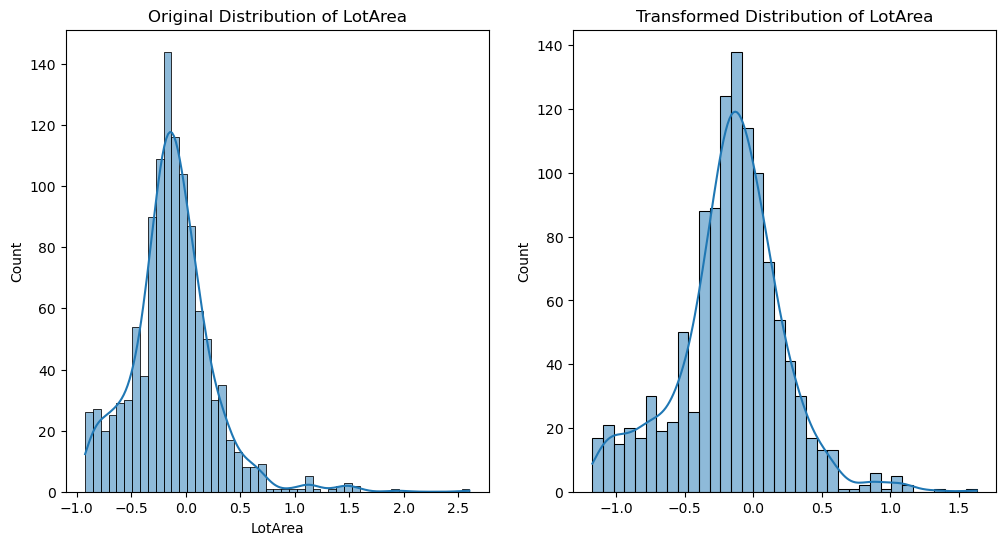

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of YearBuilt: -0.5956818563462584
Transformation applied: no transformation


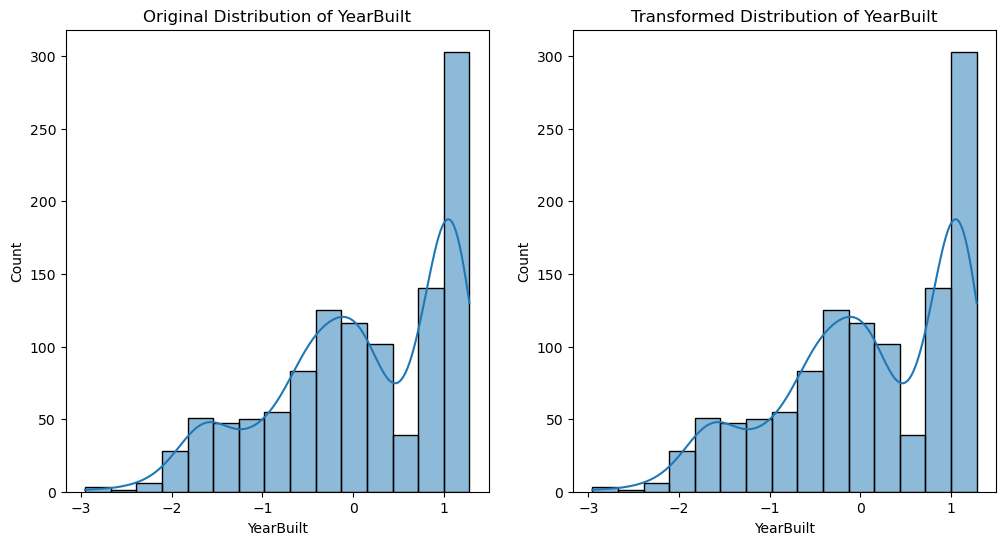

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of YearRemodAdd: -0.5247843887041791
Transformation applied: no transformation


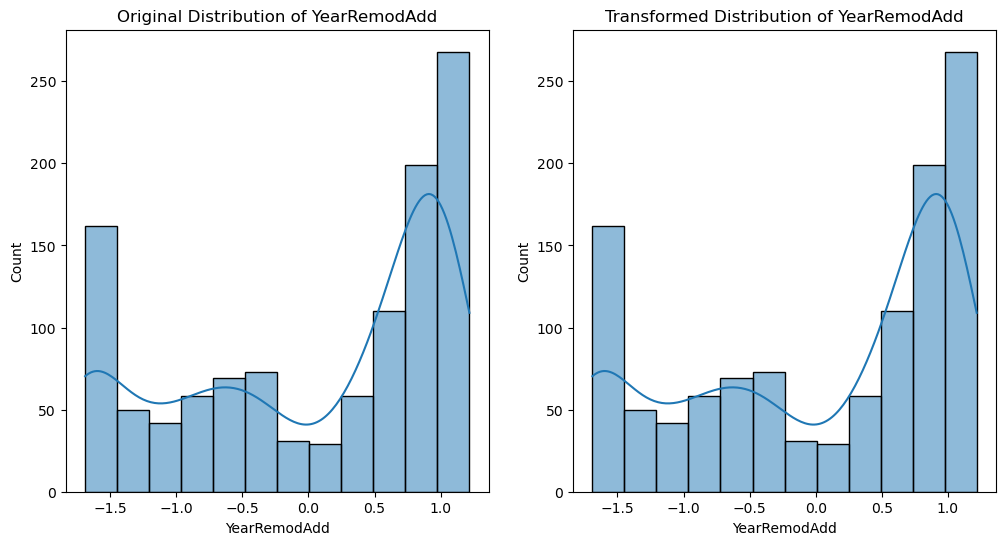

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of MasVnrArea: 1.643616326168583
Transformation applied: Yeo-Johnson transformation


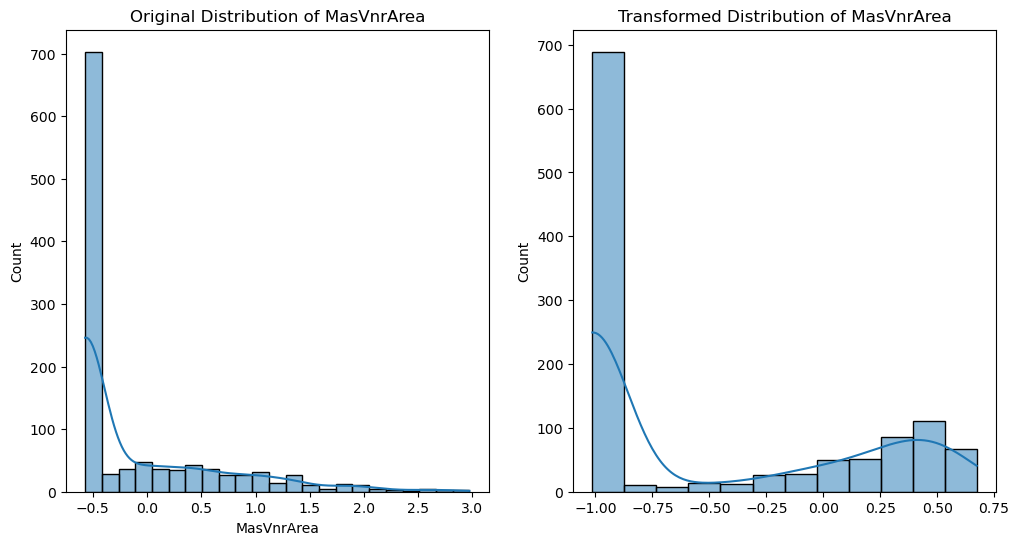

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of BsmtFinSF1: 0.6364607743583812
Transformation applied: no transformation


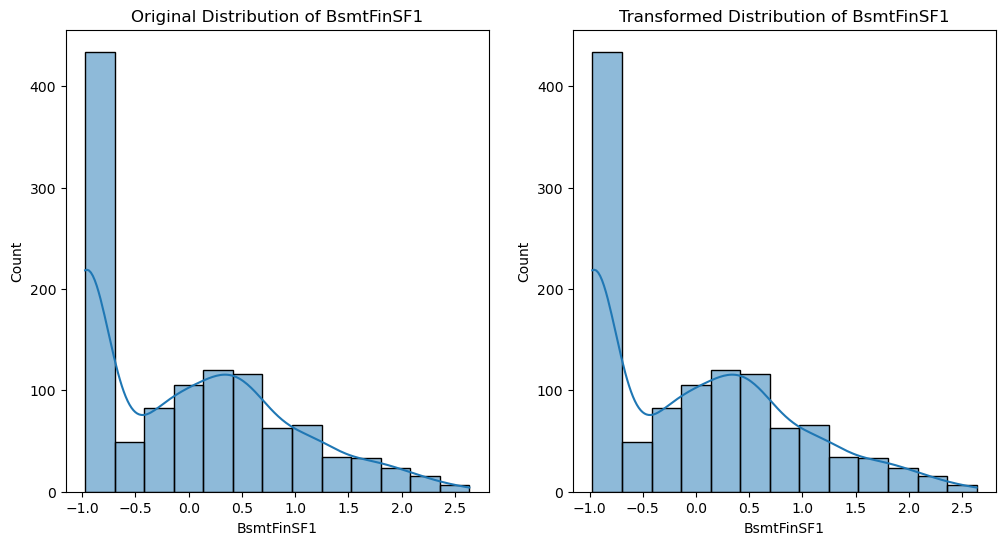

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of BsmtFinSF2: 4.311550944956667
Transformation applied: Yeo-Johnson transformation


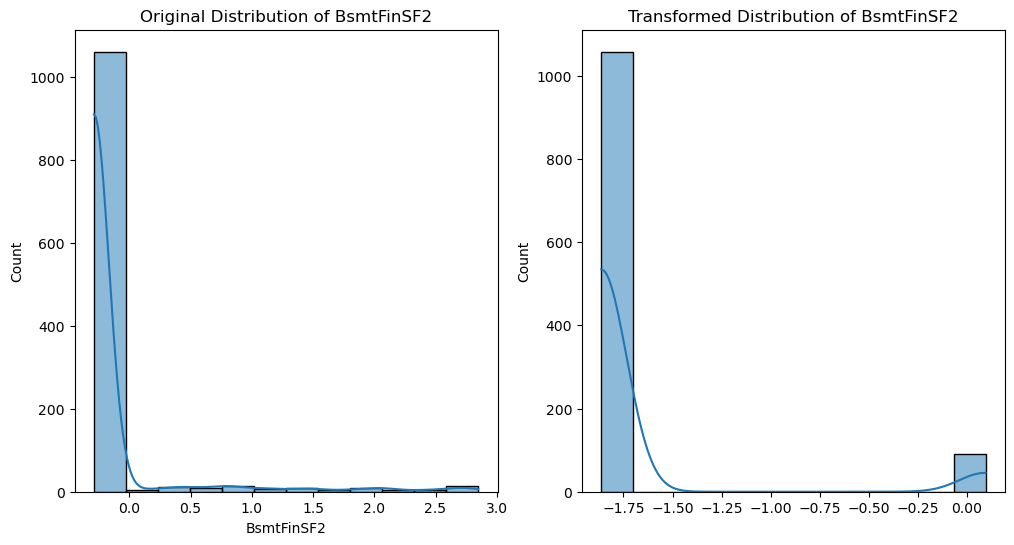

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of BsmtUnfSF: 0.7959370947721586
Transformation applied: no transformation


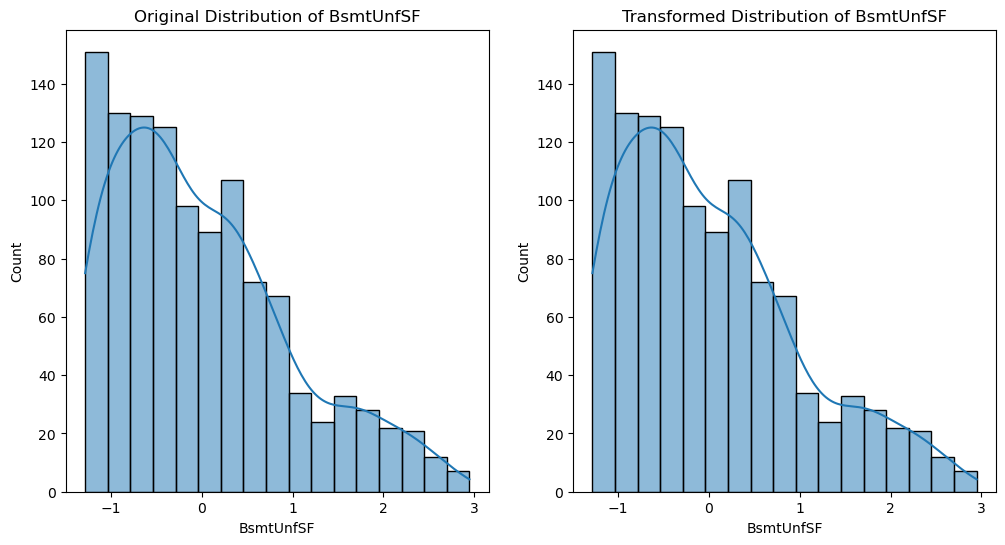

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of TotalBsmtSF: 0.04521945355029406
Transformation applied: no transformation


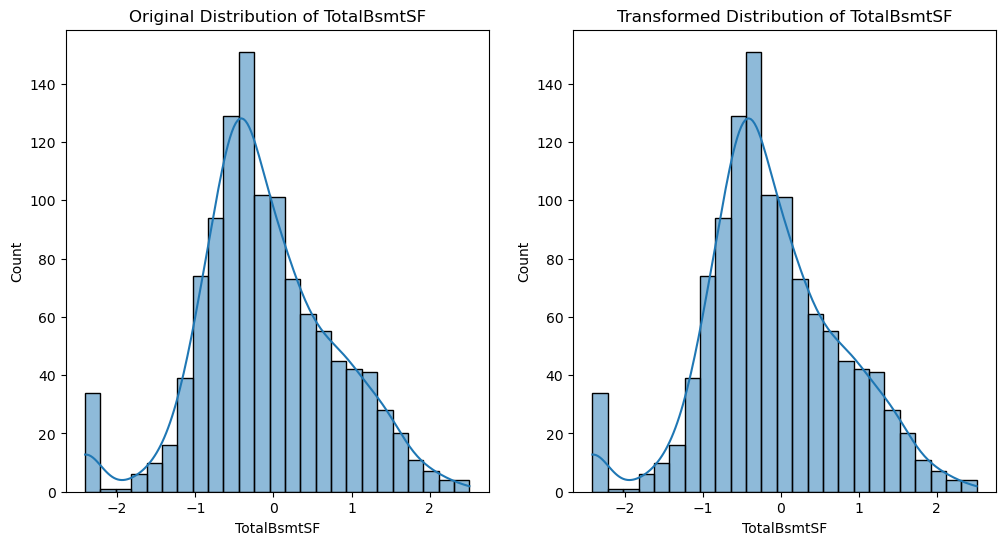

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of 1stFlrSF: 0.6277637066589881
Transformation applied: no transformation


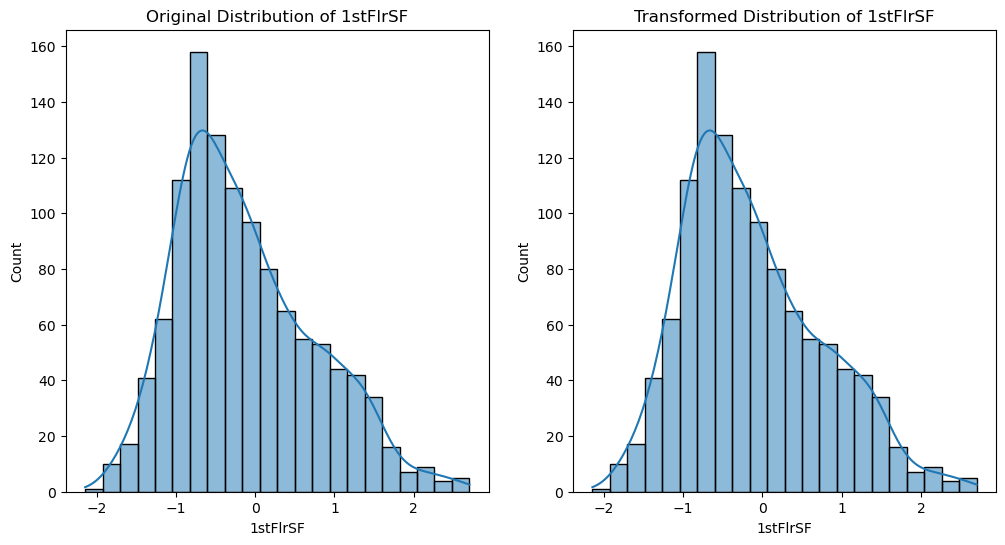

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of 2ndFlrSF: 0.7648079217938969
Transformation applied: no transformation


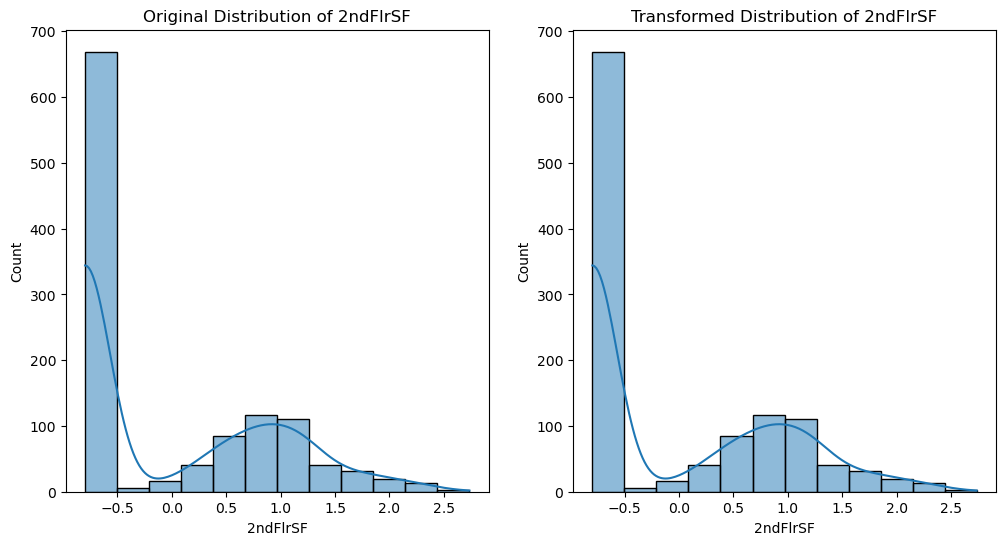

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of LowQualFinSF: 17.40568687262464
Transformation applied: Yeo-Johnson transformation


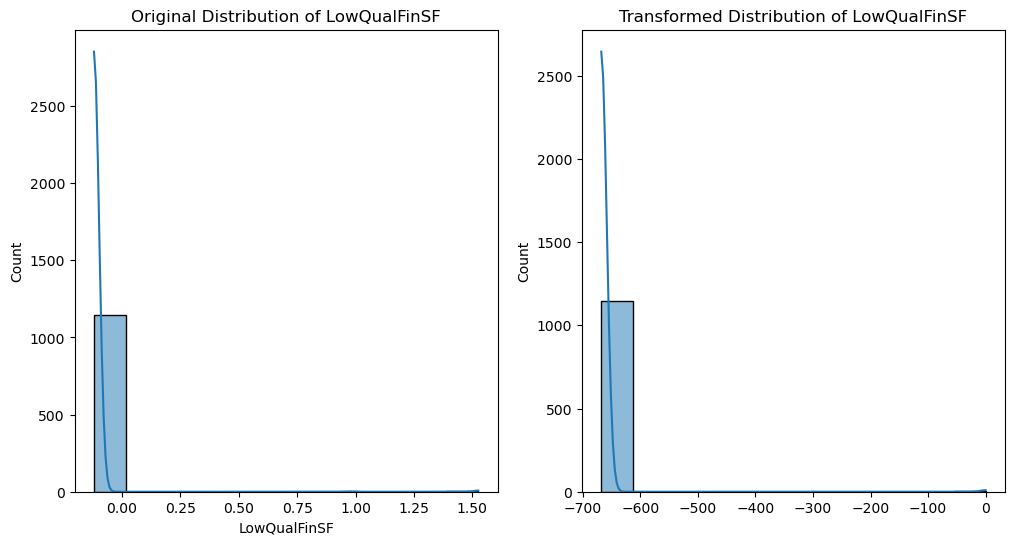

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of GrLivArea: 0.5556733675209662
Transformation applied: no transformation


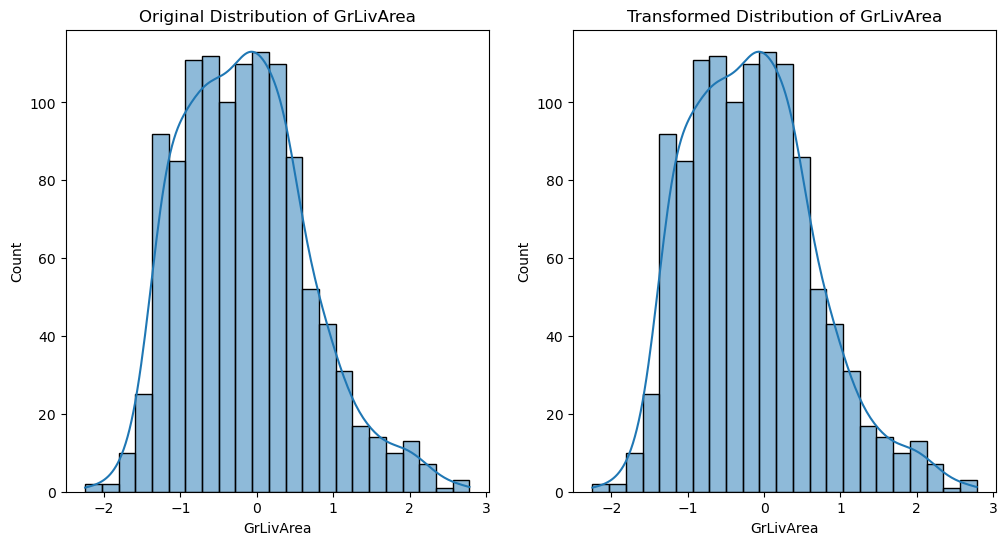

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of GarageYrBlt: -0.7044717495583248
Transformation applied: no transformation


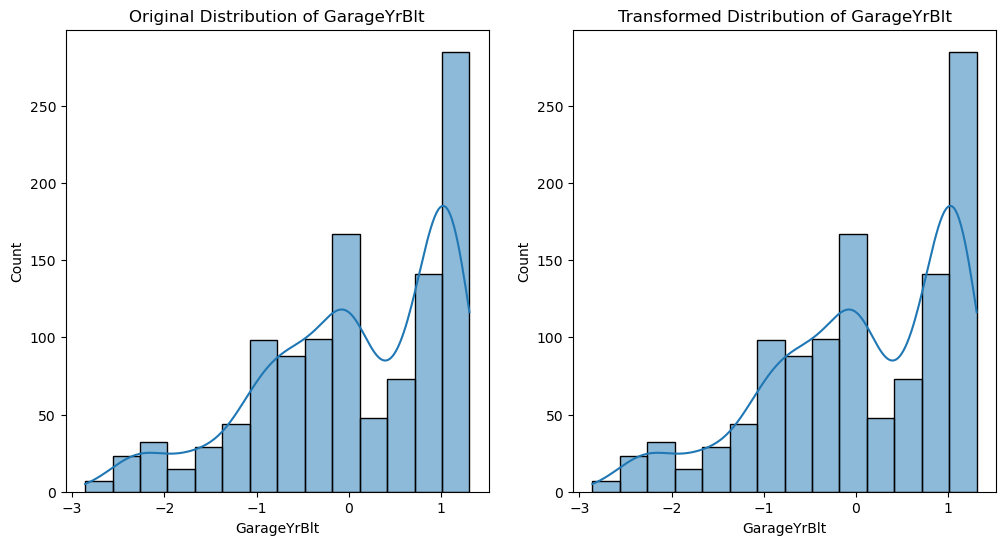

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of GarageArea: -0.04971562715395236
Transformation applied: no transformation


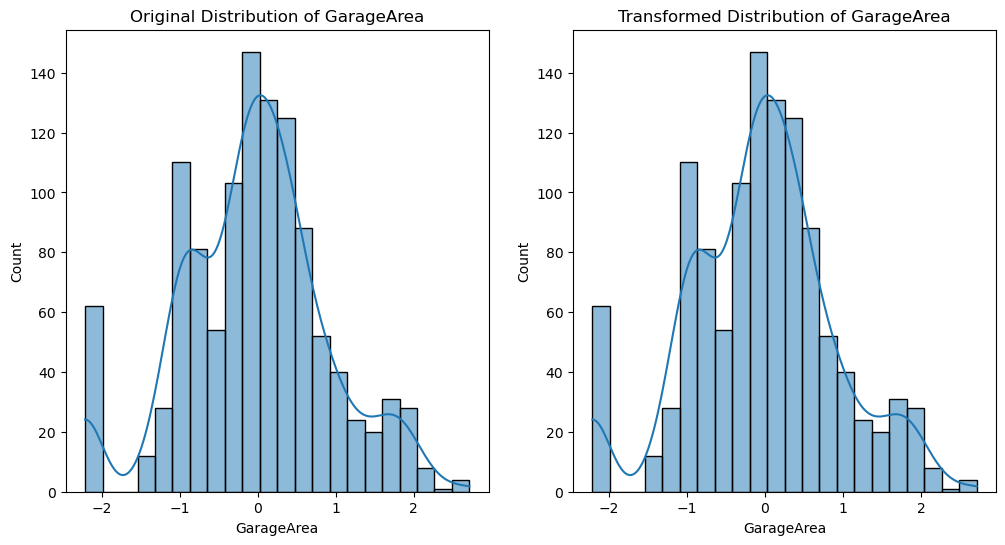

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of WoodDeckSF: 0.976126939986034
Transformation applied: no transformation


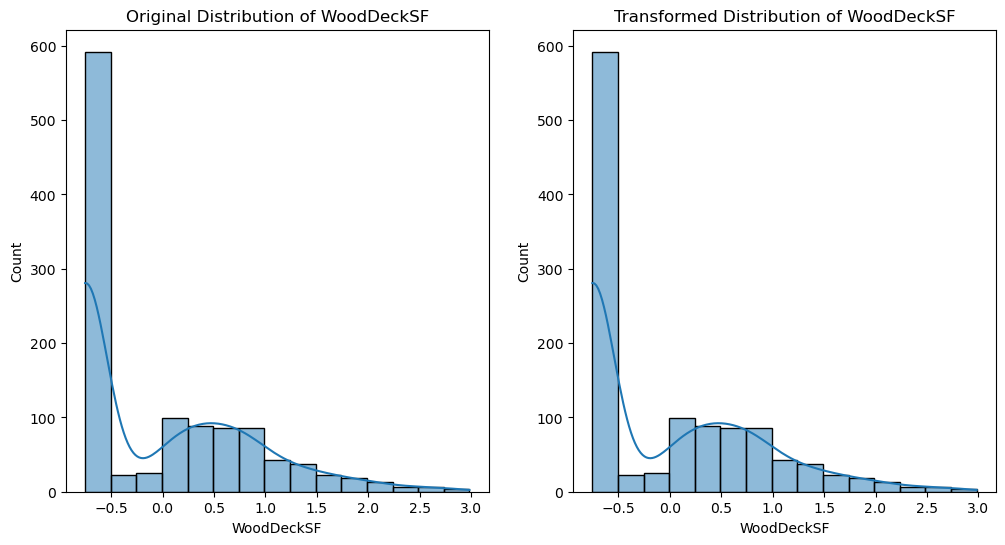

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of OpenPorchSF: 1.518095942490544
Transformation applied: Yeo-Johnson transformation


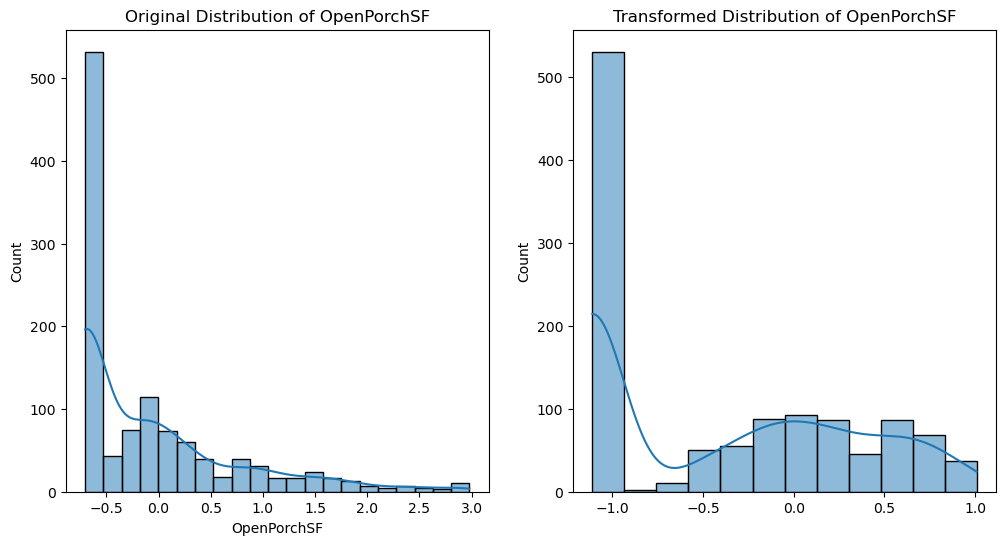

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of EnclosedPorch: 2.9932249678431044
Transformation applied: Yeo-Johnson transformation


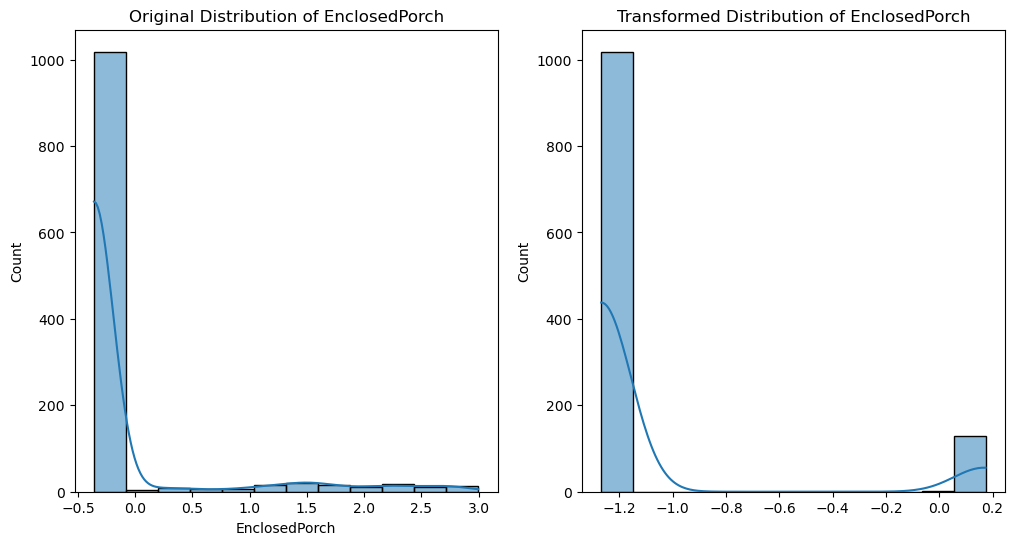

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of 3SsnPorch: 33.852634625389776
Transformation applied: Yeo-Johnson transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of ScreenPorch: 4.777027348085288
Transformation applied: Yeo-Johnson transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


Original skewness of MiscVal: 7.748885212820535
Transformation applied: Yeo-Johnson transformation


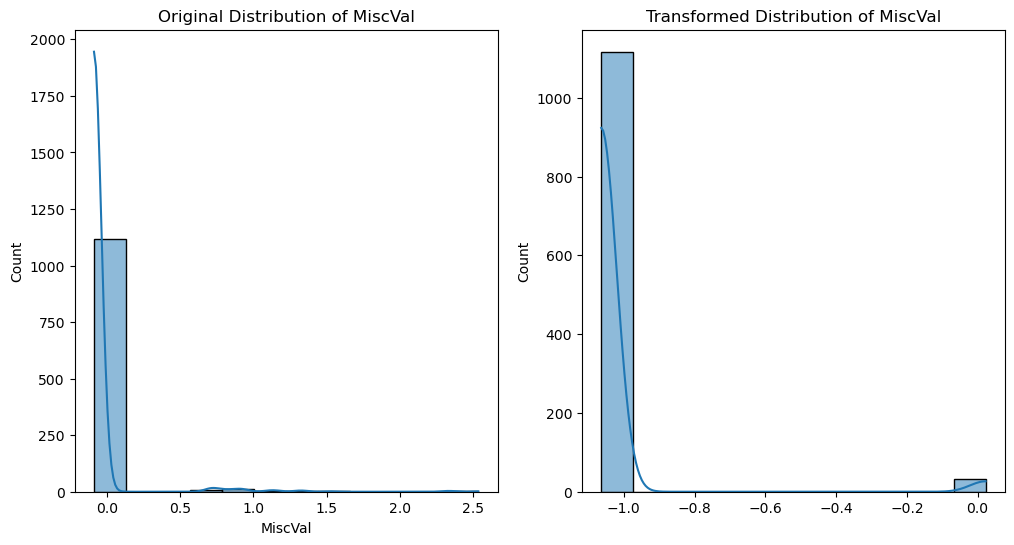

Transformed Numerical Columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_cleaned[col] = transform_and_plot(X_cleaned, col)


In [63]:
# Function to apply transformations and show distributions
def transform_and_plot(df, col):
    # Check skewness
    col_skewness = skew(df[col])
    print(f'Original skewness of {col}: {col_skewness}')

    if col_skewness > 1:
        # Right-skewed, apply log transformation if all values > 0
        if all(df[col] > 0):
            transformed_col = np.log1p(df[col])
            method = 'log transformation'
        else:
            # Apply Yeo-Johnson transformation
            transformed_col, _ = yeojohnson(df[col])
            method = 'Yeo-Johnson transformation'
    elif col_skewness < -1:
        # Left-skewed, apply square root transformation
        transformed_col = np.sqrt(df[col])
        method = 'square root transformation'
    else:
        # Moderate skewness, apply Box-Cox transformation if all values > 0
        if all(df[col] > 0):
            transformed_col, _ = boxcox(df[col])
            method = 'Box-Cox transformation'
        else:
            transformed_col = df[col]
            method = 'no transformation'
    
    print(f'Transformation applied: {method}')

    
    # Plot original vs. transformed distributions
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    sns.histplot(df[col], kde=True, ax=ax[0])
    ax[0].set_title(f'Original Distribution of {col}')
    sns.histplot(transformed_col, kde=True, ax=ax[1])
    ax[1].set_title(f'Transformed Distribution of {col}')
    plt.show()
    
    return transformed_col

# Apply transformations to numerical columns and plot distributions
for col in numeric_cols:
    X_cleaned[col] = transform_and_plot(X_cleaned, col)

print("Transformed Numerical Columns:")
print(numeric_cols)

Original skewness of MSSubClass: 1.1788493537913685
Transformation applied: Yeo-Johnson transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of LotFrontage: -0.09045508294065578
Transformation applied: no transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of LotArea: 0.35312933262715634
Transformation applied: no transformation


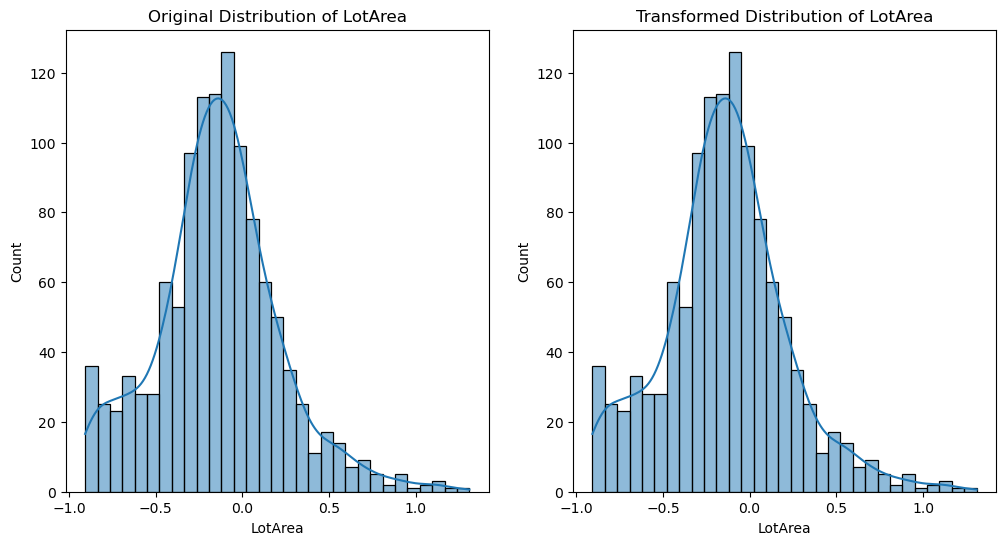

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of YearBuilt: -0.6152919299339237
Transformation applied: no transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of YearRemodAdd: -0.4785954297750283
Transformation applied: no transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of MasVnrArea: 1.65941694066803
Transformation applied: Yeo-Johnson transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of BsmtFinSF1: 0.7273638010348747
Transformation applied: no transformation


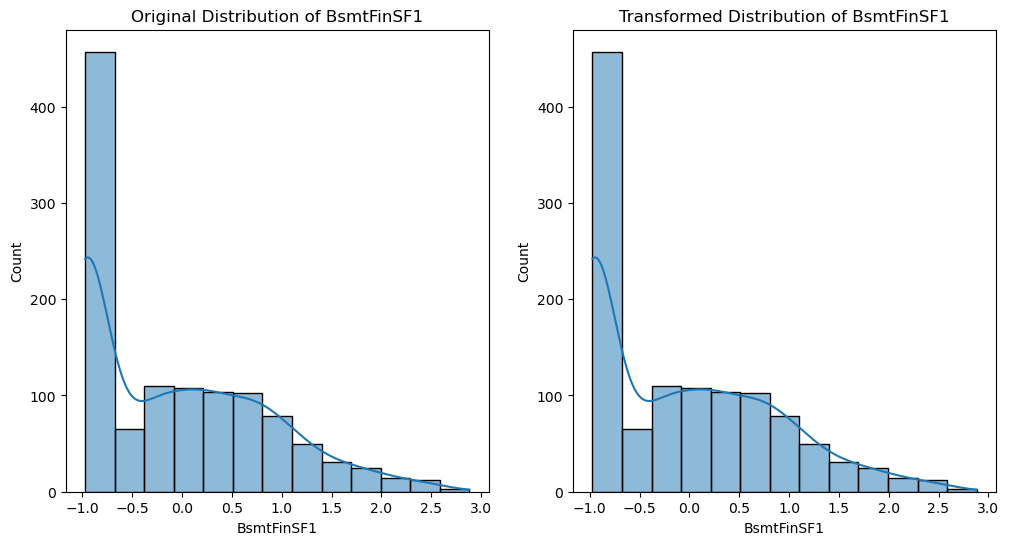

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of BsmtFinSF2: 4.001960423119683
Transformation applied: Yeo-Johnson transformation


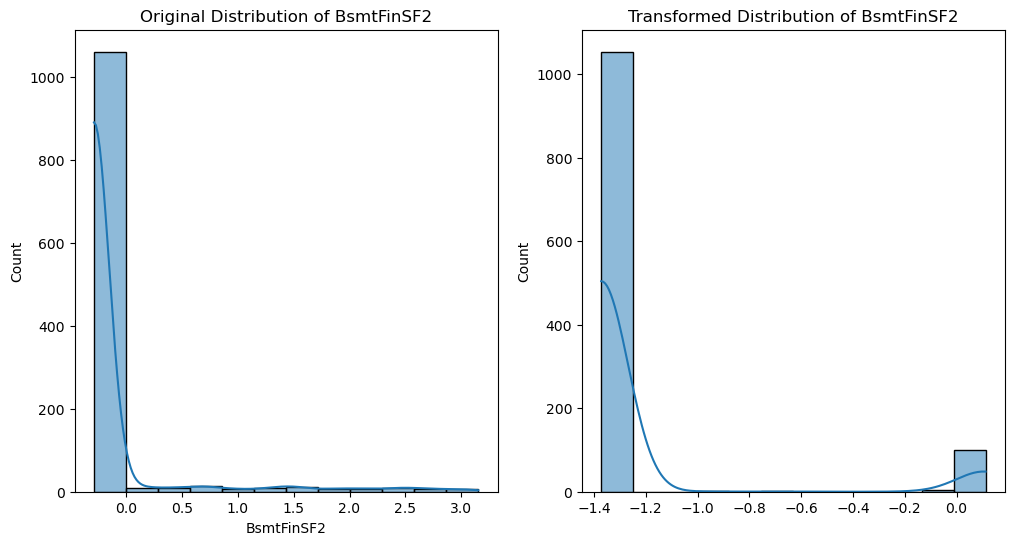

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of BsmtUnfSF: 0.8497938208326531
Transformation applied: no transformation


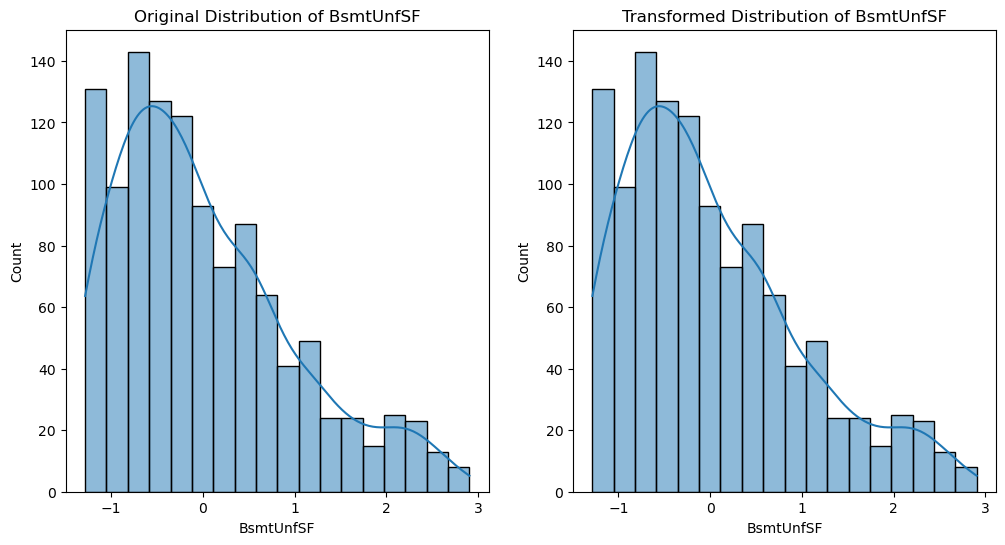

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of TotalBsmtSF: 0.06837932969598198
Transformation applied: no transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of 1stFlrSF: 0.5482079036349204
Transformation applied: no transformation


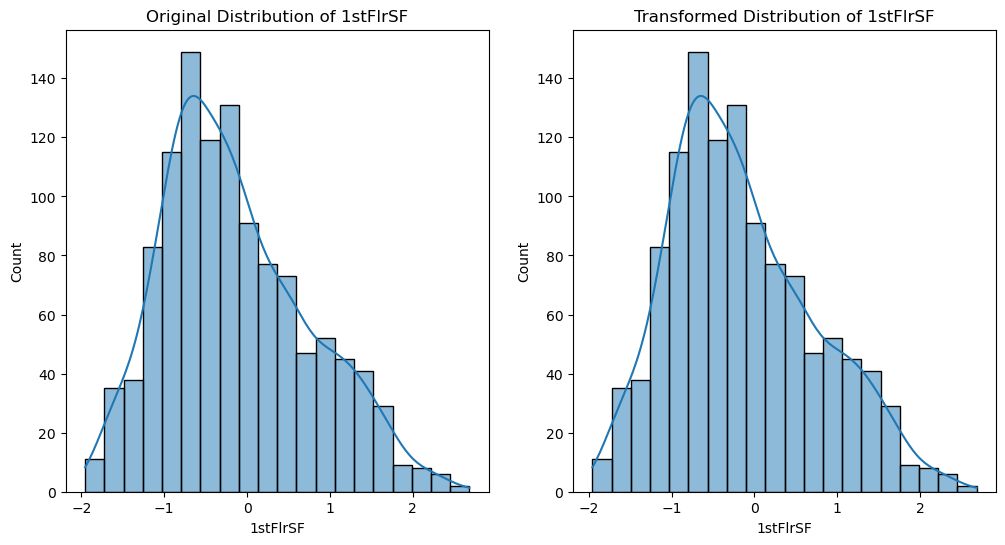

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of 2ndFlrSF: 0.7750518073251067
Transformation applied: no transformation


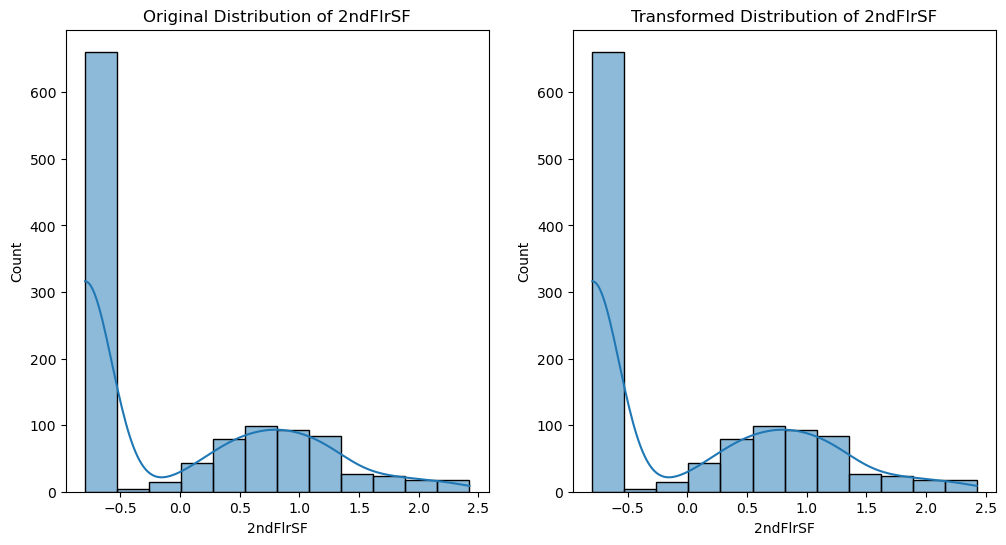

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of LowQualFinSF: 25.086632376727618
Transformation applied: Yeo-Johnson transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of GrLivArea: 0.6406739311081527
Transformation applied: no transformation


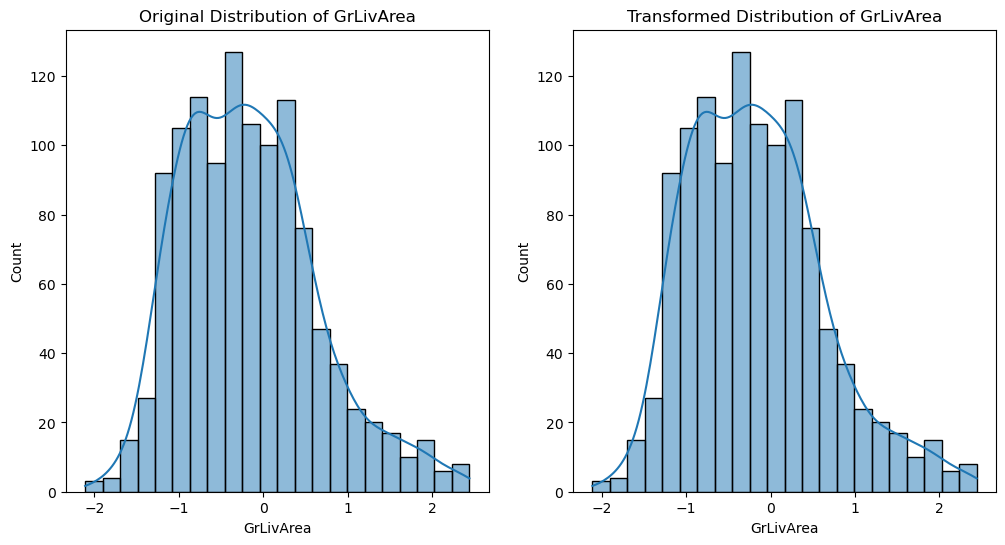

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of GarageYrBlt: -0.6912077321552749
Transformation applied: no transformation


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of GarageArea: 0.032168401793327375
Transformation applied: no transformation


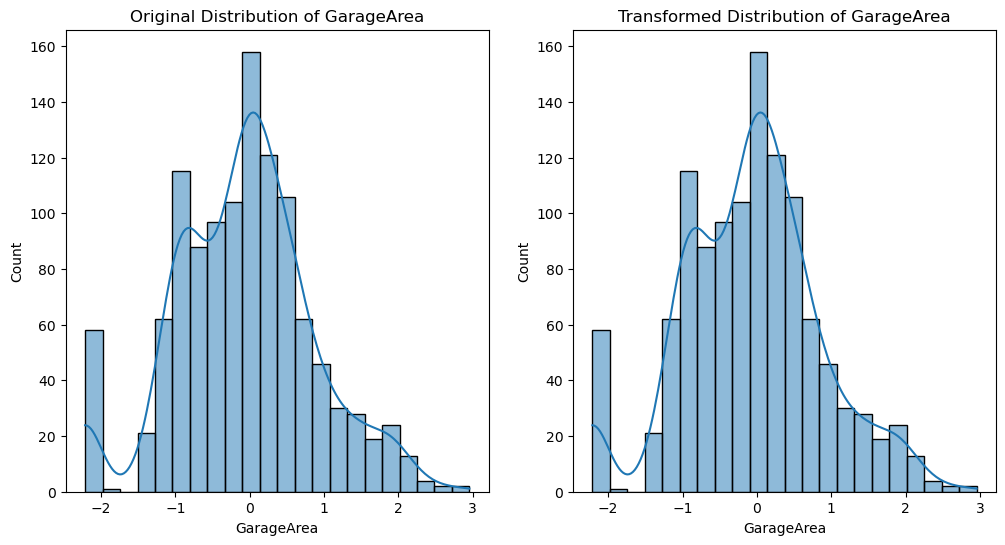

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of WoodDeckSF: 1.0453822378963618
Transformation applied: Yeo-Johnson transformation


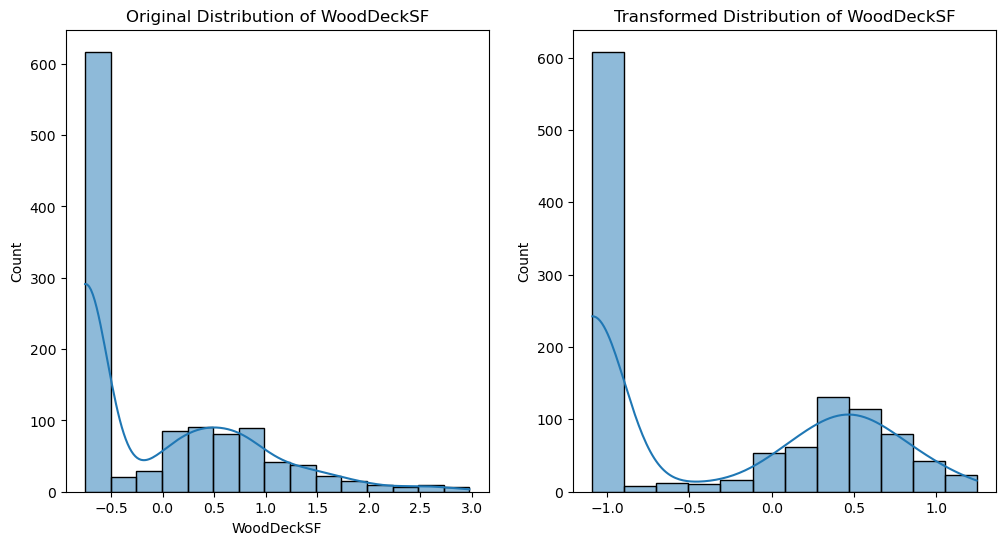

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of OpenPorchSF: 1.5082509357530072
Transformation applied: Yeo-Johnson transformation


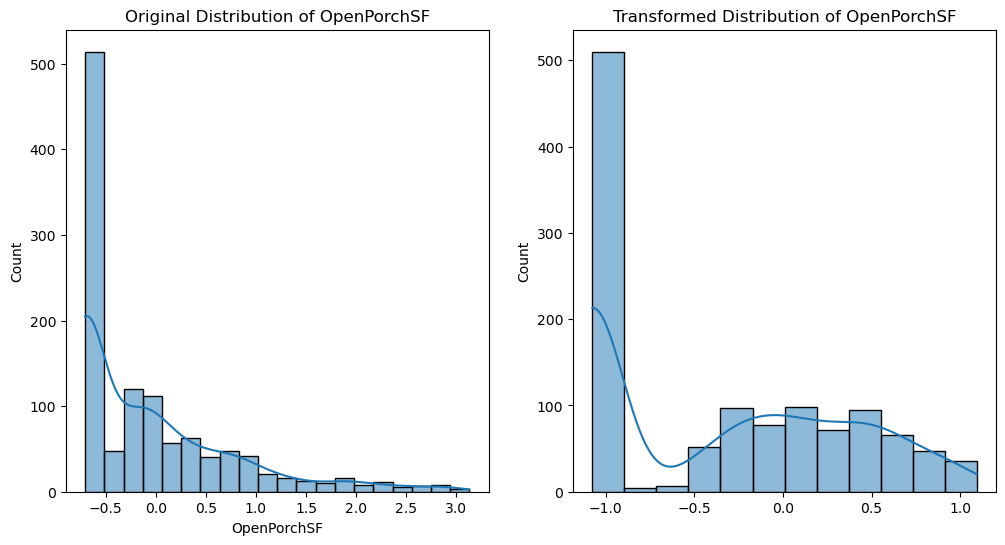

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of EnclosedPorch: 2.885360650218471
Transformation applied: Yeo-Johnson transformation


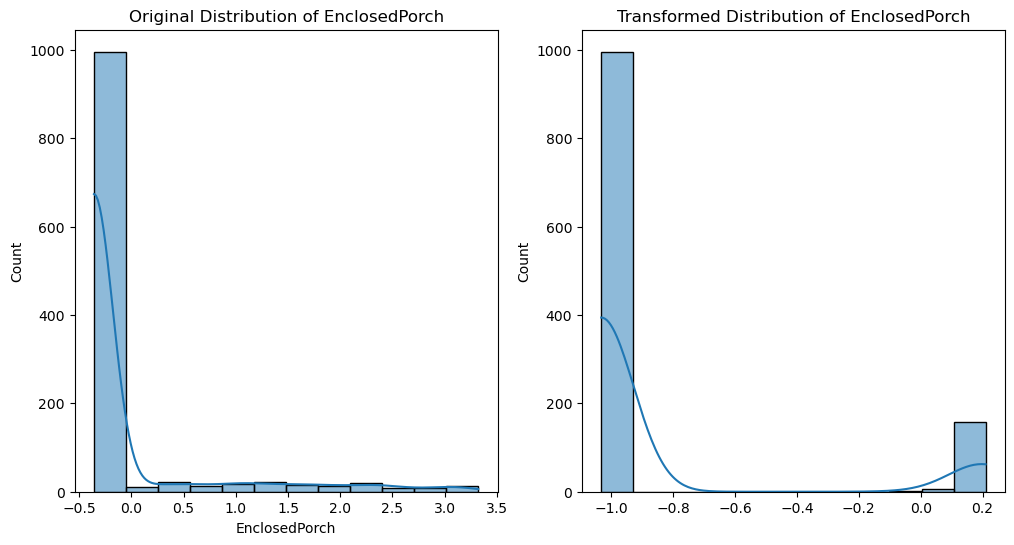

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3202421548.py:4: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  col_skewness = skew(df[col])


Original skewness of 3SsnPorch: nan
Transformation applied: no transformation


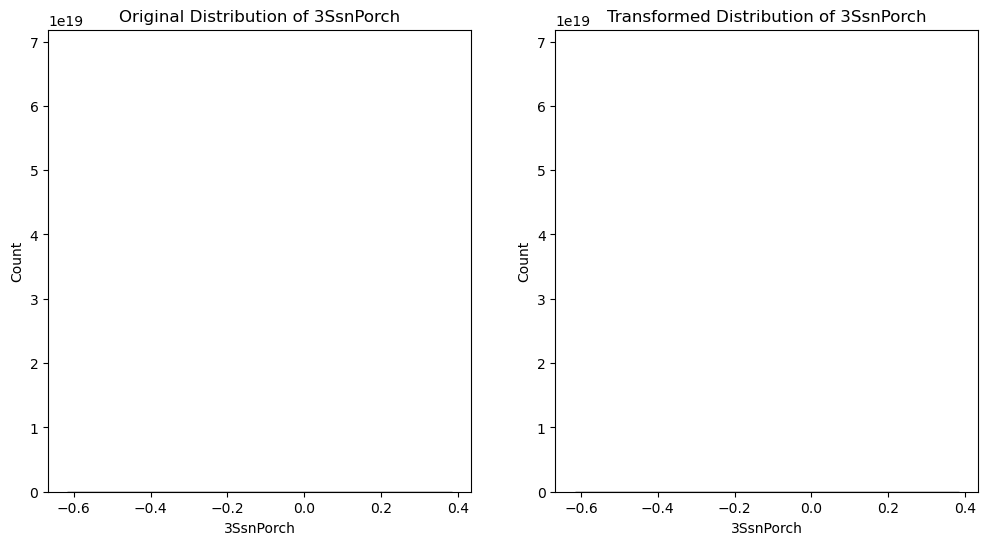

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of ScreenPorch: 3.7796072506241645
Transformation applied: Yeo-Johnson transformation


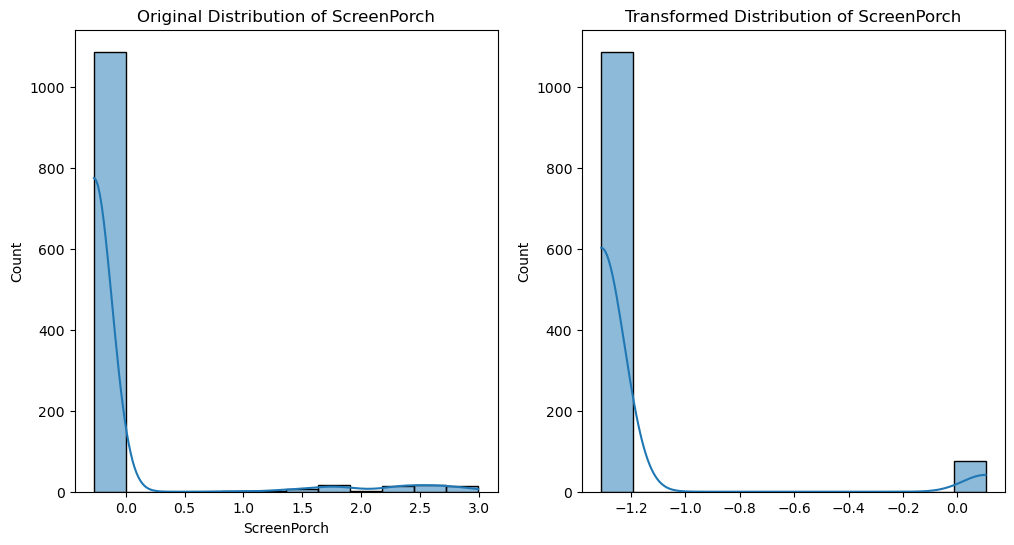

C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


Original skewness of MiscVal: 9.007391109871161
Transformation applied: Yeo-Johnson transformation


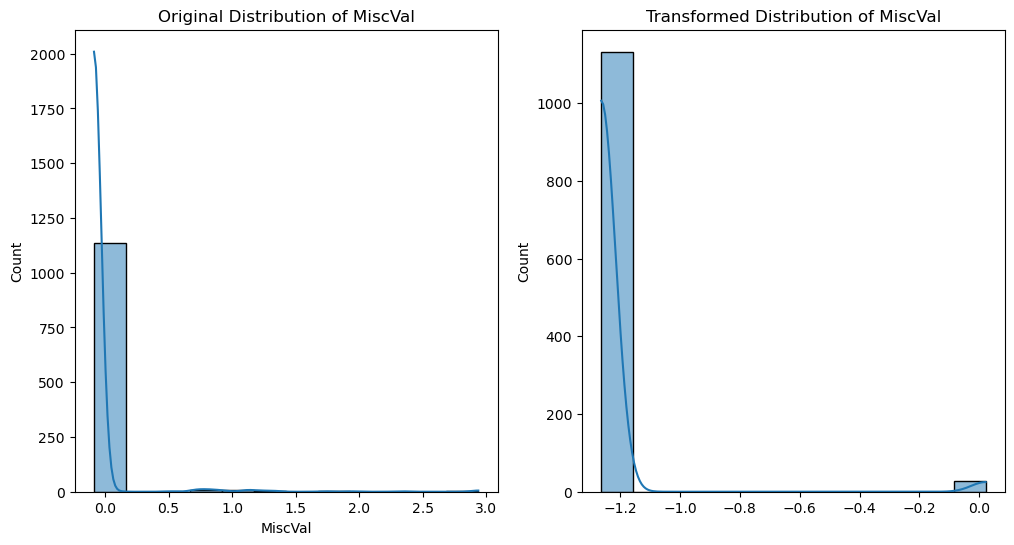

Transformed Numerical Columns:
['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscVal']


C:\Users\ASUS\AppData\Local\Temp\ipykernel_17744\3986869677.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_testo[col] = transform_and_plot(X_testo, col)


In [64]:
# Apply transformations to numerical columns and plot distributions
for col in numeric_cols:
    X_testo[col] = transform_and_plot(X_testo, col)

print("Transformed Numerical Columns:")
print(numeric_cols)

In [65]:
# Check for Multicollinearity
X_with_constant = sm.add_constant(X_cleaned[numeric_cols])
vif_data = pd.DataFrame()
vif_data['feature'] = X_with_constant.columns
vif_data['VIF'] = [variance_inflation_factor(X_with_constant.values, i) for i in range(X_with_constant.shape[1])]
print(vif_data)

          feature            VIF
0           const   11603.396361
1      MSSubClass       1.989965
2     LotFrontage       1.861684
3         LotArea       2.029248
4       YearBuilt       4.340090
5    YearRemodAdd       2.008105
6      MasVnrArea       1.320217
7      BsmtFinSF1     118.264415
8      BsmtFinSF2       4.434642
9       BsmtUnfSF     128.836071
10    TotalBsmtSF     103.314881
11       1stFlrSF  249267.814554
12       2ndFlrSF  365409.361619
13   LowQualFinSF      42.067719
14      GrLivArea  413878.562512
15    GarageYrBlt       3.596841
16     GarageArea       1.837784
17     WoodDeckSF       1.174190
18    OpenPorchSF       1.417650
19  EnclosedPorch       1.319947
20      3SsnPorch       1.009249
21    ScreenPorch       1.038807
22        MiscVal       1.037294


In [66]:
# Exclude the 'const' column from features to drop 
features_to_drop = vif_data[vif_data['VIF'] > 10]['feature'] 
features_to_drop = features_to_drop[features_to_drop != 'const']

In [67]:
# Drop features with high VIF 
X_cleaned = X_cleaned.drop(columns=features_to_drop)

In [68]:
X_testo = X_testo.drop(columns=features_to_drop)

In [69]:
X_cleaned.shape

(1149, 72)

In [70]:
X_testo.shape

(1161, 72)

In [71]:
#Encode categorical columns
X_traind =pd.get_dummies(X_cleaned ,drop_first=True,dtype=int)
X_testd =pd.get_dummies(X_testo ,drop_first=True,dtype=int)

In [72]:
X_traind.shape

(1149, 276)

In [73]:
X_traind

MSSubClass  LotFrontage   LotArea  YearBuilt  YearRemodAdd  MasVnrArea  \
Id                                                                             
1       0.070835    -0.220875 -0.220544   1.050994      0.878668    0.326656   
2      -1.248188     0.460320 -0.094557   0.156734     -0.429577   -1.013565   
3       0.070835    -0.084636  0.071819   0.984752      0.830215    0.239256   
5       0.070835     0.641972  0.337570   0.951632      0.733308    0.536565   
7      -1.248188     0.233255 -0.043978   1.084115      0.975575    0.303522   
...          ...          ...       ...        ...           ...         ...   
1453    1.373854    -1.583265 -0.825884   1.117235      0.975575   -0.146907   
1454   -1.248188     0.914450  0.564360   1.150356      1.024029   -1.013565   
1455   -1.248188    -0.357114 -0.330621   1.084115      0.975575   -1.013565   
1456    0.070835    -0.357114 -0.281645   0.918511      0.733308   -1.013565   
1457   -1.248188     0.687385  0.246528   0.222975      0.151865    0.080134   

      BsmtFinSF2  GarageYrBlt  GarageArea  WoodDeckSF  ...  RoofStyle_Gable  \
Id                                                     ...                    
1      -1.862870     1.017598    0.351000   -0.752176  ...                1   
2      -1.862870    -0.107927   -0.060731    1.626195  ...                1   
3      -1.862870     0.934226    0.631726   -0.752176  ...                1   
5      -1.862870     0.892540    1.698485    0.780197  ...                1   
7      -1.862870     1.059284    0.762732    1.283007  ...                1   
...          ...          ...         ...         ...  ...              ...   
1453   -1.862870     1.100970    0.243389   -0.752176  ...                1   
1454   -1.862870     0.058817   -2.212963   -0.464856  ...                1   
1455   -1.862870     1.059284   -0.341457   -0.752176  ...                1   
1456   -1.862870     0.850854   -0.060731   -0.752176  ...                1   
1457    0.093935    -0.024555    0.126420    2.033231  ...                1   

      RoofStyle_Gambrel  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  \
Id                                                                          
1                     0              0                  0               0   
2                     0              0                  0               0   
3                     0              0                  0               0   
5                     0              0                  0               0   
7                     0              0                  0               0   
...                 ...            ...                ...             ...   
1453                  0              0                  0               0   
1454                  0              0                  0               0   
1455                  0              0                  0               0   
1456                  0              0                  0               0   
1457                  0              0                  0               0   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
Id                                                                        
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
5                         0                     0                     0   
7                         0                     0                     0   
...                     ...                   ...                   ...   
1453                      0                     0                     0   
1454                      0                     0                     0   
1455                      0                     0                     0   
1456                      0                     0                     0   
1457                      0        

In [74]:
#Checking collinearity
def drop_highly_correlated_cols(df, threshold=0.9):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    df = df.drop(columns=to_drop)
    return df

# Apply the function to drop highly correlated columns
Xtraind_cleaned = drop_highly_correlated_cols(X_traind)

# Display the remaining columns
print("Remaining columns after dropping highly correlated ones:")
print(Xtraind_cleaned.columns)

Remaining columns after dropping highly correlated ones:
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF2', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF',
       ...
       'BsmtExposure_Mn', 'BsmtExposure_No', 'RoofStyle_Gable',
       'RoofStyle_Gambrel', 'RoofStyle_Mansard', 'RoofStyle_Shed',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal'],
      dtype='object', length=263)


In [75]:
len(Xtraind_cleaned)

1149

In [76]:
# Split the training data again to create a validation set
X_train, X_valid, y_train, y_valid = train_test_split(Xtraind_cleaned, y, test_size=0.2, random_state=42)

In [77]:
# Train the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [78]:
# Make predictions
train_predictions = lr_model.predict(X_train)
valid_predictions = lr_model.predict(X_valid)

In [79]:
# Calculate RMSE and R-squared
train_rmse = np.sqrt(mean_squared_error(y_train, train_predictions))
valid_rmse = np.sqrt(mean_squared_error(y_valid, valid_predictions))
train_r2 = r2_score(y_train, train_predictions)
val_r2 = r2_score(y_valid, valid_predictions)

In [80]:
print(f'Training RMSE: {train_rmse:.4f}')
print(f'Validation RMSE: {valid_rmse:.4f}')
print(f'Training R-squared: {train_r2:.4f}')
print(f'Validation R-squared: {val_r2:.4f}')

Training RMSE: 0.0887
Validation RMSE: 0.1469
Training R-squared: 0.9445
Validation R-squared: 0.8273


In [81]:
# Visualize predictions vs actual values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_valid, y=valid_predictions, alpha=0.5)
plt.plot([min(y_valid), max(y_valid)], [min(y_valid), max(y_valid)], color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()
